## Importing modules

In [4]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
from gseapy.parser import Biomart
import os
import numpy as np
import seaborn as sns
from gseapy.plot import gseaplot
from scipy import stats as st
import re
import fnmatch
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score
from random import sample
import sys
# sys. path. append("/home/nandas/myTranscriptFunc")
from myMapper import *

## Setting the present directory

In [229]:
Base_dir='/data/nandas/Combined_coexp/Pathway_enrichment/NewSets_090420/CombinedIndividualCorr_020721/June28_2022/'
os.chdir(Base_dir)

## Reading mapper file

In [2]:
! cp /data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv /data/nandas/FinalFileShivani/

In [5]:
mapper=pd.read_csv("/data/nandas/FinalFileShivani/MasterProteinCodingGenesAnnotation_WS282.csv",index_col=1)

In [6]:
mapper=wb_to_gene(mapper)

In [7]:
mapper

Unnamed: 0    GeneName  SequenceID Status                 Type
WormBaseID                                                                
aap-1                0       aap-1  Y110A7A.10   Live  protein_coding_gene
aat-1                1       aat-1     F27C8.1   Live  protein_coding_gene
aat-2                2       aat-2     F07C3.7   Live  protein_coding_gene
aat-3                3       aat-3     F52H2.2   Live  protein_coding_gene
aat-4                4       aat-4   T13A10.10   Live  protein_coding_gene
...                ...         ...         ...    ...                  ...
nan              52096         NaN         NaN   Dead                 gene
nan              52097         NaN         NaN   Dead                 gene
nan              52098         NaN         NaN   Dead                 gene
Y48G1BM.10       52099  Y48G1BM.10  Y48G1BM.10   Live  protein_coding_gene
T22B2.12         52100    T22B2.12    T22B2.12   Live           ncRNA_gene

[52101 rows x 5 columns]

In [8]:
mapper=mapper.loc[mapper.index.str.startswith('nhr')]

In [9]:
NHRs=pd.DataFrame(list(mapper.index))

In [10]:
NHRs.set_index([0],inplace=True)

In [11]:
NHRs=gene_to_wb(NHRs)

In [12]:
NHRs

Empty DataFrame
Columns: []
Index: [WBGene00003600, WBGene00003601, WBGene00003602, WBGene00003603, WBGene00003604, WBGene00003605, WBGene00003606, WBGene00003607, WBGene00003608, WBGene00003609, WBGene00003610, WBGene00003611, WBGene00003612, WBGene00003613, WBGene00003614, WBGene00003615, WBGene00003616, WBGene00003617, WBGene00003618, WBGene00003619, WBGene00003620, WBGene00003621, WBGene00003622, WBGene00003623, WBGene00003624, WBGene00003625, WBGene00003626, WBGene00003627, WBGene00003628, WBGene00003629, WBGene00003630, WBGene00003632, WBGene00003633, WBGene00003634, WBGene00003635, WBGene00003636, WBGene00003637, WBGene00003638, WBGene00003639, WBGene00003640, WBGene00003641, WBGene00003642, WBGene00003643, WBGene00003644, WBGene00003645, WBGene00003646, WBGene00003647, WBGene00003648, WBGene00003649, WBGene00003650, WBGene00003651, WBGene00003652, WBGene00003653, WBGene00003654, WBGene00003655, WBGene00003656, WBGene00003657, WBGene00003658, WBGene00003659, WBGene00003660, WBGene00003661, WBGene00003662, WBGene00003663, WBGene00003664, WBGene00003665, WBGene00003667, WBGene00003668, WBGene00003669, WBGene00003670, WBGene00003671, WBGene00003672, WBGene00003673, WBGene00003674, WBGene00003675, WBGene00003676, WBGene00003677, WBGene00003678, WBGene00003679, WBGene00003680, WBGene00003681, WBGene00003682, WBGene00003683, WBGene00003684, WBGene00003685, WBGene00003686, WBGene00003687, WBGene00003688, WBGene00003689, WBGene00003690, WBGene00003691, WBGene00003692, WBGene00003693, WBGene00003694, WBGene00003695, WBGene00003696, WBGene00003697, WBGene00003698, WBGene00003699, WBGene00003700, WBGene00003701, ...]

[283 rows x 0 columns]

In [13]:
NHRs.to_csv("/data/nandas/WormBase_282/NHRs.csv")

In [14]:
NHRs.to_csv("/data/nandas/FinalFileShivani/NHRs.csv")

In [228]:
# ! mkdir '/data/nandas/Combined_coexp/Pathway_enrichment/NewSets_090420/CombinedIndividualCorr_020721/June28_2022/'


In [230]:
# Dir='/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/'
# for filename in os.listdir(path=Dir):
#     if(filename.endswith(".dab.dat")):
#         try:
#             papername = re.search('z_normalized_(.+?).pcl.dab.dat', filename).group(1);
#             df = pd.read_csv("{}/{}".format(Dir,filename), header=None, sep='\t');
#     #         df[2]=(df[2]*2)-1
#             df1=df.set_axis(['Gene1', 'Gene2', papername], axis=1)
#             print(filename)
#             df1.to_csv("{}".format(filename))
#         except AttributeError:
#             papername = re.search('z_normalized_(.+?).pcl.dab.dat', filename);
#             df = pd.read_csv("{}/{}".format(Dir,filename), header=None, sep='\t');
#     #         df[2]=(df[2]*2)-1
#             df1=df.set_axis(['Gene1', 'Gene2', papername], axis=1)
#             print(filename)
#             df1.to_csv("{}".format(filename))
            
        

## Reading annotation files

In [231]:
# Level_4=pd.read_csv("Genesets_NAME_090320_LEVEL_4.gmt",sep='\t')

In [15]:
# ! mkdir /data/nandas/FinalFileShivani/3_Finding_Conditions

In [16]:
# ! cp /data/nandas/Combined_coexp/Pathway_enrichment/NewSets_090420/Genesets_WBID_Level4_090320.gmt /data/nandas/FinalFileShivani/3_Finding_Conditions/

In [17]:
Level_4_WBID=pd.read_csv("/data/nandas/FinalFileShivani/3_Finding_Conditions/Genesets_WBID_Level4_090320.gmt",
                        sep='\t',header=None,index_col=0)

In [18]:
Level_4_WBID.index=Level_4_WBID.index.str.replace("/","_",)
Level_4_WBID.index=Level_4_WBID.index.str.replace(" ","_",)

In [19]:
ClusterSets=pd.read_csv("/data/nandas/Coflux_matrix/FluxRed_102220/Product_Matrix_062122/ProductMatrix_SelectedClusterSets_062722_3_2.gmt",
                        sep='\t',
                        index_col=0)

In [235]:
# for i in ClusterSets.columns:
#     ClusterSets.rename(columns={'{}'.format(i):'Gene{}'.format(i)},inplace=True)

In [20]:
Glycolysis=Level_4_WBID.loc['GLYCOLYSIS_GLUCONEOGENESIS']

In [21]:
Glycolysis=pd.DataFrame(Glycolysis.dropna())

In [22]:
Glycolysis=Glycolysis.transpose()

In [239]:
# Glycolysis.set_index(['GLYCOLYSIS_GLUCONEOGENESIS'],inplace=True)

## Extract pathway gene pairs in 169 datasets and combine them

In [23]:
# Extract gene pairs of specific pathways
def Filtering_Df(par1,par2,dataFrame,PathwayFile,pathway):
    print("Inside Filtering_Df: {}".format(pathway));
    genes = pd.DataFrame(PathwayFile.loc[pathway]).dropna();
    genes= genes[pathway]
    genes.drop(index=['Mean Silhoutte Values'],inplace=True)
    genes=pd.DataFrame(genes)
    genes.set_index([pathway],inplace=True)
    genes=gene_to_wb(genes)
    genes=list(genes.index)
    print(genes)
    dataFrame2 = dataFrame[dataFrame[par1].isin(genes)];
    dataFrame2 = dataFrame2[dataFrame2[par2].isin(genes)];
    return dataFrame2

## Change WormBase IDs to Gene IDs
def wb_to_gene(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=1)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    wb_to_gene = {};
    for wb in mapper_df.index:
        wb_to_gene[wb] = str(mapper_df.loc[wb]['GeneName']);
    matrix=matrix.rename(index=wb_to_gene,columns=wb_to_gene)
    return matrix

def gene_to_wb(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=2)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    gene_to_wb = {};
    for gene in mapper_df.index:
        gene_to_wb[gene] = str(mapper_df.loc[gene]['WormBaseID']);
    matrix=matrix.rename(index=gene_to_wb,columns=gene_to_wb)
    return matrix

def SeqToWB(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=3)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    Seq_to_Wb = {};
    mapper_df=mapper_df[mapper_df.index!=np.nan]
    for seq in mapper_df.index:
        Seq_to_Wb[seq] = str(mapper_df.loc[seq]['WormBaseID']);
    matrix=matrix.rename(index=Seq_to_Wb,columns=Seq_to_Wb)
    return matrix

def SeqToGene(matrix):
    mapper_df=pd.read_csv("/data/nandas/WormBase_282/MasterProteinCodingGenesAnnotation_WS282.csv", header='infer',index_col=3)
    mapper_df=mapper_df.loc[mapper_df.index.dropna()]
    Seq_to_Gene = {};
    mapper_df=mapper_df[mapper_df.index!=np.nan]
    for seq in mapper_df.index:
        Seq_to_Gene[seq] = str(mapper_df.loc[seq]['GeneName']);
    matrix=matrix.rename(index=Seq_to_Gene,columns=Seq_to_Gene)
    return matrix

## Extract datasets of specific Pathways
def ExtractDatasets_SN(pathway):
    filename="PathwayGeneCorrs_{}.csv".format(pathway)
    print(filename)
    dataset=pd.read_csv(filename)
    dataset.set_index(['Gene1'],inplace=True)
    dataset=wb_to_gene_SN(dataset)
    dataset.reset_index(inplace=True)
    dataset.set_index(['Gene2'],inplace=True)
    dataset=wb_to_gene_SN(dataset)
    dataset.reset_index(inplace=True)
    dataset.set_index(['Gene1', 'Gene2'],inplace=True)
#     print(dataset)
    dataset.drop(columns=['Unnamed: 0'],inplace=True)
    #Replacing NA with zero
    dataset.replace(np.nan,0,inplace=True)
    sns.clustermap(dataset,figsize=(35, 20),method='average',cbar_kws={'label':'Coexpression'},
               row_cluster=True,
                yticklabels=True,xticklabels=True,cmap="vlag") 
    return dataset
       
    

In [24]:
MetabolicClasses=pd.read_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv",index_col=0)
MetabolicClasses=wb_to_gene(MetabolicClasses)

In [25]:
## Adding random list of genes to ClusterSets
list1=list(MetabolicClasses.index)
Random=sample(list1,15)
Random=pd.DataFrame(Random)
Random.set_axis(['Random'],axis=1,inplace=True)
Random.set_axis(['Gene_1','Gene_2','Gene_3','Gene_4','Gene_5','Gene_6','Gene_7',"Gene_8",'Gene_9','Gene10','Gene_11','Gene_12','Gene_13','Gene_14','Gene_15'],
                axis=0,
                inplace=True)
Random=Random.transpose()

In [26]:
ClusterSets=ClusterSets.append(Random)

In [27]:
ClusterSets.to_csv("ClusterSetsPlusRandom.csv")

In [245]:
# !rm PathwayGeneCorrs_*

In [246]:
ClusterSets

Mean Silhoutte Values   Gene_1   Gene_2  Gene_3   Gene_4 Gene_5  \
Cluster_1                0.483769   nduo-6   nduo-2  ndfl-4   nduo-3    NaN   
Cluster_2                0.454617   daf-18    aap-1   age-1      NaN    NaN   
Cluster_3                0.389896  got-2.2    mdh-1   mdh-2      NaN    NaN   
Cluster_4                0.376646   pgph-1  F41E6.5  pgph-2   pgph-3    NaN   
Cluster_5                0.367885   unc-32   vha-11   vha-4   vha-15  vha-2   
...                           ...      ...      ...     ...      ...    ...   
Cluster_96               0.100785    thk-1    upp-1  dhfr-1   tyms-1    NaN   
Cluster_97               0.099894    gln-3   asns-1  asns-2  C05C8.7    NaN   
Cluster_98               0.098856   bcat-1    asp-5  R102.4   argk-1  asp-2   
Cluster_99               0.098604    mrp-5  K07E3.4   dao-3      NaN    NaN   
Random                        NaN    acp-7    dgk-4  doxa-1  F10C2.5  coq-5   

             Gene_6    Gene_7   Gene_8   Gene_9  ... Gene_30 Gene_31 Gene_32  \
Cluster_1       NaN       NaN      NaN      NaN  ...     NaN     NaN     NaN   
Cluster_2       NaN       NaN      NaN      NaN  ...     NaN     NaN     NaN   
Cluster_3       NaN       NaN      NaN      NaN  ...     NaN     NaN     NaN   
Cluster_4       NaN       NaN      NaN      NaN  ...     NaN     NaN     NaN   
Cluster_5    vha-10     vha-3    vha-9    vha-1  ...     NaN     NaN     NaN   
...             ...       ...      ...      ...  ...     ...     ...     ...   
Cluster_96      NaN       NaN      NaN      NaN  ...     NaN     NaN     NaN   
Cluster_97      NaN       NaN      NaN      NaN  ...     NaN     NaN     NaN   
Cluster_98  W10C8.5    alh-12  F32B5.1    asp-1  ...     NaN     NaN     NaN   
Cluster_99      NaN       NaN      NaN      NaN  ...     NaN     NaN     NaN   
Random       acl-12  Y73C8B.2    gst-8  dhcr-24  ...     NaN     NaN     NaN   

           Gene_33 Gene_34 Gene_35 Gene_36 Gene_37 Gene_38  Gene10  
Cluster_1      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Cluster_2      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Cluster_3      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Cluster_4      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Cluster_5      NaN     NaN     NaN     NaN     NaN     NaN     NaN  
...            ...     ...     ...     ...     ...     ...     ...  
Cluster_96     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Cluster_97     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Cluster_98     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Cluster_99     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
Random         NaN     NaN     NaN     NaN     NaN     NaN   chs-2  

[100 rows x 40 columns]

In [247]:
# ! mkdir /data/nandas/Combined_coexp/Pathway_enrichment/NewSets_090420/CombinedIndividualCorr_020721/June28_2022/outdir

In [248]:
# !ls /data/nandas/Combined_coexp/Pathway_enrichment/NewSets_090420/CombinedIndividualCorr_020721/June24_2022/

In [28]:
path='/data/nandas/Combined_coexp/Pathway_enrichment/NewSets_090420/CombinedIndividualCorr_020721/June28_2022/outdir/'
BatchFiles='.'
for pathway in ClusterSets.index:
    print(pathway)
    file_exist = False;
    for file in os.listdir(path):
        if fnmatch.fnmatch(file, "PathwayGeneCorrs_{}.csv".format(pathway)):
            print("File: {} found, skipping!!!".format(file))
            file_exist = True;
    if(not file_exist):
        dfs=pd.DataFrame([])
        count = 1; 
        print(pathway)
        for filenames in os.listdir(path="."):
#             print(filenames)
            if (filenames.endswith(".dat")):
                print(filenames)
                df=pd.read_csv("{}/{}".format(BatchFiles,filenames), header='infer',sep=',',index_col=0)
#                 print("printing DF: ")
#                 print(df);
#                 df=wb_to_gene(df)
                df=Filtering_Df(PathwayFile=ClusterSets,dataFrame=df,par1='Gene1',par2='Gene2',pathway=pathway)
               
                if(count == 1):
                    dfs = df; 
                    count = count + 1;
                    continue; 
                dfs=pd.merge(dfs, df, on=['Gene1', 'Gene2'],how='outer')
        dfs.to_csv("{}/PathwayGeneCorrs_{}.csv".format(path,pathway))

Cluster_1
File: PathwayGeneCorrs_Cluster_1.csv found, skipping!!!
Cluster_2
File: PathwayGeneCorrs_Cluster_2.csv found, skipping!!!
Cluster_3
File: PathwayGeneCorrs_Cluster_3.csv found, skipping!!!
Cluster_4
File: PathwayGeneCorrs_Cluster_4.csv found, skipping!!!
Cluster_5
File: PathwayGeneCorrs_Cluster_5.csv found, skipping!!!
Cluster_6
File: PathwayGeneCorrs_Cluster_6.csv found, skipping!!!
Cluster_7
File: PathwayGeneCorrs_Cluster_7.csv found, skipping!!!
Cluster_8
File: PathwayGeneCorrs_Cluster_8.csv found, skipping!!!
Cluster_9
File: PathwayGeneCorrs_Cluster_9.csv found, skipping!!!
Cluster_10
File: PathwayGeneCorrs_Cluster_10.csv found, skipping!!!
Cluster_11
File: PathwayGeneCorrs_Cluster_11.csv found, skipping!!!
Cluster_12
File: PathwayGeneCorrs_Cluster_12.csv found, skipping!!!
Cluster_13
File: PathwayGeneCorrs_Cluster_13.csv found, skipping!!!
Cluster_14
File: PathwayGeneCorrs_Cluster_14.csv found, skipping!!!
Cluster_15
File: PathwayGeneCorrs_Cluster_15.csv found, skipping!!

## Calculating mean of gene correlations for every pathway in each paper


In [ ]:
# !ls outdir/

In [250]:
Pathway_mean_df=pd.DataFrame([]);
count = 1;
for pathway in ClusterSets.index:
    print(pathway)
    for file in os.listdir('./outdir/'): 
        if fnmatch.fnmatch(file, "PathwayGeneCorrs_{}.csv".format(pathway)):
            df=pd.read_csv("./outdir/{}".format(file),index_col=0,header='infer')
            df.set_index(['Gene1','Gene2'],inplace=True)
            mean=pd.DataFrame(df.mean(skipna=True,numeric_only=True))
            mean.set_axis([pathway],inplace=True,axis=1);
            if(count == 1):
                Pathway_mean_df=mean;
                count=count+1;
                continue;
            Pathway_mean_df=pd.merge(Pathway_mean_df,mean,how='outer',left_index=True,right_index=True)
                             


Cluster_1
Cluster_2
Cluster_3
Cluster_4
Cluster_5
Cluster_6
Cluster_7
Cluster_8
Cluster_9
Cluster_10
Cluster_11
Cluster_12
Cluster_13
Cluster_14
Cluster_15
Cluster_16
Cluster_17
Cluster_18
Cluster_19
Cluster_20
Cluster_21
Cluster_22
Cluster_23
Cluster_24
Cluster_25
Cluster_26
Cluster_27
Cluster_28
Cluster_29
Cluster_30
Cluster_31
Cluster_32
Cluster_33
Cluster_34
Cluster_35
Cluster_36
Cluster_37
Cluster_38
Cluster_39
Cluster_40
Cluster_41
Cluster_42
Cluster_43
Cluster_44
Cluster_45
Cluster_46
Cluster_47
Cluster_48
Cluster_49
Cluster_50
Cluster_51
Cluster_52
Cluster_53
Cluster_54
Cluster_55
Cluster_56
Cluster_57
Cluster_58
Cluster_59
Cluster_60
Cluster_61
Cluster_62
Cluster_63
Cluster_64
Cluster_65
Cluster_66
Cluster_67
Cluster_68
Cluster_69
Cluster_70
Cluster_71
Cluster_72
Cluster_73
Cluster_74
Cluster_75
Cluster_76
Cluster_77
Cluster_78
Cluster_79
Cluster_80
Cluster_81
Cluster_82
Cluster_83
Cluster_84
Cluster_85
Cluster_86
Cluster_87
Cluster_88
Cluster_89
Cluster_90
Cluster_91
Cluster_

In [251]:
Pathway_mean_df.replace(np.inf,-1.05,inplace=True)
Pathway_mean_df.replace(np.NaN,-1.05,inplace=True)

In [252]:
Pathway_mean_df.replace(np.nan,-1.05,inplace=True)

In [253]:
Pathway_mean_df=Pathway_mean_df.transpose()

In [254]:
Pathway_mean_df.loc[:,Pathway_mean_df.columns.str.startswith("Unnamed")].columns

Index(['Unnamed: 3_x', 'Unnamed: 3_y'], dtype='object')

In [255]:
Pathway_mean_df.drop(columns=['Unnamed: 3_x', 'Unnamed: 3_y','WBPaper00040184.ce.mr','WBPaper00037948.ce.rs'],
                     inplace=True)

In [260]:
Pathway_mean_df

WBPaper00032165.ce.mr  WBPaper00027339.ce.mr  \
Cluster_1               -1.050000              -1.050000   
Cluster_2               -0.115803               0.071733   
Cluster_3                0.329088               0.725112   
Cluster_4                0.335921               0.335525   
Cluster_5                0.104620               0.082974   
...                           ...                    ...   
Cluster_95               0.124237               0.214334   
Cluster_96               0.160424               0.266099   
Cluster_97               0.193279               0.204141   
Cluster_98               0.287497               0.111888   
Cluster_99               0.504328               0.578201   

            WBPaper00028789.ce.mr  WBPaper00050488.ce.mr  \
Cluster_1               -1.050000               0.895186   
Cluster_2                0.940188               0.875389   
Cluster_3                0.666601               0.261898   
Cluster_4                0.086947               0.750508   
Cluster_5                0.732948               0.238533   
...                           ...                    ...   
Cluster_95               0.511597               0.784964   
Cluster_96               0.936699               0.900610   
Cluster_97               0.522417               0.510443   
Cluster_98               0.371856               0.226689   
Cluster_99               0.614161               0.670628   

            WBPaper00051555.ce.mr  WBPaper00041688.ce.mr  \
Cluster_1                0.921825              -1.050000   
Cluster_2                0.377226               0.121013   
Cluster_3                0.912895               0.157551   
Cluster_4                0.488787               0.175951   
Cluster_5                0.732481               0.042806   
...                           ...                    ...   
Cluster_95               0.644689               0.263878   
Cluster_96               0.422855               0.682870   
Cluster_97               0.554499              -0.032471   
Cluster_98               0.512512               0.392852   
Cluster_99               0.456145               0.185422   

            WBPaper00049364_a.ce.mr  WBPaper00034636_b.ce.mr  \
Cluster_1                 -1.050000                -1.050000   
Cluster_2                  0.466705                 0.354434   
Cluster_3                  0.178229                 0.132700   
Cluster_4                  0.131049                 0.475153   
Cluster_5                  0.511531                 0.732329   
...                             ...                      ...   
Cluster_95                 0.454409                 0.836032   
Cluster_96                 0.469832                 0.817582   
Cluster_97                 0.000059                -0.027672   
Cluster_98                 0.248345                 0.409278   
Cluster_99                 0.315178                 0.798200   

            WBPaper00045934.ce.rs  WBPaper00024671.ce.mr  ...  \
Cluster_1                0.451338              -1.050000  ...   
Cluster_2                0.434653               0.393536  ...   
Cluster_3                0.322305               0.244466  ...   
Cluster_4                0.627715              -0.076836  ...   
Cluster_5                0.698569               0.164773  ...   
...                           ...                    ...  ...   
Cluster_95               0.349387              -0.214997  ...   
Cluster_96              -0.014740              -0.068021  ...   
Cluster_97               0.619949               0.216737  ...   
Cluster_98               0.529716               0.241942  ...   
Cluster_99              -0.301568               0.129582  ...   

            WBPaper00035973.ce.mr  WBPaper00005767.ce.mr  \
Cluster_1               -1.050000              -1.050000   
Cluster_2                0.749938               0.737182   
Cluster_3                0.276301               0.168171   
Cluster_4                0.075513              -0.366083   

In [259]:
Pathway_mean_df.loc[:,(Pathway_mean_df.columns.str.contains('RNASeq'))]

Empty DataFrame
Columns: []
Index: [Cluster_1, Cluster_2, Cluster_3, Cluster_4, Cluster_5, Cluster_6, Cluster_7, Cluster_8, Cluster_9, Cluster_10, Cluster_11, Cluster_12, Cluster_13, Cluster_14, Cluster_15, Cluster_16, Cluster_17, Cluster_18, Cluster_19, Cluster_20, Cluster_21, Cluster_22, Cluster_23, Cluster_24, Cluster_25, Cluster_26, Cluster_27, Cluster_28, Cluster_29, Cluster_30, Cluster_31, Cluster_32, Cluster_33, Cluster_34, Cluster_35, Cluster_36, Cluster_37, Cluster_38, Cluster_39, Cluster_40, Cluster_41, Cluster_42, Cluster_43, Cluster_44, Cluster_45, Cluster_46, Cluster_47, Cluster_48, Cluster_49, Cluster_50, Cluster_51, Cluster_52, Cluster_53, Cluster_54, Cluster_55, Cluster_56, Cluster_57, Cluster_58, Cluster_59, Cluster_60, Cluster_61, Cluster_62, Cluster_63, Cluster_64, Cluster_65, Cluster_66, Cluster_67, Cluster_68, Cluster_69, Cluster_70, Cluster_71, Cluster_72, Cluster_73, Cluster_74, Cluster_75, Cluster_76, Cluster_77, Cluster_78, Cluster_79, Cluster_80, Cluster_81, Cluster_82, Cluster_83, Cluster_84, Cluster_85, Cluster_86, Cluster_87, Cluster_88, Cluster_89, Cluster_90, Cluster_91, Cluster_92, Cluster_93, Cluster_94, Cluster_95, Cluster_96, Cluster_97, Cluster_98, Cluster_99]

[99 rows x 0 columns]

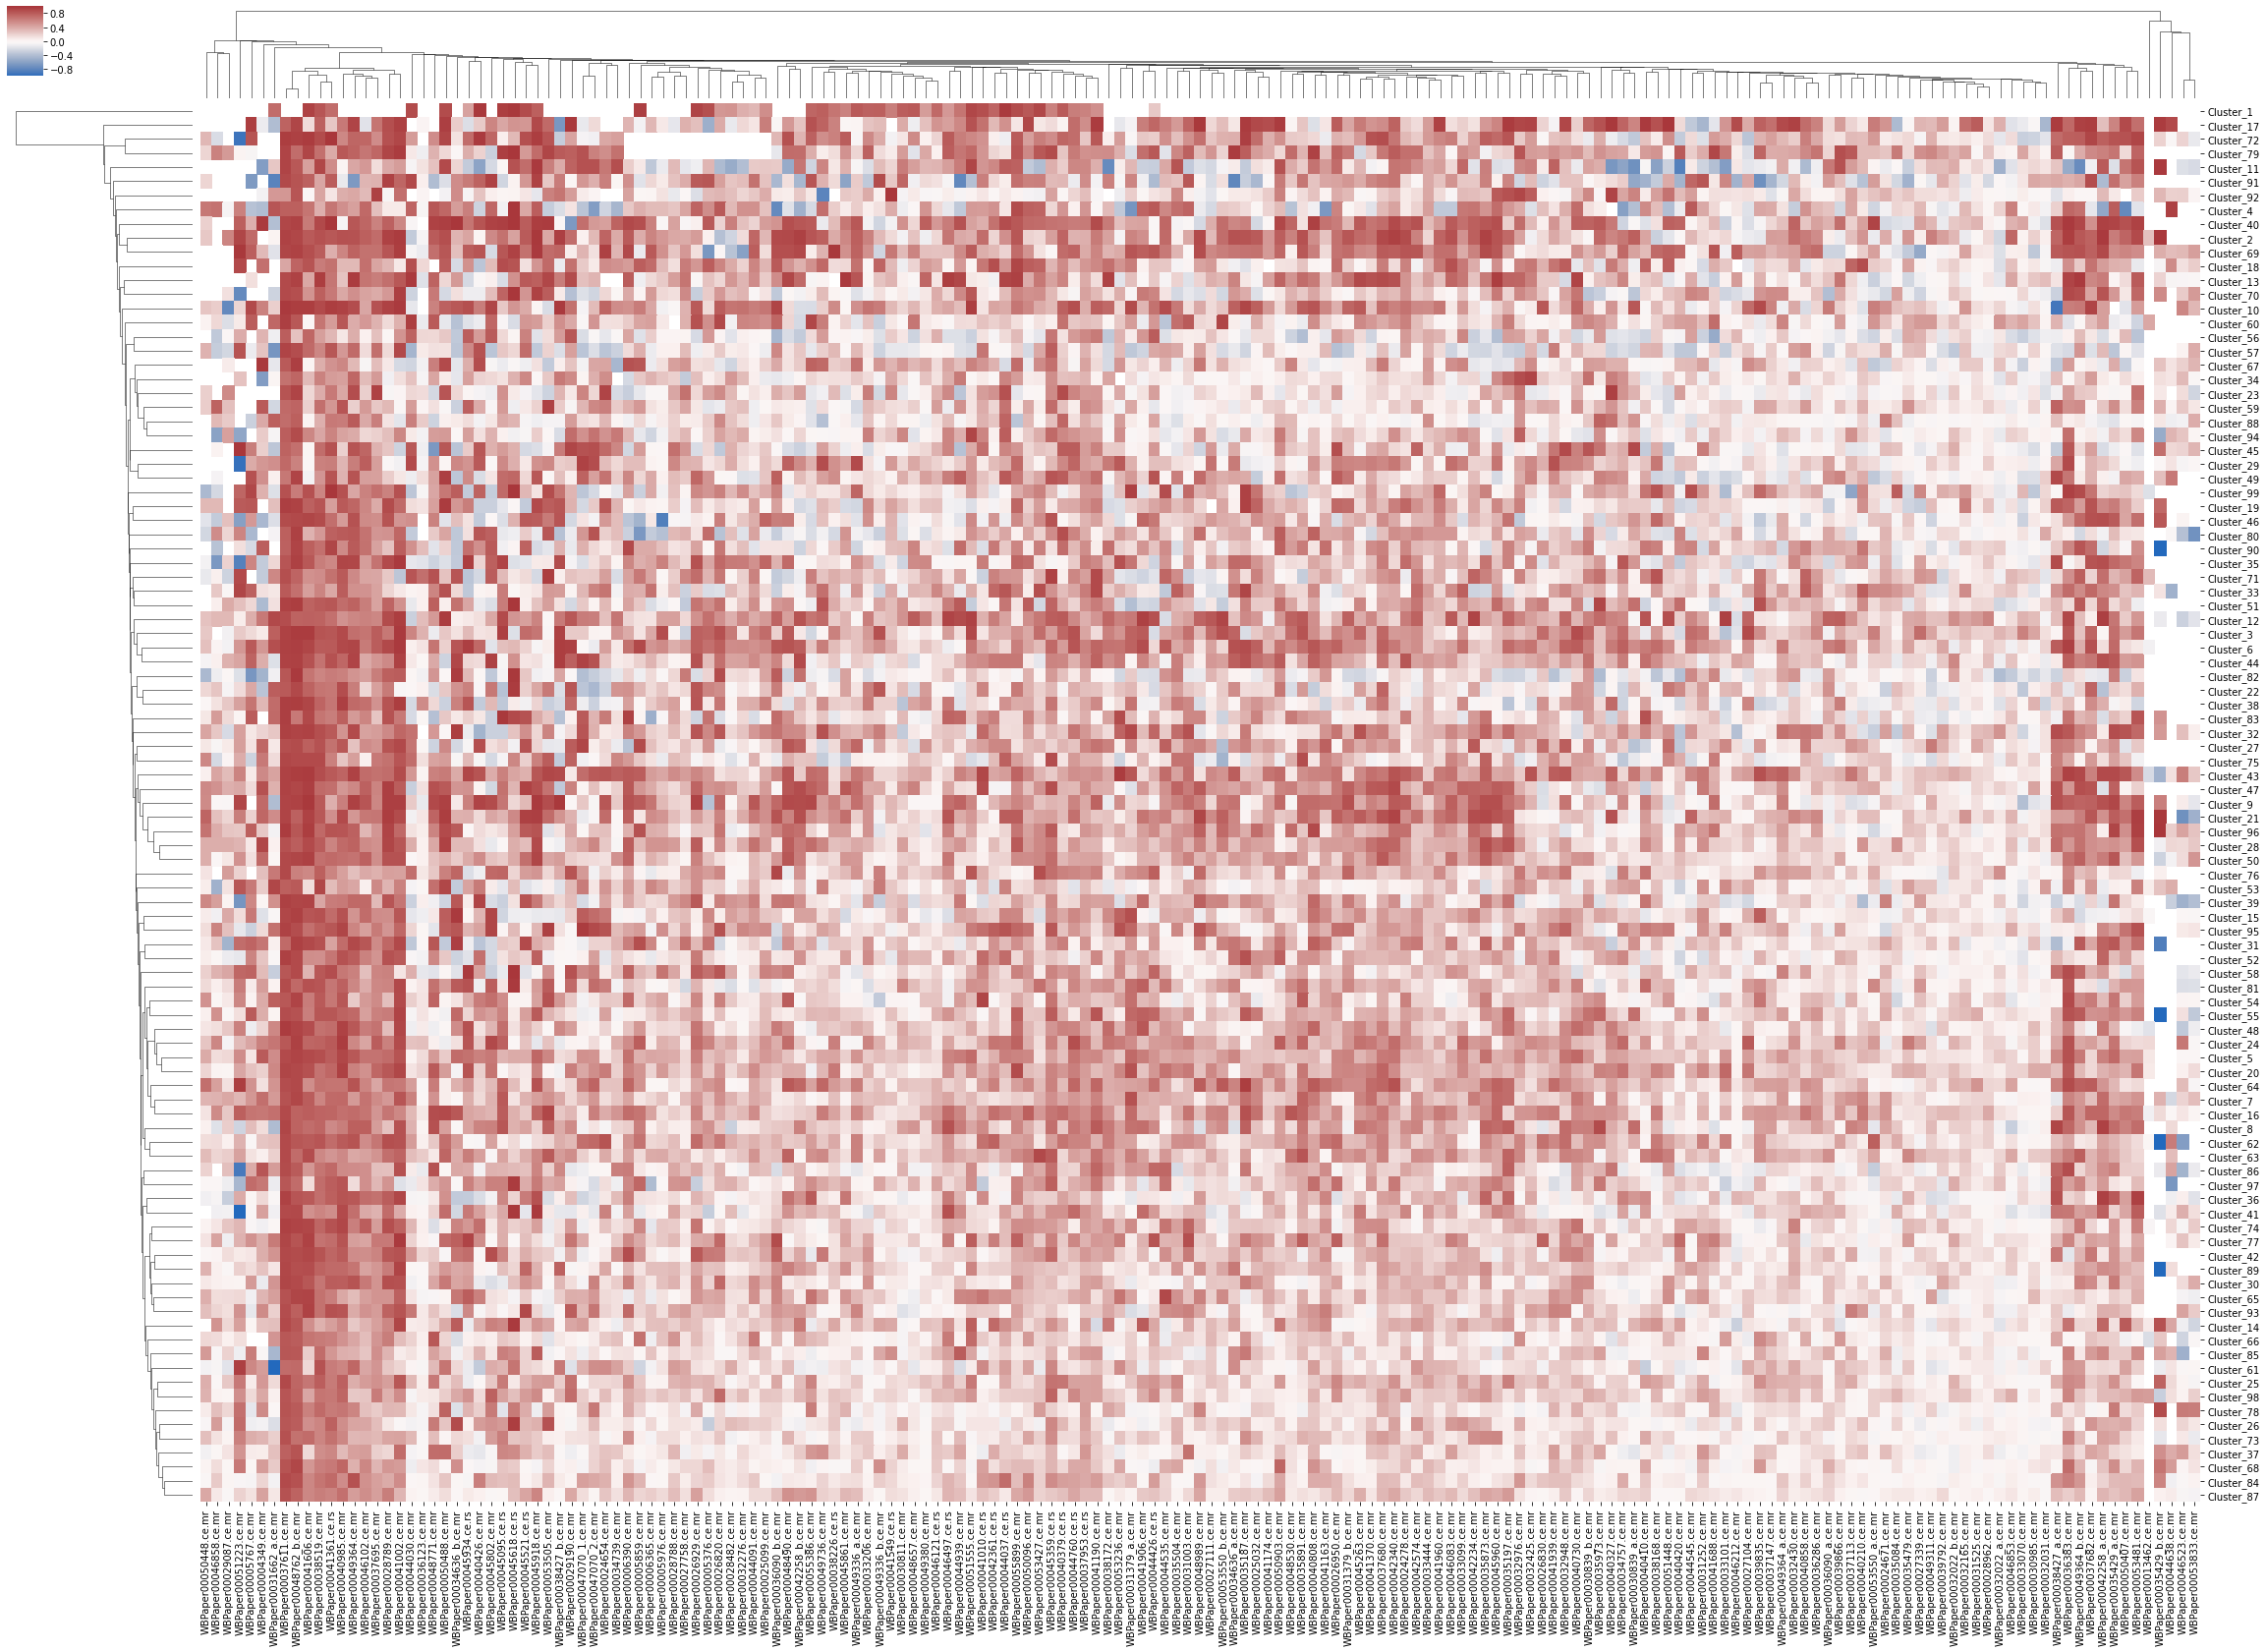

In [31]:
sns.clustermap(Pathway_mean_df,vmin=-1,vmax=1,mask=Pathway_mean_df==-1.05,cmap='vlag',figsize=(40, 28),
               yticklabels=True,xticklabels=True)
plt.savefig("Pathway_mean_df.png",dpi=300)
plt.savefig("Pathway_mean_df.svg",dpi=300)

In [266]:
Pathway_mean_df.loc['Cluster_1'].sort_values()

WBPaper00032165.ce.mr     -1.050000
WBPaper00042258_b.ce.mr   -1.050000
WBPaper00031525.ce.mr     -1.050000
WBPaper00031379_a.ce.mr   -1.050000
WBPaper00035479.ce.mr     -1.050000
                             ...   
WBPaper00005859.ce.mr      0.959234
WBPaper00045095.ce.rs      0.965916
WBPaper00044037.ce.rs      0.979712
WBPaper00045618.ce.rs      0.990172
WBPaper00040426.ce.mr      0.991229
Name: Cluster_1, Length: 175, dtype: float64

In [33]:
# Pathway_max_df=pd.DataFrame([]);
# count = 1;
# for pathway in ClusterSets.index:
#     print(pathway)
#     for file in os.listdir('./outdir/'): 
#         if fnmatch.fnmatch(file, "PathwayGeneCorrs_{}.csv".format(pathway)):
#             df=pd.read_csv("./outdir/{}".format(file),index_col=0,header='infer')
#             df.set_index(['Gene1','Gene2'],inplace=True)
#             max=pd.DataFrame(df.max(skipna=True,numeric_only=True))
#             max.set_axis([pathway],inplace=True,axis=1);
#             if(count == 1):
#                 Pathway_max_df=max;
#                 count=count+1;
#                 continue;
#             Pathway_max_df=pd.merge(Pathway_max_df,max,how='outer',left_index=True,right_index=True)
                             


In [34]:
# Pathway_max_df.replace(np.nan,-1,inplace=True)
# # Pathway_max_df.drop(index=['Unnamed: 3_x','Unnamed: 3_y'],inplace=True)
# Pathway_max_df=Pathway_max_df.transpose()
# sns.clustermap(Pathway_max_df,vmin=-0.75,vmax=0.75,mask=Pathway_max_df==-1,cmap='vlag')

In [35]:
# Pathway_GM_df=pd.DataFrame([]);
# count = 1;
# for pathway in ClusterSets.index:
#     print(pathway)
#     for file in os.listdir('./outdir/'): 
#         if fnmatch.fnmatch(file, "PathwayGeneCorrs_{}.csv".format(pathway)):
#             df1=pd.read_csv("./outdir/{}".format(file),index_col=0,header='infer')
#             df1.set_index(['Gene1','Gene2'],inplace=True)
#             df1=(df1+1)/2
#             gm=pd.DataFrame(np.exp(np.log(df1.prod(axis=0))/df1.notna().sum(0)))
#             gm.set_axis([pathway],inplace=True,axis=1);
#             if(count == 1):
#                 Pathway_GM_df=gm;
#                 count=count+1;
#                 continue;
#             Pathway_GM_df=pd.merge(Pathway_GM_df,gm,how='outer',left_index=True,right_index=True);
     
# Pathway_GM_df=(Pathway_GM_df*2)-1;  

In [36]:

# Pathway_GM_df.replace(np.nan,-1,inplace=True)
# # Pathway_GM_df.drop(index=['Unnamed: 3_y'],inplace=True)
# Pathway_GM_df=Pathway_GM_df.transpose()
# sns.clustermap(Pathway_GM_df,vmin=-0.75,vmax=0.75,mask=Pathway_GM_df==-1,figsize=(40, 28),
#                cmap='vlag',yticklabels=True,xticklabels=True)
# plt.savefig("Pathway_GM_df_070422.svg",dpi=300)
# plt.savefig("Pathway_GM_df_070422.png",dpi=300)

In [37]:
# Pathway_GM_df.min().min()

In [38]:
# WBPaper_37958=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/WBPaper00037948.ce.rs.csv",
#                          sep='\t',index_col=0)

In [39]:
# MetabolicClasses=pd.read_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv",index_col=0)
# metabolic=list(set(MetabolicClasses.index).intersection(set(WBPaper_37958.index)))
# MetabolicWBPaper_37958=WBPaper_37958.loc[metabolic]

In [40]:
# (Pathway_GM_df==-1).sum(axis=1).sort_values(ascending=False)

In [41]:
# Pathway_GM_df.drop(columns=['WBPaper00037948.ce.rs','WBPaper00040184.ce.mr','Unnamed: 3_x'],inplace=True)

In [42]:
# Glycolysis=wb_to_gene(Glycolysis)
# Glycolysis_MetabolicExpression=MetabolicExpression.loc[:,Glycolysis.index]
# Glycolysis_MetabolicExpression=Glycolysis_MetabolicExpression.transpose()
# Glycolysis_MetabolicExpression.min().min()
# Glycolysis_MetabolicExpression.replace(np.nan,-14,inplace=True)
# x=Glycolysis_MetabolicExpression.mean(axis=1)
# x=pd.DataFrame(x)
# x.sort_values(ascending=False,by=[0],inplace=True)
# plt.figure(figsize=(2,10))
# sns.heatmap(x,vmin=-2,vmax=2,cmap='vlag')
# sns.clustermap(Glycolysis_MetabolicExpression,vmin=-2,vmax=2,cmap='vlag',mask=Glycolysis_MetabolicExpression==-14)

In [43]:
def FindBestDatasets(Pathway_df,par):
    for pathway in Pathway_df.columns:
        x=Pathway_df[pathway]
        x=pd.DataFrame(x)
#         print(x)
        x.sort_values(by=pathway,ascending=False,inplace=True)
        BestDatasets_25=x[0:25]
        print(BestDatasets_25)
        BestDatasets_25=pd.DataFrame(BestDatasets_25)
        print(BestDatasets_25)
        BestDatasets_25.to_csv("BestDatasets_{}_{}.csv".format(pathway,par))
        RepressingDatasets_25=x[-26:-1]
        print(RepressingDatasets_25)
        RepressingDatasets_25=pd.DataFrame(RepressingDatasets_25)
        print(RepressingDatasets_25)
        RepressingDatasets_25.to_csv("RepressingDatasets_{}_{}.csv".format(pathway,par))
        

In [44]:
# Pathway_GM_df=Pathway_GM_df.transpose()
# FindBestDatasets(Pathway_df=Pathway_mean_df,par='mean')

In [45]:
# !ls -lhrt

In [46]:
# x=pd.read_csv("BestDatasets_Cluster_7_mean.csv",index_col=0)
# x=x.transpose()
# fig=plt.figure(figsize=(10,2))
# sns.heatmap(x,cmap='vlag',vmin=-1,vmax=1)
# # x=x.transpose
# plt.tight_layout()
# plt.savefig("Tyrosine_best_datasets.png",dpi=300)

In [47]:
# x.columns

In [48]:
# y=pd.read_csv("RepressingDatasets_Cluster_7_gm.csv",index_col=0)
# y=y.transpose()
# y.drop(columns=['Unnamed: 3_x'],inplace=True)
# fig=plt.figure(figsize=(10,2))
# sns.heatmap(y,cmap='vlag',vmin=-1,vmax=1)
# # x=x.transpose
# plt.tight_layout()
# plt.savefig("Tyrosine_repressing_datasets.png",dpi=300)

In [49]:
# FindBestDatasets(Pathway_df=Pathway_mean_df.transpose(),par='mean')

In [50]:
# ! ls -lhrt

In [51]:
# FindBestDatasets(Pathway_df=Pathway_max_df.transpose(),par='max')

In [52]:
def ExtractingGenes(ClusterFile,Cluster):
    genes=ClusterFile.loc[Cluster]
    genes.dropna(inplace=True)
    genes.drop(index=['Mean Silhoutte Values'],inplace=True)
    genes=list(genes[0:genes.shape[0]])
    return genes
       
def ExtractPaperHeatmap(df,paper,gene):
    print("Paper:{}\n Gene:{}".format(paper,gene))
    paper_df=df[df.Paper==paper];
#     print("PaperDF:{}".format(paper_df))
    paper_df=paper_df.loc[:,gene]
#     print("PaperDF:{}".format(paper_df))
    paper_df=pd.DataFrame(paper_df);
    paper_df.replace(np.nan,-8,inplace=True)
#     print("PaperDF:{}".format(paper_df))
    fig=plt.figure(figsize=(4,10))
    sns.set(font='Arial')
    sns.clustermap(paper_df,cbar=True,cbar_kws={'label':'Z_Score'},cmap='vlag',vmin=-2,vmax=2,mask=paper_df==-8)
    plt.tight_layout()
    plt.savefig("Heatmap_{}_{}.svg".format(paper,gene),dpi=300,figsize=(15,15))
    return paper_df

In [53]:
# AllExpression=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/combined_z_normalised.pcl",
#                           sep='\t',index_col=0)
# MetabolicClasses=pd.read_csv("/data/nandas/MetabolicClasses_August_SN_090221.csv",index_col=0)
# MetabolicClasses=SeqToGene(MetabolicClasses)
# MetabolicClasses=SeqToWB(MetabolicClasses)
# MetabolicClasses=gene_to_wb(MetabolicClasses)
# metabolic=list(set(AllExpression.index).intersection(set(MetabolicClasses.index)))
# MetabolicExpression=AllExpression.loc[metabolic]
# MetabolicExpression.to_csv("MetabolicExpression_063022.csv")

In [54]:
MetabolicExpression=pd.read_csv("MetabolicExpression_063022.csv",index_col=0)

In [55]:
MetabolicExpression=wb_to_gene(MetabolicExpression)

In [56]:
ech_6=MetabolicExpression.loc[['acdh-1','hach-1','ech-6','hphd-1','alh-8','dhp-1',
                              'dhp-2','dpyd-1','upb-1','gta-1','T09B4.8']]

In [57]:
ech_6=pd.DataFrame(ech_6)

In [58]:
ech_6=ech_6[ech_6!=np.nan]

In [59]:
ech_6=ech_6[ech_6!=np.NaN]
# ech_6=ech_6[ech_6!=np.Nan]

In [60]:
ech_6.drop(columns=['IDENTIFIER','GWEIGHT'],inplace=True)

In [61]:
ech_6[(ech_6.isna().sum(axis=1))!=4727]

[cgc4349]:fem-3_fem-1  [cgc4349]:glp-4_reference_adult  \
ID_REF                                                            
acdh-1               -1.931970                        -0.549429   
hach-1               -1.181200                        -0.670990   
ech-6                      NaN                              NaN   
hphd-1                     NaN                              NaN   
alh-8                 0.038443                         0.709380   
dhp-1                -0.168347                         1.513790   
dhp-2                -0.470897                         0.712783   
dpyd-1               -0.998932                         0.409611   
upb-1                 0.564946                         1.214590   
gta-1                -0.586753                         1.286150   
T09B4.8              -1.088500                         0.484749   

         [cgc4349]:glp-4_reference_L2  [cgc4349]:glp-4_reference_L3  \
ID_REF                                                                
acdh-1                      -1.528180                      0.374929   
hach-1                      -1.707860                      0.760878   
ech-6                             NaN                           NaN   
hphd-1                            NaN                           NaN   
alh-8                       -1.708990                     -1.008150   
dhp-1                       -0.020141                      0.683839   
dhp-2                        0.182719                      1.346470   
dpyd-1                      -0.113335                      0.921189   
upb-1                       -1.585860                     -0.541653   
gta-1                       -0.502226                      1.301800   
T09B4.8                      0.119799                      1.537950   

         [cgc4349]:glp-4_reference_L4  [cgc4349]:WT_glp-4_adult  \
ID_REF                                                            
acdh-1                       0.262977                 -0.795565   
hach-1                       0.225984                 -0.522866   
ech-6                             NaN                       NaN   
hphd-1                            NaN                       NaN   
alh-8                       -1.219670                 -0.843168   
dhp-1                        0.372606                 -2.747140   
dhp-2                        1.788860                 -1.810010   
dpyd-1                       0.665400                 -2.220750   
upb-1                       -0.062677                 -0.266379   
gta-1                        1.458330                 -1.750570   
T09B4.8                      1.163080                 -1.559170   

         [cgc4349]:WT_glp-4_L2  [cgc4349]:WT_glp-4_L3  [cgc4349]:WT_glp-4_L4  \
ID_REF                                                                         
acdh-1                1.464940              -0.197114               0.267287   
hach-1                1.024210              -0.605157              -1.131820   
ech-6                      NaN                    NaN                    NaN   
hphd-1                     NaN                    NaN                    NaN   
alh-8                 1.805050               1.377780               0.992815   
dhp-1                 0.296034              -0.486991              -0.635197   
dhp-2                 0.310251              -0.506766              -1.008930   
dpyd-1                0.261822              -0.528280              -0.873595   
upb-1                 2.055090               1.280660               0.207091   
gta-1                 0.233473              -1.003130              -1.484460   
T09B4.8              -0.098378              -1.008770              -1.458020   

         [cgc4349]:WT_reference_adult  ...  WBPaper00055899:NQ_83ppm_rep4  \
ID_REF                                 ...                                  
acdh-1                      -0.399072  ...                      -0.932601   
hach-1                       0.415254  ...                      -0.10

In [62]:
ech_6.replace(np.nan,-20,inplace=True)

In [63]:
ech_6=ech_6.transpose()

In [64]:
ech_6.drop(columns=['ech-6'],inplace=True)

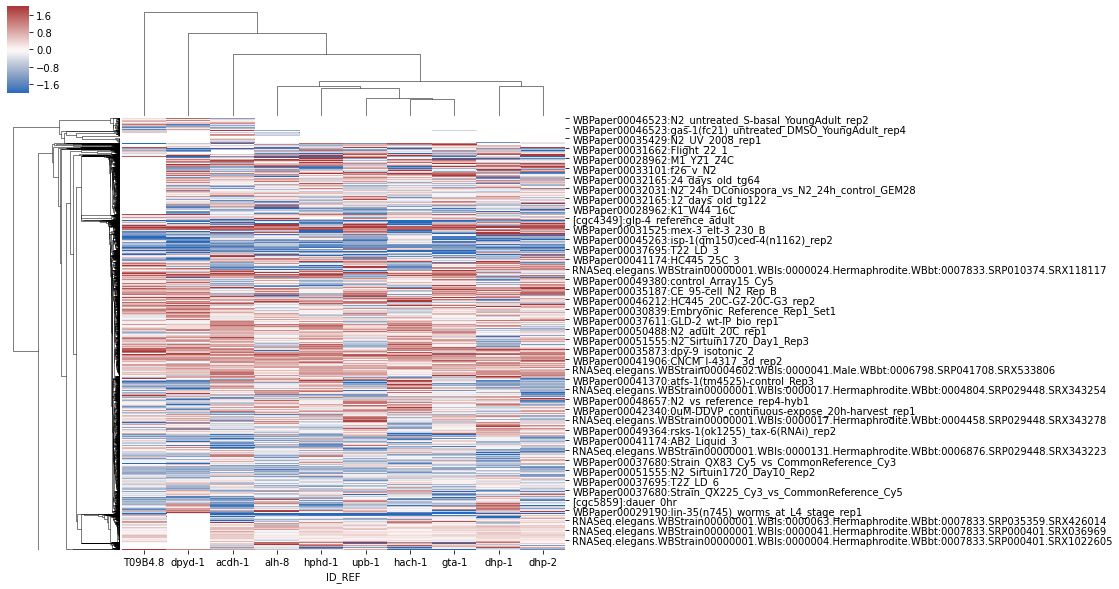

In [65]:
sns.clustermap(ech_6,mask=ech_6==-20,cmap='vlag',vmin=-2,vmax=2)

In [66]:
ech_6.sort_values(ascending=False,by=['alh-8'])

ID_REF                                                 acdh-1    hach-1  \
WBPaper00037695:T1_control_4                         1.285130   2.91637   
WBPaper00037695:T1_control_6                         1.355840   3.27350   
WBPaper00042340:0uM-DDVP_2h-expose_20h-harvest_...   1.661490   3.16691   
WBPaper00042574:JU1580_OrsayVirus_rep3              -3.431770  -2.74946   
WBPaper00051555:atm-1(gk186)_Nicotinamide-Ribos...   1.143930   1.39209   
...                                                       ...       ...   
WBPaper00044638:rsks-1(ok1255)_rep6                  0.138264 -20.00000   
WBPaper00044638:rsks-1(ok1255)_rep7                 -0.328993 -20.00000   
WBPaper00044638:rsks-1(ok1255)_rep8                  0.427348 -20.00000   
WBPaper00044638:rsks-1(ok1255)_rep9                  0.877905 -20.00000   
WBPaper00035429:xpa-1_control_2008_rep2            -20.000000 -20.00000   

ID_REF                                                hphd-1     alh-8  \
WBPaper00037695:T1_control_4                         3.87196   4.41792   
WBPaper00037695:T1_control_6                         4.18544   4.40267   
WBPaper00042340:0uM-DDVP_2h-expose_20h-harvest_...   1.13569   3.83332   
WBPaper00042574:JU1580_OrsayVirus_rep3              -1.31207   3.49140   
WBPaper00051555:atm-1(gk186)_Nicotinamide-Ribos...   1.67883   3.49057   
...                                                      ...       ...   
WBPaper00044638:rsks-1(ok1255)_rep6                -20.00000 -20.00000   
WBPaper00044638:rsks-1(ok1255)_rep7                -20.00000 -20.00000   
WBPaper00044638:rsks-1(ok1255)_rep8                -20.00000 -20.00000   
WBPaper00044638:rsks-1(ok1255)_rep9                -20.00000 -20.00000   
WBPaper00035429:xpa-1_control_2008_rep2            -20.00000 -20.00000   

ID_REF                                                  dhp-1      dhp-2  \
WBPaper00037695:T1_control_4                         2.320870   1.307490   
WBPaper00037695:T1_control_6                         2.312850   1.856490   
WBPaper00042340:0uM-DDVP_2h-expose_20h-harvest_...  -0.307572  -0.758893   
WBPaper00042574:JU1580_OrsayVirus_rep3               3.355240   2.995640   
WBPaper00051555:atm-1(gk186)_Nicotinamide-Ribos...  -1.768280   0.700570   
...                                                       ...        ...   
WBPaper00044638:rsks-1(ok1255)_rep6                -20.000000 -20.000000   
WBPaper00044638:rsks-1(ok1255)_rep7                -20.000000 -20.000000   
WBPaper00044638:rsks-1(ok1255)_rep8                -20.000000 -20.000000   
WBPaper00044638:rsks-1(ok1255)_rep9                -20.000000 -20.000000   
WBPaper00035429:xpa-1_control_2008_rep2            -20.000000  -1.749820   

ID_REF                                                 dpyd-1     upb-1  \
WBPaper00037695:T1_control_4                         3.156610   3.61998   
WBPaper00037695:T1_control_6                         2.938980   3.36655   
WBPaper00042340:0uM-DDVP_2h-expose_20h-harvest_...  -1.373870  -1.36734   
WBPaper00042574:JU1580_OrsayVirus_rep3              -0.640067   2.71093   
WBPaper00051555:atm-1(gk186)_Nicotinamide-Ribos...   1.483210   3.32154   
...                                                       ...       ...   
WBPaper00044638:rsks-1(ok1255)_rep6                -20.000000 -20.00000   
WBPaper00044638:rsks-1(ok1255)_rep7                -20.000000 -20.00000   
WBPaper00044638:rsks-1(ok1255)_rep8                -20.000000 -20.00000   
WBPaper00044638:rsks-1(ok1255)_rep9                -20.000000 -20.00000   
WBPaper00035429:xpa-1_control_2008_rep2            -20.000000 -20.00000   

ID_REF                                                 gta-1    T09B4.8  
WBPaper00037695:T1_control_4                         3.74352   4.357360  
WBPaper00037695:T1_control_6                         3.75586   4.898620  
WBPaper00042340:0uM-DDVP_2h-expose_20h-harvest_...  -3.58306  -1.592100  
WBPaper00042574:JU1580_OrsayVirus_rep3               0.89278   0.127295  
WBPaper00051555:atm-1(gk18

In [67]:
MetabolicExpression.loc['ech-6'].notna()

IDENTIFIER                          False
GWEIGHT                             False
[cgc4349]:fem-3_fem-1               False
[cgc4349]:glp-4_reference_adult     False
[cgc4349]:glp-4_reference_L2        False
                                    ...  
WBPaper00055899:NQ_2667ppm_rep1     False
WBPaper00055899:NTO_187ppm_rep4     False
WBPaper00055899:NTO_Control_rep2    False
WBPaper00055899:NTO_750ppm_rep4     False
WBPaper00055899:NQ_Control_rep4     False
Name: ech-6, Length: 4729, dtype: bool

In [68]:
# MetabolicExpression.loc[:,~(MetabolicExpression.columns.str.startswith("WB"))]

In [69]:
MetabolicExpression=MetabolicExpression.transpose()
for i in MetabolicExpression.index:
    print(i)
    MetabolicExpression.at[i,'Paper']=i.split(":")[0]

IDENTIFIER
GWEIGHT
[cgc4349]:fem-3_fem-1
[cgc4349]:glp-4_reference_adult
[cgc4349]:glp-4_reference_L2
[cgc4349]:glp-4_reference_L3
[cgc4349]:glp-4_reference_L4
[cgc4349]:WT_glp-4_adult
[cgc4349]:WT_glp-4_L2
[cgc4349]:WT_glp-4_L3
[cgc4349]:WT_glp-4_L4
[cgc4349]:WT_reference_adult
[cgc4349]:WT_reference_L2
[cgc4349]:WT_reference_L3
[cgc4349]:WT_reference_L4
[cgc5376]:let-23(sy1)_32h
[cgc5376]:let-23(sy1)_34h
[cgc5376]:let-23(sy1)_36h
[cgc5376]:let-23(sy1)_38h
[cgc5376]:let-23(sy1)_40h
[cgc5376]:let-23(sy1)_42h
[cgc5376]:let-23(sy1)_44h
[cgc5376]:let-60(n1046)_32h
[cgc5376]:let-60(n1046)_34h
[cgc5376]:let-60(n1046)_36h
[cgc5376]:let-60(n1046)_38h
[cgc5376]:let-60(n1046)_40h
[cgc5376]:let-60(n1046)_42h
[cgc5376]:let-60(n1046)_44h
[cgc5376]:let-60_heat_shock_T0
[cgc5376]:let-60_heat_shock_T0_5
[cgc5376]:let-60_heat_shock_T1
[cgc5376]:let-60_heat_shock_T2
[cgc5376]:WT_32h
[cgc5376]:WT_34h
[cgc5376]:WT_36h
[cgc5376]:WT_38h
[cgc5376]:WT_40h
[cgc5376]:WT_42h
[cgc5376]:WT_44h
[cgc5376]:WT_heat_s

WBPaper00028789:Celegans_gacA_4hours_RepC
WBPaper00028789:Celegans_gacA_8hours_RepA
WBPaper00028789:Celegans_gacA_8hours_RepB
WBPaper00028789:Celegans_gacA_8hours_RepC
WBPaper00028789:Celegans_OP50_4hours_RepA
WBPaper00028789:Celegans_OP50_4hours_RepB
WBPaper00028789:Celegans_OP50_4hours_RepC
WBPaper00028789:Celegans_OP50_8hours_RepA
WBPaper00028789:Celegans_OP50_8hours_RepB
WBPaper00028789:Celegans_OP50_8hours_RepC
WBPaper00028789:Celegans_PA14_4hours_RepA
WBPaper00028789:Celegans_PA14_4hours_RepB
WBPaper00028789:Celegans_PA14_4hours_RepC
WBPaper00028789:Celegans_PA14_8hours_RepA
WBPaper00028789:Celegans_PA14_8hours_RepB
WBPaper00028789:Celegans_PA14_8hours_RepC
WBPaper00028789:daf2daf16_RepA
WBPaper00028789:daf2daf16_RepB
WBPaper00028789:daf2daf16_RepC
WBPaper00028789:daf2pmk1_RepA
WBPaper00028789:daf2pmk1_RepB
WBPaper00028789:daf2pmk1_RepC
WBPaper00028789:daf2_RepA
WBPaper00028789:daf2_RepB
WBPaper00028789:daf2_RepC
WBPaper00028962:C25_Y82_16C
WBPaper00028962:C25_Y82_24C
WBPaper0002

WBPaper00032031:N2_24h_DConiospora_vs_N2_24h_control_GEM27
WBPaper00032031:N2_24h_DConiospora_vs_N2_24h_control_GEM28
WBPaper00032031:N2_24h_DConiospora_vs_N2_24h_control_GEM29
WBPaper00032031:N2_24h_DConiospora_vs_N2_24h_control_GEM30
WBPaper00032031:N2_24h_DConiospora_vs_N2_24h_control_GEM31
WBPaper00032165:12_days_old_tg115
WBPaper00032165:12_days_old_tg122
WBPaper00032165:12_days_old_tg132
WBPaper00032165:12_days_old_tg133
WBPaper00032165:12_days_old_tg139
WBPaper00032165:12_days_old_tg28
WBPaper00032165:12_days_old_tg29
WBPaper00032165:12_days_old_tg32
WBPaper00032165:12_days_old_tg36
WBPaper00032165:12_days_old_tg45
WBPaper00032165:12_days_old_tg6
WBPaper00032165:12_days_old_tg76
WBPaper00032165:12_days_old_tg77
WBPaper00032165:12_days_old_tg85
WBPaper00032165:12_days_old_tg90
WBPaper00032165:12_days_old_tg96
WBPaper00032165:12_days_old_tg98
WBPaper00032165:14_days_old_tg101
WBPaper00032165:14_days_old_tg11
WBPaper00032165:14_days_old_tg117
WBPaper00032165:14_days_old_tg126
WBPap

WBPaper00035504:m596_2
WBPaper00035504:m596_3
WBPaper00035504:e1368_1
WBPaper00035504:e1368_2
WBPaper00035504:e1368_3
WBPaper00035504:m596_4
WBPaper00035504:m596_5
WBPaper00035504:m596_6
WBPaper00035504:e1370_1
WBPaper00035504:e1370_2
WBPaper00035504:e1370_3
WBPaper00035504:e1370_4
WBPaper00035504:e1370_5
WBPaper00035504:e1370_6
WBPaper00035504:e1368_4
WBPaper00035504:e1368_5
WBPaper00035504:e1368_6
WBPaper00035873:N2_isotonic_1
WBPaper00035873:N2_isotonic_2
WBPaper00035873:N2_isotonic_3
WBPaper00035873:15min_N2_hypertonic_1
WBPaper00035873:15min_N2_hypertonic_2
WBPaper00035873:15min_N2_hypertonic_3
WBPaper00035873:1hr_N2_hypertonic_1
WBPaper00035873:1hr_N2_hypertonic_2
WBPaper00035873:1hr_N2_hypertonic_3
WBPaper00035873:6hr_N2_hypertonic_1
WBPaper00035873:6hr_N2_hypertonic_2
WBPaper00035873:6hr_N2_hypertonic_3
WBPaper00035873:96hr_N2_hypertonic_1
WBPaper00035873:96hr_N2_hypertonic_2
WBPaper00035873:96hr_N2_hypertonic_3
WBPaper00035873:osm-7_isotonic_1
WBPaper00035873:osm-7_isotonic_2


WBPaper00037680:Strain_QX51_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX52_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX53_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX56_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX4_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX58_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX60_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX64_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX65_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX66_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX67_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX68_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX69_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX70_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX72_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX74_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX6_Cy5_vs_CommonReference_Cy3
WBPaper00037680:Strain_QX81_Cy5_vs_CommonReference_Cy3
WBPaper00037

RNASeq.elegans.WBStrain00000001.WBls:0000041.Hermaphrodite.WBbt:0007833.SRP000401.SRX036967
RNASeq.elegans.WBStrain00000001.WBls:0000041.Hermaphrodite.WBbt:0007833.SRP000401.SRX036969
RNASeq.elegans.WBStrain00000001.WBls:0000041.Hermaphrodite.WBbt:0007833.SRP000401.SRX036970
RNASeq.elegans.WBStrain00000001.WBls:0000004.Hermaphrodite.WBbt:0007833.SRP000401.SRX037186
RNASeq.elegans.WBStrain00000001.WBls:0000004.Hermaphrodite.WBbt:0007833.SRP000401.SRX037197
RNASeq.elegans.WBStrain00004346.WBls:0000003.Male.WBbt:0007833.SRP000401.SRX037198
RNASeq.elegans.WBStrain00004309.WBls:0000052.Hermaphrodite.WBbt:0007833.SRP000401.SRX037199
RNASeq.elegans.WBStrain00022538.WBls:0000038.Hermaphrodite.WBbt:0007833.SRP000401.SRX037200
RNASeq.elegans.WBStrain00000001.WBls:0000024.Hermaphrodite.WBbt:0007833.SRP000401.SRX037288
RNASeq.elegans.WBStrain00000001.WBls:0000021.Hermaphrodite.WBbt:0007833.SRP000401.SRX047446
RNASeq.elegans.WBStrain00000001.WBls:0000038.Male.WBbt:0007833.SRP000401.SRX047469
RNASeq

RNASeq.elegans.WBStrain00034458.WBls:0000004.Hermaphrodite.WBbt:0006849.SRP000401.SRX1041562
RNASeq.elegans.WBStrain00027573.WBls:0000004.Hermaphrodite.WBbt:0006825.SRP000401.SRX1041564
RNASeq.elegans.WBStrain00028689.WBls:0000021.Hermaphrodite.WBbt:0005840.SRP000401.SRX1041571
RNASeq.elegans.WBStrain00028689.WBls:0000021.Hermaphrodite.WBbt:0005840.SRP000401.SRX1041572
RNASeq.elegans.WBStrain00028688.WBls:0000038.Hermaphrodite.WBbt:0003670.SRP000401.SRX1041641
RNASeq.elegans.WBStrain00028685.WBls:0000021.Hermaphrodite.WBbt:0006819.SRP000401.SRX1041642
RNASeq.elegans.WBStrain00028685.WBls:0000021.Hermaphrodite.WBbt:0006819.SRP000401.SRX1041643
RNASeq.elegans.WBStrain00028688.WBls:0000038.Hermaphrodite.WBbt:0003670.SRP000401.SRX1041644
RNASeq.elegans.WBStrain00028685.WBls:0000021.Hermaphrodite.WBbt:0006819.SRP000401.SRX1041646
RNASeq.elegans.WBStrain00028685.WBls:0000021.Hermaphrodite.WBbt:0006819.SRP000401.SRX1041647
RNASeq.elegans.WBStrain00007725.WBls:0000004.Hermaphrodite.WBbt:000367

WBPaper00040730:4uM-Heme-hrg-2(tm3978)_rep1
WBPaper00040730:4uM-Heme-hrg-2(tm3978)_rep2
WBPaper00040730:4uM-Heme-hrg-2(tm3978)_rep3
WBPaper00040730:20uM-Heme-hrg-2(tm3978)_rep1
WBPaper00040730:20uM-Heme-hrg-2(tm3978)_rep2
WBPaper00040730:20uM-Heme-hrg-2(tm3978)_rep3
WBPaper00040808:0.1uM_ivermectin_exposure_rep1
WBPaper00040808:0.1uM_ivermectin_exposure_rep2
WBPaper00040808:0.1uM_ivermectin_exposure_rep3
WBPaper00040808:0.1uM_ivermectin_exposure_rep4
WBPaper00040808:0.1uM_ivermectin_exposure_rep5
WBPaper00040808:0.1uM_DMSO_control_rep1
WBPaper00040808:0.1uM_DMSO_control_rep2
WBPaper00040808:0.1uM_DMSO_control_rep3
WBPaper00040808:0.1uM_DMSO_control_rep4
WBPaper00040808:0.1uM_DMSO_control_rep5
WBPaper00040808:1.1uM_ivermectin_exposure_rep1
WBPaper00040808:1.1uM_ivermectin_exposure_rep2
WBPaper00040808:1.1uM_ivermectin_exposure_rep3
WBPaper00040808:1.1uM_ivermectin_exposure_rep4
WBPaper00040808:1.1uM_ivermectin_exposure_rep5
WBPaper00040808:1.1uM_DMSO_control_rep1
WBPaper00040808:1.1uM_D

WBPaper00041939:UVC-EtBr-exposed_24h_exp6_6Eu24
WBPaper00041939:EtBr-exposed_48h_exp6_6e48
WBPaper00041939:UVC-EtBr-exposed_48h_exp6_6Eu48
WBPaper00041939:EtBr-exposed_51h_exp6_6e51
WBPaper00041939:UVC-EtBr-exposed_51h_exp6_6Eu51
WBPaper00041939:control_3h_exp7_7c3
WBPaper00041939:UVC-exposed_3h_exp7_7u3
WBPaper00041939:EtBr-exposed_3h_exp7_7e3
WBPaper00041939:UVC-EtBr-exposed_3h_exp7_7eu3
WBPaper00041939:control_24h_exp7_7c24
WBPaper00041939:UVC-exposed_24h_exp7_7u24
WBPaper00041939:EtBr-exposed_24h_exp7_7e24
WBPaper00041939:UVC-EtBr-exposed_24h_exp7_7eu24
WBPaper00041939:control_48h_exp7_7c48
WBPaper00041939:UVC-exposed_48h_exp7_7u48
WBPaper00041939:EtBr-exposed_48h_exp7_7e48
WBPaper00041939:UVC-EtBr-exposed_48h_exp7_7eu48
WBPaper00041939:control_51h_exp7_7c51
WBPaper00041939:UVC-exposed_51h_exp7_7u51
WBPaper00041939:UVC-EtBr-exposed_51h_exp7_7eu51
WBPaper00041960:N2_fed_0h_rep1
WBPaper00041960:N2_fed_0h_rep2
WBPaper00041960:N2_fed_24h_rep1
WBPaper00041960:N2_fed_24h_rep2
WBPaper0004

RNASeq.elegans.WBStrain00000030.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP040269.SRX494556
RNASeq.elegans.WBStrain00000030.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP040269.SRX494557
RNASeq.elegans.WBStrain00000030.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP040269.SRX494558
WBPaper00044091:OP50_0h_rep2
WBPaper00044091:OP50_0h_rep3
WBPaper00044091:OP50_2h_rep1
WBPaper00044091:OP50_2h_rep2
WBPaper00044091:OP50_2h_rep3
WBPaper00044091:OP50_4h_rep1
WBPaper00044091:OP50_4h_rep2
WBPaper00044091:OP50_4h_rep3
WBPaper00044091:OP50_8h_rep1
WBPaper00044091:OP50_8h_rep2
WBPaper00044091:OP50_8h_rep3
WBPaper00044091:OP50_12h_rep1
WBPaper00044091:OP50_12h_rep2
WBPaper00044091:OP50_12h_rep3
WBPaper00044091:BpR15_2h_rep1
WBPaper00044091:BpR15_2h_rep2
WBPaper00044091:BpR15_2h_rep3
WBPaper00044091:BpR15_4h_rep1
WBPaper00044091:BpR15_4h_rep2
WBPaper00044091:BpR15_4h_rep3
WBPaper00044091:BpR15_8h_rep1
WBPaper00044091:BpR15_8h_rep2
WBPaper00044091:BpR15_8h_rep3
WBPaper00044091:BpR15_12h_rep1 
WBPaper000440

RNASeq.elegans.WBStrain00022618.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP035359.SRX426045
RNASeq.elegans.WBStrain00022618.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP035359.SRX426046
RNASeq.elegans.WBStrain00022618.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP035359.SRX426047
RNASeq.elegans.WBStrain00022618.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP035359.SRX426048
RNASeq.elegans.WBStrain00022618.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP035359.SRX426049
RNASeq.elegans.WBStrain00022618.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP035359.SRX426050
RNASeq.elegans.WBStrain00022618.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP035359.SRX426051
RNASeq.elegans.WBStrain00022618.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP035359.SRX426052
RNASeq.elegans.WBStrain00022618.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP035359.SRX426053
WBPaper00045802:spe-9_OMA-1-IP_rep1
WBPaper00045802:spe-9_OMA-1-IP_rep2
WBPaper00045802:spe-9_OMA-1-IP_rep3
WBPaper00045802:spe-9_totalRNA_rep1
WBPaper00045802:spe-9_totalR

RNASeq.elegans.WBStrain00000001.WBls:0000471.Hermaphrodite.WBbt:0004458.SRP029448.SRX343276
RNASeq.elegans.WBStrain00000001.WBls:0000017.Hermaphrodite.WBbt:0004458.SRP029448.SRX343277
RNASeq.elegans.WBStrain00000001.WBls:0000017.Hermaphrodite.WBbt:0004458.SRP029448.SRX343278
RNASeq.elegans.WBStrain00000001.WBls:0000151.Hermaphrodite.WBbt:0004015.SRP029448.SRX343280
RNASeq.elegans.WBStrain00000001.WBls:0000151.Hermaphrodite.WBbt:0004015.SRP029448.SRX343281
RNASeq.elegans.WBStrain00000001.WBls:0000151.Hermaphrodite.WBbt:0004015.SRP029448.SRX343282
RNASeq.elegans.WBStrain00000001.WBls:0000171.Hermaphrodite.WBbt:0004015.SRP029448.SRX343283
RNASeq.elegans.WBStrain00000001.WBls:0000171.Hermaphrodite.WBbt:0004015.SRP029448.SRX343284
RNASeq.elegans.WBStrain00000001.WBls:0000171.Hermaphrodite.WBbt:0004015.SRP029448.SRX343285
RNASeq.elegans.WBStrain00000001.WBls:0000201.Hermaphrodite.WBbt:0004015.SRP029448.SRX343287
RNASeq.elegans.WBStrain00000001.WBls:0000201.Hermaphrodite.WBbt:0004015.SRP02944

WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep2-hyb1
WBPaper00048657:N2_vs_reference_rep3-hyb1
WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep3-hyb1
WBPaper00048657:N2_vs_reference_rep4-hyb1
WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep4-hyb1
WBPaper00048657:N2_vs_reference_rep1-hyb2
WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep1-hyb2
WBPaper00048657:N2_vs_reference_rep2-hyb2
WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep2-hyb2
WBPaper00048657:N2_vs_reference_rep3-hyb2
WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep3-hyb2
WBPaper00048657:N2_vs_reference_rep4-hyb2
WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep4-hyb2
WBPaper00048657:N2_vs_reference_rep1-hyb3
WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep1-hyb3
WBPaper00048657:N2_vs_reference_rep2-hyb3
WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep2-hyb3
WBPaper00048657:N2_vs_reference_rep3-hyb3
WBPaper00048657:plep-1(ttTi53821)_vs_reference_rep3-hyb3
WBPaper00048657:N2_vs_reference_rep4-hyb3
WBPaper000

WBPaper00051223:glb-5(Haw);npr-1(ad609)_neurons_24.5hr_vs_glb-5(Haw);npr-1(ad609)_gut_24.5hr
WBPaper00051223:glb-5(Haw);npr-1(ad609)_neurons_24.5hr_vs_npr-1(ad609)_neurons_24.5hr
WBPaper00051448:glp-4(bn2ts)_OP50_NGM-agar_RepA
WBPaper00051448:glp-4(bn2ts)_OP50_NGM-agar_RepB
WBPaper00051448:glp-4(bn2ts)_OP50_NGM-agar_RepC
WBPaper00051448:glp-4(bn2ts)_OP50_SK-agar_RepA
WBPaper00051448:glp-4(bn2ts)_OP50_SK-agar_RepB
WBPaper00051448:glp-4(bn2ts)_OP50_SK-agar_RepC
WBPaper00051448:glp-4(bn2ts)_OP50_LK_RepA
WBPaper00051448:glp-4(bn2ts)_OP50_LK_RepB
WBPaper00051448:glp-4(bn2ts)_OP50_LK_RepC
WBPaper00051448:glp-4(bn2ts)_PA14_SK-agar_RepA
WBPaper00051448:glp-4(bn2ts)_PA14_SK-agar_RepB
WBPaper00051448:glp-4(bn2ts)_PA14_SK-agar_RepC
WBPaper00051448:glp-4(bn2ts)_PA14_LK_RepA
WBPaper00051448:glp-4(bn2ts)_PA14_LK_RepB
WBPaper00051448:glp-4(bn2ts)_PA14_LK_RepC
WBPaper00051448:glp-4(bn2ts)_OP50_DMSO_RepA
WBPaper00051448:glp-4(bn2ts)_OP50_DMSO_RepB
WBPaper00051448:glp-4(bn2ts)_OP50_DMSO_RepC
WBPaper0005

In [70]:
# MetabolicExpression=wb_to_gene(MetabolicExpression)

In [71]:
# MetabolicExpression=MetabolicExpression.transpose()

In [72]:
MetabolicExpression

ID_REF                                  K04A8.10    poml-4  F26C11.1  \
IDENTIFIER                        WBGene00019379       NaN       NaN   
GWEIGHT                                        1       NaN       NaN   
[cgc4349]:fem-3_fem-1                    -3.4641       NaN       NaN   
[cgc4349]:glp-4_reference_adult         0.288675       NaN       NaN   
[cgc4349]:glp-4_reference_L2            0.288675       NaN       NaN   
...                                          ...       ...       ...   
WBPaper00055899:NQ_2667ppm_rep1        -0.747514   1.05543  -1.36521   
WBPaper00055899:NTO_187ppm_rep4        -0.544026  0.975305   1.08996   
WBPaper00055899:NTO_Control_rep2        -0.31038  0.951223   1.04917   
WBPaper00055899:NTO_750ppm_rep4         0.251027  0.490645   1.76411   
WBPaper00055899:NQ_Control_rep4          -1.0927  -0.39125 -0.599608   

ID_REF                                     hex-1     ugt-1           gcy-3  \
IDENTIFIER                        WBGene00020509       NaN  WBGene00001530   
GWEIGHT                                        1       NaN               1   
[cgc4349]:fem-3_fem-1                    1.81026       NaN          3.4641   
[cgc4349]:glp-4_reference_adult         0.274448       NaN       -0.288675   
[cgc4349]:glp-4_reference_L2           -0.745332       NaN       -0.288675   
...                                          ...       ...             ...   
WBPaper00055899:NQ_2667ppm_rep1        -0.322547   1.34042         1.93357   
WBPaper00055899:NTO_187ppm_rep4          0.38798  -1.54122       -0.385444   
WBPaper00055899:NTO_Control_rep2      -0.0796763  -1.58344       -0.435653   
WBPaper00055899:NTO_750ppm_rep4          1.82003  -1.06232        -1.42508   
WBPaper00055899:NQ_Control_rep4         0.240596  0.811083        0.495183   

ID_REF                                  C37H5.13   ZK669.2    anmt-2  \
IDENTIFIER                        WBGene00016511       NaN       NaN   
GWEIGHT                                        1       NaN       NaN   
[cgc4349]:fem-3_fem-1                   -2.42921       NaN       NaN   
[cgc4349]:glp-4_reference_adult         0.374526       NaN       NaN   
[cgc4349]:glp-4_reference_L2            0.321696       NaN       NaN   
...                                          ...       ...       ...   
WBPaper00055899:NQ_2667ppm_rep1       0.00448054  -0.62768 -0.782604   
WBPaper00055899:NTO_187ppm_rep4        0.0805716 -0.680014   1.09164   
WBPaper00055899:NTO_Control_rep2      -0.0852965 -0.482897   1.49309   
WBPaper00055899:NTO_750ppm_rep4         0.240969 -0.844458  0.904668   
WBPaper00055899:NQ_Control_rep4         0.165897 -0.470083 -0.968435   

ID_REF                             D1054.1  ...          ptps-1  \
IDENTIFIER                             NaN  ...  WBGene00015010   
GWEIGHT                                NaN  ...               1   
[cgc4349]:fem-3_fem-1                  NaN  ...      -0.0164388   
[cgc4349]:glp-4_reference_adult        NaN  ...         1.62077   
[cgc4349]:glp-4_reference_L2           NaN  ...      0.00979588   
...                                    ...  ...             ...   
WBPaper00055899:NQ_2667ppm_rep1   0.857062  ...         1.63017   
WBPaper00055899:NTO_187ppm_rep4   -1.99511  ...        0.902125   
WBPaper00055899:NTO_Control_rep2  -2.05903  ...         0.60206   
WBPaper00055899:NTO_750ppm_rep4  -0.475446  ...        0.759899   
WBPaper00055899:NQ_Control_rep4  -0.360245  ...         -1.2583   

ID_REF                                  H14N18.4         K07E3.4  \
IDENTIFIER                        WBGene00019204  WBGene00019492   
GWEIGHT                                        1               1   
[cgc4349]:fem-3_fem-1                  -0.275013        0.256079   
[cgc4349]:glp-4_reference_adult           2.2623           1.237   
[cgc4349]:glp-4_reference_L2         0.000977061        -1.78122   
...                                          ...             ...   
WBPaper00055899:NQ_2667ppm_rep1        -0.414092    

In [73]:
# genes=ClusterSets.loc["Cluster_7"]
# genes.dropna(inplace=True)

In [74]:
# !less z_normalized_WBPaper00048762_b.ce.mr.pcl.dab.dat

In [75]:
# test=Pathway_GM_df[x.columns]
# sns.clustermap(test,cmap='vlag',vmin=-0.75,vmax=0.75,mask=test==-1)

In [76]:
# Pathway_GM_df.min().min()

In [77]:
# MetabolicExpression.loc[MetabolicExpression.index.str.startswith("WBPaper00037611")]

In [78]:
# Daatseta=pd.read_csv("/data/nandas/Combined_coexp/Compendium/")

In [79]:
# Pathway_GM_df.loc[:,Pathway_GM_df.columns.str.startswith("WBPaper00031379")]

In [80]:
Dataseta=MetabolicExpression.loc[MetabolicExpression.index.str.startswith("WBPaper00031379")]

In [81]:
Dataseta=Dataseta.loc[['WBPaper00031379:gas-1(fc21)_OP50_1',
       'WBPaper00031379:gas-1(fc21)_OP50_2',
       'WBPaper00031379:gas-1(fc21)_OP50_3',
       'WBPaper00031379:gas-1(fc21)_OP50_4',
       'WBPaper00031379:gas-1(fc21)_OP50_5', 'WBPaper00031379:WT_OP50_1',
       'WBPaper00031379:WT_OP50_2', 'WBPaper00031379:WT_OP50_3',
       'WBPaper00031379:WT_OP50_4', 'WBPaper00031379:WT_OP50_5']]

In [82]:
# MetabolicExpression

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00031379
 Gene:['hgo-1', 'hpd-1', 'fah-1', 'gst-43', 'gst-42', 'Y53G8B.1', 'C31H2.4']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

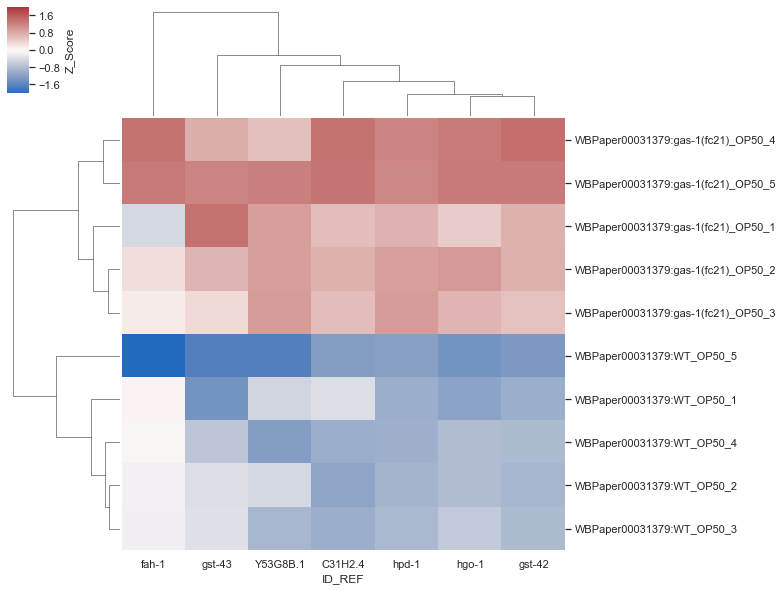

In [83]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_7')
paper_df=ExtractPaperHeatmap(df=Dataseta,gene=genes,paper='WBPaper00031379')

In [84]:
# genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_7')
# paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00041002')

In [85]:
# x

In [86]:
# DatasetWBPaper00045095=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/WBPaper00045095.ce.rs.csv",
#                                   sep='\t')

In [87]:
# DatasetWBPaper00045095.columns

In [88]:
# DatasetWBPaper00045095Expression=MetabolicExpression.loc[['RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469110',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469111',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469112',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469113',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469114',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469115',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469116',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469117',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469118',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469119',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469120',
#        'RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469121']]

In [89]:
# DatasetWBPaper00045095Expression=DatasetWBPaper00045095Expression[genes]

In [90]:
# DatasetWBPaper00045095Expression

In [91]:
# DatasetWBPaper00045095Expression.replace(np.nan,-2,inplace=True)

In [92]:
# sns.clustermap(DatasetWBPaper00045095Expression,mask=DatasetWBPaper00045095Expression==-2,vmin=-1,vmax=1,cmap='vlag')

In [93]:
# genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_7')
# paper_df=ExtractPaperHeatmap(df=DatasetWBPaper00045095Expression,gene=genes,paper='WBPaper00045095')

In [94]:
# genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_7')
# paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00041606')

In [95]:
# z=pd.read_csv("BestDatasets_Cluster_1_gm.csv",index_col=0)
# z=z.transpose()
# fig=plt.figure(figsize=(10,2))
# sns.heatmap(z,cmap='vlag',vmin=-1,vmax=1)
# # x=x.transpose
# plt.tight_layout()
# plt.savefig("Tyrosine_best_datasets.png",dpi=300)

In [96]:
# z=pd.read_csv("BestDatasets_Cluster_8_gm.csv",index_col=0)
# z=z.transpose()
# fig=plt.figure(figsize=(10,2))
# sns.heatmap(z,cmap='vlag',vmin=-1,vmax=1)
# # x=x.transpose
# plt.tight_layout()
# plt.savefig("Histidine_best_datasets.png",dpi=300)

In [97]:
# genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_8')
# paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00042258')

In [98]:
WBPaper00042258_z=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/z_normalized_WBPaper00042258_a.ce.mr.pcl",
                             sep='\t',index_col=0)

In [99]:
WBPaper00042258_z.drop(columns=['IDENTIFIER','GWEIGHT'],inplace=True)

In [100]:
WBPaper00042258_z=wb_to_gene(WBPaper00042258_z)

In [101]:
WBPaper00042258_z=WBPaper00042258_z.loc[genes]

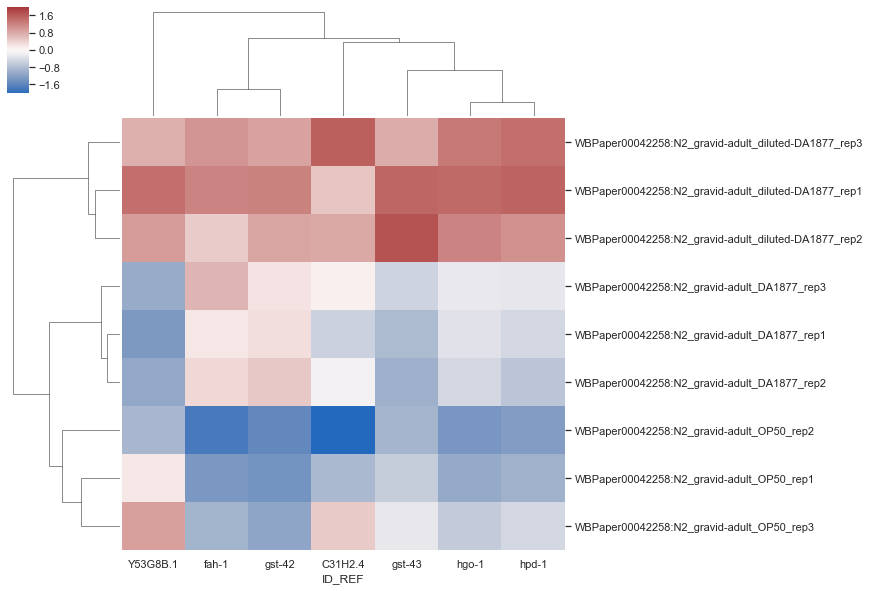

In [102]:
sns.clustermap(WBPaper00042258_z.transpose(),vmin=-2,vmax=2,cmap='vlag')
plt.savefig("His_WBPaper00042258.svg")

In [103]:
# MetabolicExpression.drop(index=['IDENTIFIER',"GWEIGHT"],inplace=True)

In [104]:
# MetabolicExpression.drop(columns=['PAPER'],inplace=True)

In [105]:
# WBPaper00048771_z=MetabolicExpression.loc[MetabolicExpression.index.str.startswith("WBPaper00048711")]

In [106]:
# WBPaper00048771_z=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/z_normalized_WBPaper00048771.ce.mr.pcl",
#                              index_col=0, sep='\t')

In [107]:
# WBPaper00048771_z.drop(columns=['IDENTIFIER','GWEIGHT'],inplace=True)

In [108]:
# WBPaper00048771_z=wb_to_gene(WBPaper00048771_z)

In [109]:
# WBPaper00048771_z.loc['amdh-1']

In [110]:
# sns.clustermap(WBPaper00048771_z.,cmap='vlag',vmin=-1,vmax=1)

In [111]:
# genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_8')
# paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00048771')

In [112]:
# genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_8')
# paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00041002')

In [113]:
# genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_8')
# paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00046497')

In [114]:
# WBPaper00046497_z=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/z_normalized_WBPaper00046497.ce.rs.pcl",
#                              index_col=0,sep='\t')

In [115]:
# WBPaper00046497_z.drop(columns=['IDENTIFIER','GWEIGHT'],inplace=True)

In [116]:
# WBPaper00046497_z=wb_to_gene(WBPaper00046497_z)

In [117]:

# WBPaper00046497_z.replace(np.nan,-5,inplace=True)

In [118]:
# propionate_shunt=['gta-1','alh-8','acdh-1','ech-6','hach-1','hphd-1']

In [119]:
# shunt=(WBPaper00046497_z.loc[propionate_shunt])

In [120]:
# sns.clustermap(shunt.transpose(),vmin=-3,vmax=3,cmap='vlag',mask=shunt.transpose()==-5)

In [121]:
# shunt_expression=MetabolicExpression[propionate_shunt]

In [122]:
# shunt_expression.min().min()

In [123]:
# shunt_expression.replace(np.nan,-14,inplace=True)
# sns.clustermap(shunt_expression,mask=shunt_expression==-14,cmap='vlag',vmin=-3,vmax=4)

In [124]:
# genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_8')
# paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=propionate_shunt,paper='WBPaper00041190')

In [125]:
# Pathway_mean_df

In [126]:
# Pathway_GM_df

In [127]:
from scipy.stats import zscore
zetascore_table=zscore(Pathway_mean_df,axis=0)

In [128]:
zetascore_table

array([[-5.86031243, -4.96772775, -4.89393762, ..., -0.46227382,
        -3.94422462, -4.52997307],
       [-1.25612586, -0.18511354,  1.16757559, ...,  2.60201724,
         0.71796939,  1.28518527],
       [ 0.93651571,  2.60062789,  0.33431388, ..., -0.46227382,
        -1.43567591,  0.3982718 ],
       ...,
       [ 0.26718545,  0.37942114, -0.10482926, ..., -0.46227382,
         1.16377455, -0.47336276],
       [ 0.73153643, -0.01390751, -0.56339263, ...,  3.02091596,
         0.38487124, -0.58882682],
       [ 1.800187  ,  1.97426044,  0.17459741, ...,  1.53649147,
        -0.46699202,  1.57227925]])

In [129]:
zetascore_table=pd.DataFrame(zetascore_table)

In [130]:
zetascore_table.index=Pathway_mean_df.index
zetascore_table.columns=Pathway_mean_df.columns

In [131]:
zetascore_table.min().min()

-8.988677696274658

In [132]:
zetascore_table.replace(np.nan,-9,inplace=True)

In [133]:
zetascore_table.loc[:,zetascore_table.columns.str.startswith("Unnamed")].columns

Index([], dtype='object')

In [134]:
# zetascore_table.drop(columns=['Unnamed: 3_x'],inplace=True)

In [226]:
zetascore_table.to_csv("Pathway_mean_zscores.csv")

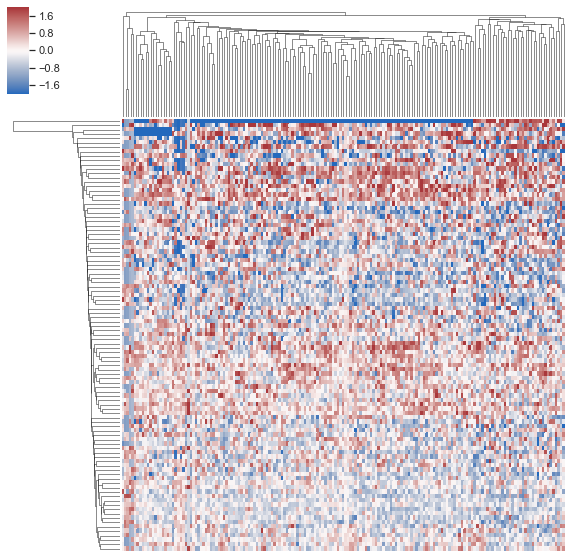

In [135]:
sns.clustermap(zetascore_table,vmin=-2,vmax=2,cmap='vlag',mask=zetascore_table==-9,
               yticklabels=False,xticklabels=False)
# sns.clustermap(Pathway_mean_df,vmin=-1,vmax=1,mask=Pathway_mean_df==-1.05,cmap='vlag',figsize=(40, 28),
#                yticklabels=True,xticklabels=True)
plt.savefig("Pathway_mean_df_zscore.png",dpi=300)
plt.savefig("Pathway_mean_df_zscore.svg",dpi=300)

In [136]:
# ech_6=AllExpression.loc['WBGene00001155'].sort_values(ascending=False)[0:680]

In [137]:
# ech_6=pd.DataFrame(ech_6)

In [138]:
# ech_6.replace(np.nan,-9,inplace=True)

In [139]:
# plt.figure(figsize=(2,30))
# sns.heatmap(ech_6,mask=ech_6==-9,cmap='vlag',vmin=-2,vmax=2)

In [140]:
def FindBestDatasets(Pathway_df,par):
    for pathway in Pathway_df.columns:
        x=Pathway_df[pathway]
        x=pd.DataFrame(x)
#         print(x)
        x.sort_values(by=pathway,ascending=False,inplace=True)
        BestDatasets_25=x[0:30]
        print(BestDatasets_25)
        BestDatasets_25=pd.DataFrame(BestDatasets_25)
        print(BestDatasets_25)
        BestDatasets_25.to_csv("BestDatasets_{}_{}.csv".format(pathway,par))
        RepressingDatasets_25=x[-30:-1]
        print(RepressingDatasets_25)
        RepressingDatasets_25=pd.DataFrame(RepressingDatasets_25)
        print(RepressingDatasets_25)
        RepressingDatasets_25.to_csv("RepressingDatasets_{}_{}.csv".format(pathway,par))
        

In [141]:
FindBestDatasets(Pathway_df=zetascore_table.transpose(),par='Z_score_of_mean')

                         Cluster_1
WBPaper00046121.ce.rs     3.587894
WBPaper00048657.ce.mr     3.068553
WBPaper00030811.ce.mr     2.758776
WBPaper00049336_b.ce.mr   2.308447
WBPaper00053427.ce.mr     2.266013
WBPaper00044037.ce.rs     2.231498
WBPaper00033206.ce.mr     2.163539
WBPaper00041549.ce.rs     2.104186
WBPaper00041010.ce.rs     2.019397
WBPaper00049336_a.ce.mr   2.006467
WBPaper00050096.ce.mr     1.995480
WBPaper00042361.ce.rs     1.918011
WBPaper00040426.ce.mr     1.904249
WBPaper00005859.ce.mr     1.890370
WBPaper00044030.ce.mr     1.840671
WBPaper00051555.ce.mr     1.827939
WBPaper00040379.ce.rs     1.825222
WBPaper00005376.ce.mr     1.797605
WBPaper00045618.ce.rs     1.763569
WBPaper00045521.ce.rs     1.718614
WBPaper00045095.ce.rs     1.702070
WBPaper00038226.ce.rs     1.677338
WBPaper00049736.ce.mr     1.656092
WBPaper00055386.ce.mr     1.616732
WBPaper00037953.ce.rs     1.586215
WBPaper00049380.ce.mr     1.554025
WBPaper00055899.ce.mr     1.542016
WBPaper00045861.ce.m

WBPaper00046858.ce.mr    -1.847858
                         Cluster_3
WBPaper00033070.ce.mr     3.079605
WBPaper00027104.ce.mr     2.770034
WBPaper00027339.ce.mr     2.600628
WBPaper00049336_b.ce.mr   2.598661
WBPaper00005976.ce.mr     2.429816
WBPaper00053550_b.ce.mr   2.085225
WBPaper00030985.ce.mr     2.020228
WBPaper00026830.ce.mr     1.963907
WBPaper00044545.ce.mr     1.934355
WBPaper00040730.ce.mr     1.896154
WBPaper00053550_a.ce.mr   1.850853
WBPaper00044760.ce.rs     1.840764
WBPaper00038427_b.ce.mr   1.801418
WBPaper00051555.ce.mr     1.799754
WBPaper00028482.ce.mr     1.761960
WBPaper00048530.ce.mr     1.736888
WBPaper00027111.ce.mr     1.728516
WBPaper00025099.ce.mr     1.726040
WBPaper00045095.ce.rs     1.674202
WBPaper00041906.ce.mr     1.663647
WBPaper00030839_b.ce.mr   1.632475
WBPaper00035891.ce.mr     1.627874
WBPaper00045263.ce.mr     1.594094
WBPaper00031252.ce.mr     1.593623
WBPaper00040379.ce.rs     1.589663
WBPaper00034757.ce.mr     1.573547
WBPaper00032022_a.ce

WBPaper00041163.ce.mr    -3.427613
                         Cluster_5
WBPaper00013462.ce.mr     2.178161
WBPaper00040730.ce.mr     1.449883
WBPaper00033101.ce.mr     1.441734
WBPaper00032948.ce.mr     1.287787
WBPaper00051555.ce.mr     1.230363
WBPaper00031379_a.ce.mr   1.228106
WBPaper00027104.ce.mr     1.219825
WBPaper00004349.ce.mr     1.177924
WBPaper00038519.ce.mr     1.149621
WBPaper00032022_a.ce.mr   1.148887
WBPaper00044939.ce.mr     1.148210
WBPaper00044760.ce.rs     1.147426
WBPaper00041906.ce.mr     1.137741
WBPaper00037953.ce.rs     1.129558
WBPaper00033099.ce.mr     1.123998
WBPaper00049364_a.ce.mr   1.109939
WBPaper00031379_b.ce.mr   1.103468
WBPaper00034636_b.ce.mr   1.064893
WBPaper00035873.ce.mr     1.038412
WBPaper00036383.ce.mr     1.026865
WBPaper00042340.ce.mr     1.000142
WBPaper00040985.ce.mr     0.983761
WBPaper00045934.ce.rs     0.981911
WBPaper00030985.ce.mr     0.980729
WBPaper00044037.ce.rs     0.973265
WBPaper00035429_a.ce.mr   0.968393
WBPaper00034636_a.ce

WBPaper00045918.ce.mr    -1.250364
                         Cluster_7
WBPaper00040210.ce.mr     1.625711
WBPaper00031379_a.ce.mr   1.563940
WBPaper00024671.ce.mr     1.512088
WBPaper00037113.ce.mr     1.432757
WBPaper00041370.ce.mr     1.418895
WBPaper00035891.ce.mr     1.390003
WBPaper00045095.ce.rs     1.308987
WBPaper00045960.ce.mr     1.287764
WBPaper00042234.ce.mr     1.218447
WBPaper00053833.ce.mr     1.202382
WBPaper00040730.ce.mr     1.181977
WBPaper00044030.ce.mr     1.148613
WBPaper00036286.ce.mr     1.122395
WBPaper00025032.ce.mr     1.091529
WBPaper00035197.ce.mr     1.084284
WBPaper00049364_a.ce.mr   1.076141
WBPaper00035187.ce.mr     1.065812
WBPaper00045263.ce.mr     1.046502
WBPaper00029087.ce.mr     1.030584
WBPaper00046121.ce.rs     1.021769
WBPaper00039866.ce.mr     1.014822
WBPaper00004349.ce.mr     1.006048
WBPaper00042258_a.ce.mr   0.988738
WBPaper00035429_b.ce.mr   0.984586
WBPaper00040808.ce.mr     0.981470
WBPaper00046523.ce.mr     0.918638
WBPaper00040327.ce.m

WBPaper00028482.ce.mr    -1.428614
                         Cluster_9
WBPaper00055386.ce.mr     2.060275
WBPaper00041688.ce.mr     1.999606
WBPaper00031379_b.ce.mr   1.943458
WBPaper00038427_b.ce.mr   1.891409
WBPaper00044091.ce.mr     1.861292
WBPaper00040426.ce.mr     1.760849
WBPaper00042258_b.ce.mr   1.738299
WBPaper00042234.ce.mr     1.719518
WBPaper00045960.ce.mr     1.698169
WBPaper00046083.ce.mr     1.680817
WBPaper00024278.ce.mr     1.631191
WBPaper00049336_a.ce.mr   1.608512
WBPaper00048490.ce.mr     1.594686
WBPaper00006365.ce.mr     1.590765
WBPaper00049364_a.ce.mr   1.582923
WBPaper00035873.ce.mr     1.567761
WBPaper00044939.ce.mr     1.546866
WBPaper00026929.ce.mr     1.535186
WBPaper00045802.ce.mr     1.511152
WBPaper00005859.ce.mr     1.510263
WBPaper00042340.ce.mr     1.508223
WBPaper00045918.ce.mr     1.483652
WBPaper00038427_a.ce.mr   1.470281
WBPaper00024654.ce.mr     1.450897
WBPaper00035429_a.ce.mr   1.446514
WBPaper00041163.ce.mr     1.437094
WBPaper00050488.ce.m

WBPaper00036123.ce.mr     -3.087020
                         Cluster_11
WBPaper00039866.ce.mr      2.471432
WBPaper00030811.ce.mr      2.054736
WBPaper00036090_a.ce.mr    2.009507
WBPaper00034739.ce.mr      1.999942
WBPaper00041939.ce.mr      1.910003
WBPaper00035504.ce.mr      1.908724
WBPaper00051555.ce.mr      1.848141
WBPaper00035429_b.ce.mr    1.817812
WBPaper00047070_1.ce.mr    1.783252
WBPaper00047070_2.ce.mr    1.758253
WBPaper00050903.ce.mr      1.681191
WBPaper00033099.ce.mr      1.676122
WBPaper00044037.ce.rs      1.627449
WBPaper00045918.ce.mr      1.485466
WBPaper00048657.ce.mr      1.475040
WBPaper00038519.ce.mr      1.417074
WBPaper00045618.ce.rs      1.402108
WBPaper00032425.ce.mr      1.382171
WBPaper00053481.ce.mr      1.350231
WBPaper00050488.ce.mr      1.323872
WBPaper00032022_b.ce.mr    1.274725
WBPaper00029190.ce.mr      1.266090
WBPaper00037953.ce.rs      1.259818
WBPaper00026950.ce.mr      1.249364
WBPaper00050407.ce.mr      1.248379
WBPaper00037113.ce.mr      1

WBPaper00055899.ce.mr     -1.320588
                         Cluster_13
WBPaper00049380.ce.mr      2.967013
WBPaper00045861.ce.mr      2.951388
WBPaper00046497.ce.rs      2.173576
WBPaper00045263.ce.mr      2.101039
WBPaper00049336_a.ce.mr    2.081369
WBPaper00040730.ce.mr      2.061080
WBPaper00044030.ce.mr      2.058233
WBPaper00044037.ce.rs      2.052723
WBPaper00044939.ce.mr      2.000766
WBPaper00041370.ce.mr      1.958739
WBPaper00045960.ce.mr      1.945527
WBPaper00038172.ce.mr      1.910107
WBPaper00039866.ce.mr      1.819443
WBPaper00038519.ce.mr      1.774670
WBPaper00046212.ce.mr      1.724492
WBPaper00055899.ce.mr      1.723158
WBPaper00049364_b.ce.mr    1.671194
WBPaper00037680.ce.mr      1.654479
WBPaper00032031.ce.mr      1.645565
WBPaper00042340.ce.mr      1.634089
WBPaper00027758.ce.mr      1.619874
WBPaper00048490.ce.mr      1.619845
WBPaper00046853.ce.mr      1.590442
WBPaper00029190.ce.mr      1.570243
WBPaper00046083.ce.mr      1.543128
WBPaper00045521.ce.rs      1

WBPaper00038519.ce.mr     -2.348386
                         Cluster_15
WBPaper00013462.ce.mr      1.895475
WBPaper00039835.ce.mr      1.850518
WBPaper00034636_b.ce.mr    1.641075
WBPaper00031379_a.ce.mr    1.602285
WBPaper00047070_1.ce.mr    1.588397
WBPaper00045802.ce.mr      1.584296
WBPaper00053236.ce.mr      1.517963
WBPaper00047070_2.ce.mr    1.362004
WBPaper00031252.ce.mr      1.252982
WBPaper00042234.ce.mr      1.148736
WBPaper00040808.ce.mr      1.125057
WBPaper00038519.ce.mr      1.118445
WBPaper00028482.ce.mr      1.072542
WBPaper00050488.ce.mr      1.047618
WBPaper00030811.ce.mr      1.032791
WBPaper00029087.ce.mr      1.030069
WBPaper00024654.ce.mr      0.985617
WBPaper00041163.ce.mr      0.935709
WBPaper00005767.ce.mr      0.931942
WBPaper00046102.ce.mr      0.925113
WBPaper00041174.ce.mr      0.917692
WBPaper00005376.ce.mr      0.916470
WBPaper00045263.ce.mr      0.914019
WBPaper00027104.ce.mr      0.907270
WBPaper00038172.ce.mr      0.869455
WBPaper00044037.ce.rs      0

WBPaper00041688.ce.mr     -0.696215
                         Cluster_17
WBPaper00031525.ce.mr      4.105380
WBPaper00046212.ce.mr      3.374728
WBPaper00032430.ce.mr      2.866626
WBPaper00032165.ce.mr      2.784403
WBPaper00049364_a.ce.mr    2.634854
WBPaper00041960.ce.mr      2.600533
WBPaper00051448.ce.mr      2.562859
WBPaper00041174.ce.mr      2.521169
WBPaper00032425.ce.mr      2.493263
WBPaper00050096.ce.mr      2.379446
WBPaper00040410.ce.mr      2.299353
WBPaper00037147.ce.mr      2.219780
WBPaper00044638.ce.mr      2.198193
WBPaper00041190.ce.mr      2.169726
WBPaper00025032.ce.mr      2.152890
WBPaper00048989.ce.mr      2.132987
WBPaper00038168.ce.mr      2.130550
WBPaper00040327.ce.mr      2.114902
WBPaper00032948.ce.mr      2.077860
WBPaper00046121.ce.rs      2.054423
WBPaper00050903.ce.mr      2.040690
WBPaper00032976.ce.mr      2.004014
WBPaper00035973.ce.mr      1.964883
WBPaper00039792.ce.mr      1.930058
WBPaper00040858.ce.mr      1.925727
WBPaper00055386.ce.mr      1

WBPaper00046212.ce.mr     -4.406172
                         Cluster_19
WBPaper00032165.ce.mr      2.421941
WBPaper00025032.ce.mr      1.706090
WBPaper00035187.ce.mr      1.686229
WBPaper00038427_b.ce.mr    1.520932
WBPaper00035429_b.ce.mr    1.507852
WBPaper00050488.ce.mr      1.488968
WBPaper00031379_b.ce.mr    1.463637
WBPaper00024278.ce.mr      1.452906
WBPaper00024654.ce.mr      1.444648
WBPaper00037682.ce.mr      1.441847
WBPaper00040210.ce.mr      1.427984
WBPaper00041960.ce.mr      1.421541
WBPaper00033206.ce.mr      1.367095
WBPaper00038427_a.ce.mr    1.356638
WBPaper00026950.ce.mr      1.292535
WBPaper00045918.ce.mr      1.275207
WBPaper00005767.ce.mr      1.213251
WBPaper00041549.ce.rs      1.205743
WBPaper00053505.ce.mr      1.195854
WBPaper00028962.ce.mr      1.157960
WBPaper00032031.ce.mr      1.099569
WBPaper00055899.ce.mr      1.066954
WBPaper00051223.ce.mr      1.049654
WBPaper00028789.ce.mr      1.036953
WBPaper00032976.ce.mr      1.022051
WBPaper00049311.ce.mr      0

WBPaper00045095.ce.rs     -0.966580
                         Cluster_21
WBPaper00044545.ce.mr      2.124581
WBPaper00042234.ce.mr      2.063521
WBPaper00048989.ce.mr      1.941567
WBPaper00045521.ce.rs      1.913176
WBPaper00045861.ce.mr      1.909916
WBPaper00042340.ce.mr      1.896605
WBPaper00032165.ce.mr      1.837042
WBPaper00035429_b.ce.mr    1.829045
WBPaper00053550_b.ce.mr    1.804285
WBPaper00046497.ce.rs      1.780232
WBPaper00040327.ce.mr      1.776327
WBPaper00045263.ce.mr      1.757173
WBPaper00042258_b.ce.mr    1.695636
WBPaper00035873.ce.mr      1.650148
WBPaper00044037.ce.rs      1.624523
WBPaper00045960.ce.mr      1.620137
WBPaper00053481.ce.mr      1.617670
WBPaper00036286.ce.mr      1.575698
WBPaper00046083.ce.mr      1.567378
WBPaper00041960.ce.mr      1.566087
WBPaper00032430.ce.mr      1.535398
WBPaper00037680.ce.mr      1.529471
WBPaper00050448.ce.mr      1.504193
WBPaper00036090_b.ce.mr    1.487937
WBPaper00042574.ce.mr      1.472858
WBPaper00050488.ce.mr      1

WBPaper00045095.ce.rs     -1.905225
                         Cluster_23
WBPaper00040379.ce.rs      2.147621
WBPaper00040327.ce.mr      2.015422
WBPaper00037695.ce.mr      1.928737
WBPaper00041549.ce.rs      1.921963
WBPaper00044037.ce.rs      1.850805
WBPaper00024654.ce.mr      1.691034
WBPaper00027758.ce.mr      1.650130
WBPaper00033206.ce.mr      1.586236
WBPaper00029087.ce.mr      1.336678
WBPaper00032976.ce.mr      1.178148
WBPaper00050488.ce.mr      1.166694
WBPaper00040420.ce.mr      1.130768
WBPaper00046121.ce.rs      1.076056
WBPaper00047070_1.ce.mr    1.043613
WBPaper00049364.ce.mr      0.985357
WBPaper00042361.ce.rs      0.976371
WBPaper00053481.ce.mr      0.937818
WBPaper00034757.ce.mr      0.906131
WBPaper00046497.ce.rs      0.841694
WBPaper00046523.ce.mr      0.838770
WBPaper00044760.ce.rs      0.800715
WBPaper00028788.ce.mr      0.757655
WBPaper00030839_a.ce.mr    0.661582
WBPaper00028482.ce.mr      0.658730
WBPaper00026820.ce.mr      0.651700
WBPaper00035429_b.ce.mr    0

WBPaper00050488.ce.mr     -1.290552
                         Cluster_25
WBPaper00035429_b.ce.mr    1.541151
WBPaper00040379.ce.rs      1.276312
WBPaper00032022_b.ce.mr    1.172133
WBPaper00055386.ce.mr      1.131098
WBPaper00044638.ce.mr      1.054290
WBPaper00029190.ce.mr      1.052417
WBPaper00039835.ce.mr      1.032930
WBPaper00051555.ce.mr      1.014284
WBPaper00035504.ce.mr      0.986953
WBPaper00037113.ce.mr      0.946886
WBPaper00037147.ce.mr      0.904161
WBPaper00045095.ce.rs      0.838828
WBPaper00035197.ce.mr      0.829695
WBPaper00026950.ce.mr      0.828383
WBPaper00050448.ce.mr      0.804777
WBPaper00040410.ce.mr      0.800146
WBPaper00051223.ce.mr      0.799104
WBPaper00045359.ce.rs      0.787427
WBPaper00033444.ce.mr      0.785807
WBPaper00048771.ce.mr      0.781419
WBPaper00026830.ce.mr      0.738524
WBPaper00038168.ce.mr      0.715572
WBPaper00031252.ce.mr      0.711716
WBPaper00044426.ce.rs      0.708968
WBPaper00029087.ce.mr      0.703913
WBPaper00027758.ce.mr      0

WBPaper00041002.ce.mr     -1.610997
                         Cluster_27
WBPaper00049311.ce.mr      2.483828
WBPaper00047070_1.ce.mr    1.932580
WBPaper00026830.ce.mr      1.919083
WBPaper00031525.ce.mr      1.860620
WBPaper00042234.ce.mr      1.839617
WBPaper00049380.ce.mr      1.794289
WBPaper00041163.ce.mr      1.771029
WBPaper00049336_a.ce.mr    1.755210
WBPaper00005859.ce.mr      1.717896
WBPaper00051448.ce.mr      1.717634
WBPaper00033101.ce.mr      1.681403
WBPaper00032948.ce.mr      1.672645
WBPaper00040858.ce.mr      1.634255
WBPaper00045521.ce.rs      1.625504
WBPaper00040426.ce.mr      1.603203
WBPaper00044535.ce.mr      1.542994
WBPaper00039792.ce.mr      1.465394
WBPaper00042258_b.ce.mr    1.422806
WBPaper00048490.ce.mr      1.415768
WBPaper00037953.ce.rs      1.405089
WBPaper00037113.ce.mr      1.389194
WBPaper00029190.ce.mr      1.357307
WBPaper00044030.ce.mr      1.301743
WBPaper00045861.ce.mr      1.290152
WBPaper00042361.ce.rs      1.210831
WBPaper00004349.ce.mr      1

WBPaper00050903.ce.mr     -1.003480
                         Cluster_29
WBPaper00049336_a.ce.mr    2.267570
WBPaper00041939.ce.mr      2.248022
WBPaper00049736.ce.mr      1.971480
WBPaper00047070_1.ce.mr    1.958259
WBPaper00044030.ce.mr      1.864842
WBPaper00047070_2.ce.mr    1.816732
WBPaper00053236.ce.mr      1.658881
WBPaper00027111.ce.mr      1.622189
WBPaper00038168.ce.mr      1.470381
WBPaper00040426.ce.mr      1.464431
WBPaper00044760.ce.rs      1.447751
WBPaper00041549.ce.rs      1.418471
WBPaper00046083.ce.mr      1.403767
WBPaper00048490.ce.mr      1.270160
WBPaper00048657.ce.mr      1.267033
WBPaper00028788.ce.mr      1.261830
WBPaper00032425.ce.mr      1.199419
WBPaper00036090_a.ce.mr    1.178527
WBPaper00046102.ce.mr      1.174914
WBPaper00033099.ce.mr      1.173604
WBPaper00034636_a.ce.mr    1.152139
WBPaper00041370.ce.mr      1.128396
WBPaper00038226.ce.rs      1.125248
WBPaper00045960.ce.mr      1.120139
WBPaper00038172.ce.mr      1.113449
WBPaper00036383.ce.mr      1

WBPaper00035891.ce.mr     -1.209600
                         Cluster_31
WBPaper00045521.ce.rs      1.745634
WBPaper00005859.ce.mr      1.676645
WBPaper00027758.ce.mr      1.672116
WBPaper00034636_b.ce.mr    1.601317
WBPaper00040808.ce.mr      1.456029
WBPaper00030985.ce.mr      1.376910
WBPaper00046102.ce.mr      1.348319
WBPaper00041163.ce.mr      1.328231
WBPaper00042574.ce.mr      1.301786
WBPaper00006365.ce.mr      1.276031
WBPaper00053550_b.ce.mr    1.270512
WBPaper00005376.ce.mr      1.253513
WBPaper00035873.ce.mr      1.229644
WBPaper00030839_a.ce.mr    1.225625
WBPaper00024671.ce.mr      1.224662
WBPaper00034636_a.ce.mr    1.220086
WBPaper00035429_a.ce.mr    1.196259
WBPaper00049364_b.ce.mr    1.191148
WBPaper00048771.ce.mr      1.173220
WBPaper00046083.ce.mr      1.120331
WBPaper00005767.ce.mr      1.111852
WBPaper00042258_a.ce.mr    1.098457
WBPaper00033206.ce.mr      1.094718
WBPaper00038519.ce.mr      1.087431
WBPaper00050903.ce.mr      1.078689
WBPaper00040379.ce.rs      1

WBPaper00030811.ce.mr     -2.127968
                         Cluster_33
WBPaper00046121.ce.rs      2.491102
WBPaper00040210.ce.mr      2.368010
WBPaper00040858.ce.mr      2.212490
WBPaper00053427.ce.mr      2.106689
WBPaper00032165.ce.mr      2.060771
WBPaper00037953.ce.rs      1.881185
WBPaper00041190.ce.mr      1.870484
WBPaper00035084.ce.mr      1.857501
WBPaper00042361.ce.rs      1.838704
WBPaper00033099.ce.mr      1.831929
WBPaper00044037.ce.rs      1.733681
WBPaper00024671.ce.mr      1.720748
WBPaper00035504.ce.mr      1.704133
WBPaper00053550_a.ce.mr    1.664955
WBPaper00035187.ce.mr      1.642747
WBPaper00006365.ce.mr      1.618420
WBPaper00042574.ce.mr      1.575040
WBPaper00039835.ce.mr      1.505131
WBPaper00036286.ce.mr      1.401885
WBPaper00049736.ce.mr      1.395587
WBPaper00051223.ce.mr      1.225847
WBPaper00050488.ce.mr      1.216344
WBPaper00034636_a.ce.mr    1.208453
WBPaper00035479.ce.mr      1.166724
WBPaper00005767.ce.mr      1.129952
WBPaper00037682.ce.mr      1

WBPaper00034739.ce.mr     -3.186029
                         Cluster_35
WBPaper00049380.ce.mr      2.098684
WBPaper00048657.ce.mr      1.919610
WBPaper00034757.ce.mr      1.885805
WBPaper00025099.ce.mr      1.820594
WBPaper00037953.ce.rs      1.795542
WBPaper00053236.ce.mr      1.793242
WBPaper00032276.ce.mr      1.791644
WBPaper00028482.ce.mr      1.768715
WBPaper00045934.ce.rs      1.725033
WBPaper00038427_b.ce.mr    1.661410
WBPaper00045095.ce.rs      1.622339
WBPaper00005976.ce.mr      1.566256
WBPaper00050096.ce.mr      1.534355
WBPaper00038427_a.ce.mr    1.530741
WBPaper00027339.ce.mr      1.454021
WBPaper00032430.ce.mr      1.453282
WBPaper00037682.ce.mr      1.444377
WBPaper00034636_a.ce.mr    1.421786
WBPaper00024278.ce.mr      1.396875
WBPaper00040210.ce.mr      1.364782
WBPaper00042258_a.ce.mr    1.361599
WBPaper00026929.ce.mr      1.322301
WBPaper00045802.ce.mr      1.274828
WBPaper00037113.ce.mr      1.273733
WBPaper00050407.ce.mr      1.216263
WBPaper00048490.ce.mr      1

WBPaper00045934.ce.rs     -1.802223
                         Cluster_37
WBPaper00044638.ce.mr      1.405299
WBPaper00046523.ce.mr      1.392938
WBPaper00031003.ce.mr      1.238874
WBPaper00035429_b.ce.mr    1.225816
WBPaper00031252.ce.mr      1.048121
WBPaper00030811.ce.mr      0.989949
WBPaper00048771.ce.mr      0.925715
WBPaper00053833.ce.mr      0.911903
WBPaper00050488.ce.mr      0.858467
WBPaper00049736.ce.mr      0.856923
WBPaper00055386.ce.mr      0.799679
WBPaper00041939.ce.mr      0.785362
WBPaper00024671.ce.mr      0.683896
WBPaper00045095.ce.rs      0.670715
WBPaper00035973.ce.mr      0.625999
WBPaper00051223.ce.mr      0.572065
WBPaper00046083.ce.mr      0.556553
WBPaper00032031.ce.mr      0.551633
WBPaper00045618.ce.rs      0.542740
WBPaper00037953.ce.rs      0.485084
WBPaper00044939.ce.mr      0.472489
WBPaper00042361.ce.rs      0.462981
WBPaper00028788.ce.mr      0.455399
WBPaper00040210.ce.mr      0.446907
WBPaper00037147.ce.mr      0.446247
WBPaper00028962.ce.mr      0

WBPaper00035197.ce.mr     -2.026291
                         Cluster_39
WBPaper00024671.ce.mr      1.917670
WBPaper00040426.ce.mr      1.761585
WBPaper00045521.ce.rs      1.610709
WBPaper00048989.ce.mr      1.536999
WBPaper00027339.ce.mr      1.527169
WBPaper00040410.ce.mr      1.414893
WBPaper00041906.ce.mr      1.413953
WBPaper00034636_b.ce.mr    1.305794
WBPaper00028482.ce.mr      1.282877
WBPaper00040808.ce.mr      1.281991
WBPaper00027758.ce.mr      1.278806
WBPaper00027111.ce.mr      1.259476
WBPaper00053550_b.ce.mr    1.214245
WBPaper00031379_b.ce.mr    1.209782
WBPaper00026929.ce.mr      1.208879
WBPaper00044091.ce.mr      1.190359
WBPaper00044939.ce.mr      1.188460
WBPaper00050448.ce.mr      1.159525
WBPaper00032276.ce.mr      1.128300
WBPaper00032022_a.ce.mr    1.083967
WBPaper00046858.ce.mr      1.020980
WBPaper00048490.ce.mr      1.009102
WBPaper00036090_b.ce.mr    1.005537
WBPaper00035197.ce.mr      0.993518
WBPaper00046102.ce.mr      0.945667
WBPaper00041606.ce.mr      0

WBPaper00029190.ce.mr     -2.580212
                         Cluster_41
WBPaper00046497.ce.rs      1.873970
WBPaper00045618.ce.rs      1.748573
WBPaper00045918.ce.mr      1.481515
WBPaper00041906.ce.mr      1.409933
WBPaper00035084.ce.mr      1.353129
WBPaper00044760.ce.rs      1.320936
WBPaper00045263.ce.mr      1.233531
WBPaper00046523.ce.mr      1.212902
WBPaper00053481.ce.mr      1.211981
WBPaper00042258_a.ce.mr    1.119068
WBPaper00033444.ce.mr      1.108230
WBPaper00038427_a.ce.mr    0.975627
WBPaper00044638.ce.mr      0.922784
WBPaper00040985.ce.mr      0.911416
WBPaper00053833.ce.mr      0.905442
WBPaper00044939.ce.mr      0.900891
WBPaper00024278.ce.mr      0.879670
WBPaper00045960.ce.mr      0.871194
WBPaper00024654.ce.mr      0.867731
WBPaper00045934.ce.rs      0.867236
WBPaper00050488.ce.mr      0.850594
WBPaper00040858.ce.mr      0.846718
WBPaper00040410.ce.mr      0.791344
WBPaper00028788.ce.mr      0.784175
WBPaper00039866.ce.mr      0.721388
WBPaper00036286.ce.mr      0

WBPaper00035891.ce.mr     -1.222920
                         Cluster_43
WBPaper00037147.ce.mr      2.397364
WBPaper00032425.ce.mr      2.202354
WBPaper00049364_a.ce.mr    2.168562
WBPaper00041010.ce.rs      2.162340
WBPaper00053236.ce.mr      2.086361
WBPaper00039835.ce.mr      2.072239
WBPaper00041939.ce.mr      2.017951
WBPaper00037113.ce.mr      2.015027
WBPaper00032948.ce.mr      1.783841
WBPaper00034739.ce.mr      1.756240
WBPaper00041174.ce.mr      1.732804
WBPaper00050407.ce.mr      1.703464
WBPaper00038427_b.ce.mr    1.685219
WBPaper00046523.ce.mr      1.654398
WBPaper00030839_a.ce.mr    1.643797
WBPaper00024278.ce.mr      1.633646
WBPaper00047070_2.ce.mr    1.631156
WBPaper00034636_a.ce.mr    1.616464
WBPaper00042340.ce.mr      1.604017
WBPaper00031252.ce.mr      1.597595
WBPaper00045934.ce.rs      1.584067
WBPaper00040426.ce.mr      1.550893
WBPaper00040327.ce.mr      1.517679
WBPaper00046212.ce.mr      1.504508
WBPaper00055386.ce.mr      1.504295
WBPaper00031379_a.ce.mr    1

WBPaper00053427.ce.mr     -1.680721
                         Cluster_45
WBPaper00030839_a.ce.mr    2.407929
WBPaper00032948.ce.mr      2.022250
WBPaper00030839_b.ce.mr    1.945281
WBPaper00040379.ce.rs      1.799185
WBPaper00047070_2.ce.mr    1.786555
WBPaper00047070_1.ce.mr    1.760658
WBPaper00042574.ce.mr      1.723806
WBPaper00026950.ce.mr      1.716703
WBPaper00044030.ce.mr      1.686838
WBPaper00028788.ce.mr      1.682228
WBPaper00029190.ce.mr      1.656297
WBPaper00044760.ce.rs      1.617176
WBPaper00041939.ce.mr      1.534270
WBPaper00031252.ce.mr      1.518819
WBPaper00040426.ce.mr      1.517235
WBPaper00035429_b.ce.mr    1.464945
WBPaper00035973.ce.mr      1.434184
WBPaper00041010.ce.rs      1.420987
WBPaper00051223.ce.mr      1.339871
WBPaper00053833.ce.mr      1.259601
WBPaper00032022_b.ce.mr    1.258388
WBPaper00034739.ce.mr      1.225208
WBPaper00041361.ce.rs      1.200239
WBPaper00024654.ce.mr      1.196649
WBPaper00050488.ce.mr      1.156908
WBPaper00044638.ce.mr      1

WBPaper00036123.ce.mr     -3.087020
                         Cluster_47
WBPaper00045861.ce.mr      2.377618
WBPaper00033444.ce.mr      2.131886
WBPaper00048657.ce.mr      2.105520
WBPaper00030985.ce.mr      2.074306
WBPaper00041010.ce.rs      2.040698
WBPaper00045521.ce.rs      1.865693
WBPaper00041370.ce.mr      1.795274
WBPaper00042340.ce.mr      1.783775
WBPaper00033099.ce.mr      1.767795
WBPaper00042258_b.ce.mr    1.734096
WBPaper00055386.ce.mr      1.694235
WBPaper00031379_b.ce.mr    1.674752
WBPaper00049336_a.ce.mr    1.670138
WBPaper00045359.ce.rs      1.638216
WBPaper00048989.ce.mr      1.635342
WBPaper00042234.ce.mr      1.633828
WBPaper00035504.ce.mr      1.609633
WBPaper00031252.ce.mr      1.536073
WBPaper00045960.ce.mr      1.492803
WBPaper00038427_a.ce.mr    1.451043
WBPaper00037682.ce.mr      1.438728
WBPaper00049736.ce.mr      1.430966
WBPaper00037680.ce.mr      1.420414
WBPaper00048530.ce.mr      1.417435
WBPaper00048490.ce.mr      1.408983
WBPaper00049364_b.ce.mr    1

WBPaper00053481.ce.mr     -1.299626
                         Cluster_49
WBPaper00044638.ce.mr      1.824904
WBPaper00040379.ce.rs      1.816257
WBPaper00044426.ce.rs      1.795789
WBPaper00044037.ce.rs      1.676286
WBPaper00044939.ce.mr      1.640342
WBPaper00038427_a.ce.mr    1.563273
WBPaper00047070_1.ce.mr    1.524434
WBPaper00039866.ce.mr      1.508473
WBPaper00045359.ce.rs      1.493115
WBPaper00036090_a.ce.mr    1.491603
WBPaper00049380.ce.mr      1.467778
WBPaper00026950.ce.mr      1.466920
WBPaper00050488.ce.mr      1.460298
WBPaper00048989.ce.mr      1.365778
WBPaper00036090_b.ce.mr    1.335050
WBPaper00032425.ce.mr      1.313813
WBPaper00031379_b.ce.mr    1.305836
WBPaper00005767.ce.mr      1.276707
WBPaper00037953.ce.rs      1.197974
WBPaper00035973.ce.mr      1.182794
WBPaper00038226.ce.rs      1.178916
WBPaper00032031.ce.mr      1.177418
WBPaper00050903.ce.mr      1.172881
WBPaper00041190.ce.mr      1.139461
WBPaper00035504.ce.mr      1.136413
WBPaper00041939.ce.mr      1

WBPaper00040808.ce.mr     -0.850254
                         Cluster_51
WBPaper00035973.ce.mr      2.147854
WBPaper00039835.ce.mr      2.062786
WBPaper00040420.ce.mr      1.957411
WBPaper00050096.ce.mr      1.870693
WBPaper00049736.ce.mr      1.853201
WBPaper00030839_a.ce.mr    1.778853
WBPaper00045618.ce.rs      1.776644
WBPaper00044939.ce.mr      1.697226
WBPaper00026830.ce.mr      1.594109
WBPaper00030811.ce.mr      1.508012
WBPaper00040210.ce.mr      1.493732
WBPaper00042574.ce.mr      1.377359
WBPaper00037147.ce.mr      1.369475
WBPaper00045960.ce.mr      1.243783
WBPaper00049364_b.ce.mr    1.216385
WBPaper00050903.ce.mr      1.212523
WBPaper00044037.ce.rs      1.151989
WBPaper00045359.ce.rs      1.151029
WBPaper00032425.ce.mr      1.091445
WBPaper00032031.ce.mr      1.084028
WBPaper00048771.ce.mr      1.068606
WBPaper00046497.ce.rs      1.062692
WBPaper00045263.ce.mr      1.005945
WBPaper00026820.ce.mr      0.999691
WBPaper00029087.ce.mr      0.998332
WBPaper00034636_b.ce.mr    0

WBPaper00044760.ce.rs     -1.786997
                         Cluster_53
WBPaper00032031.ce.mr      2.613404
WBPaper00013462.ce.mr      2.103743
WBPaper00049336_b.ce.mr    1.789259
WBPaper00033101.ce.mr      1.629084
WBPaper00031662_a.ce.mr    1.606083
WBPaper00035479.ce.mr      1.468946
WBPaper00038519.ce.mr      1.415606
WBPaper00044638.ce.mr      1.397585
WBPaper00050488.ce.mr      1.357958
WBPaper00006365.ce.mr      1.305480
WBPaper00047070_1.ce.mr    1.175951
WBPaper00031252.ce.mr      1.138926
WBPaper00049736.ce.mr      1.120886
WBPaper00005976.ce.mr      1.109145
WBPaper00051223.ce.mr      1.084517
WBPaper00027104.ce.mr      1.036915
WBPaper00030839_a.ce.mr    1.027240
WBPaper00040426.ce.mr      1.025205
WBPaper00046212.ce.mr      0.949448
WBPaper00005767.ce.mr      0.922296
WBPaper00044037.ce.rs      0.912701
WBPaper00048771.ce.mr      0.875371
WBPaper00035429_b.ce.mr    0.868914
WBPaper00049311.ce.mr      0.813766
WBPaper00032976.ce.mr      0.813572
WBPaper00032425.ce.mr      0

WBPaper00035084.ce.mr     -1.396553
                         Cluster_55
WBPaper00030839_a.ce.mr    1.797241
WBPaper00031525.ce.mr      1.737310
WBPaper00041190.ce.mr      1.677580
WBPaper00035973.ce.mr      1.633808
WBPaper00041906.ce.mr      1.582724
WBPaper00044426.ce.rs      1.466350
WBPaper00030839_b.ce.mr    1.402865
WBPaper00035187.ce.mr      1.349555
WBPaper00045359.ce.rs      1.329441
WBPaper00025032.ce.mr      1.316569
WBPaper00036286.ce.mr      1.315554
WBPaper00031379_a.ce.mr    1.235980
WBPaper00035197.ce.mr      1.196831
WBPaper00049364_b.ce.mr    1.195514
WBPaper00031252.ce.mr      1.193294
WBPaper00055899.ce.mr      1.186826
WBPaper00005767.ce.mr      1.178115
WBPaper00024671.ce.mr      1.155885
WBPaper00046858.ce.mr      1.147346
WBPaper00034636_b.ce.mr    1.083017
WBPaper00045918.ce.mr      1.045021
WBPaper00046121.ce.rs      1.026264
WBPaper00036383.ce.mr      1.003660
WBPaper00049364_a.ce.mr    0.970178
WBPaper00041361.ce.rs      0.963114
WBPaper00040420.ce.mr      0

WBPaper00041688.ce.mr     -2.500276
                         Cluster_57
WBPaper00040426.ce.mr      1.562469
WBPaper00041939.ce.mr      1.414134
WBPaper00053833.ce.mr      1.350456
WBPaper00045359.ce.rs      1.288245
WBPaper00041010.ce.rs      1.283454
WBPaper00040858.ce.mr      1.244315
WBPaper00045521.ce.rs      1.178750
WBPaper00051223.ce.mr      1.105390
WBPaper00024671.ce.mr      0.987450
WBPaper00041361.ce.rs      0.983620
WBPaper00032430.ce.mr      0.961762
WBPaper00037695.ce.mr      0.907320
WBPaper00027339.ce.mr      0.878761
WBPaper00030985.ce.mr      0.860444
WBPaper00050448.ce.mr      0.772696
WBPaper00036090_b.ce.mr    0.766882
WBPaper00041002.ce.mr      0.759783
WBPaper00035479.ce.mr      0.746840
WBPaper00032165.ce.mr      0.745497
WBPaper00032022_a.ce.mr    0.656329
WBPaper00046523.ce.mr      0.648474
WBPaper00045934.ce.rs      0.644799
WBPaper00048989.ce.mr      0.583290
WBPaper00046853.ce.mr      0.552714
WBPaper00044535.ce.mr      0.514168
WBPaper00038168.ce.mr      0

WBPaper00045521.ce.rs     -1.654692
                         Cluster_59
WBPaper00046121.ce.rs      1.745320
WBPaper00035479.ce.mr      1.717621
WBPaper00046858.ce.mr      1.615741
WBPaper00053505.ce.mr      1.541681
WBPaper00045934.ce.rs      1.223745
WBPaper00038427_a.ce.mr    1.205949
WBPaper00044037.ce.rs      1.195863
WBPaper00004349.ce.mr      1.187592
WBPaper00037953.ce.rs      1.085061
WBPaper00040858.ce.mr      1.059940
WBPaper00046523.ce.mr      1.015007
WBPaper00035429_b.ce.mr    1.002768
WBPaper00037147.ce.mr      0.984999
WBPaper00045359.ce.rs      0.984568
WBPaper00047070_2.ce.mr    0.941238
WBPaper00024654.ce.mr      0.914404
WBPaper00053833.ce.mr      0.842868
WBPaper00030985.ce.mr      0.841182
WBPaper00044638.ce.mr      0.835163
WBPaper00040210.ce.mr      0.811315
WBPaper00029087.ce.mr      0.800570
WBPaper00044939.ce.mr      0.793095
WBPaper00044030.ce.mr      0.791137
WBPaper00026830.ce.mr      0.787602
WBPaper00027758.ce.mr      0.782324
WBPaper00040327.ce.mr      0

WBPaper00041606.ce.mr     -2.297176
                         Cluster_61
WBPaper00051223.ce.mr      1.276643
WBPaper00038427_b.ce.mr    1.070326
WBPaper00038519.ce.mr      1.053020
WBPaper00032031.ce.mr      1.039762
WBPaper00044638.ce.mr      0.983464
WBPaper00037147.ce.mr      0.972413
WBPaper00027104.ce.mr      0.955964
WBPaper00028788.ce.mr      0.932691
WBPaper00041010.ce.rs      0.932210
WBPaper00028482.ce.mr      0.895284
WBPaper00045618.ce.rs      0.889689
WBPaper00053236.ce.mr      0.886989
WBPaper00047070_2.ce.mr    0.861769
WBPaper00034636_a.ce.mr    0.860323
WBPaper00034739.ce.mr      0.844242
WBPaper00005767.ce.mr      0.802925
WBPaper00032430.ce.mr      0.797060
WBPaper00042574.ce.mr      0.758289
WBPaper00050488.ce.mr      0.755311
WBPaper00027758.ce.mr      0.751461
WBPaper00024654.ce.mr      0.742264
WBPaper00053833.ce.mr      0.660618
WBPaper00039866.ce.mr      0.650307
WBPaper00004349.ce.mr      0.580935
WBPaper00035479.ce.mr      0.580582
WBPaper00050407.ce.mr      0

WBPaper00053833.ce.mr     -1.167798
                         Cluster_63
WBPaper00053427.ce.mr      2.236222
WBPaper00035479.ce.mr      1.990625
WBPaper00048530.ce.mr      1.666272
WBPaper00038168.ce.mr      1.626118
WBPaper00035891.ce.mr      1.597919
WBPaper00046853.ce.mr      1.563516
WBPaper00036090_a.ce.mr    1.541718
WBPaper00051448.ce.mr      1.409955
WBPaper00045359.ce.rs      1.364310
WBPaper00032031.ce.mr      1.329782
WBPaper00049336_a.ce.mr    1.280799
WBPaper00040410.ce.mr      1.271074
WBPaper00044638.ce.mr      1.270461
WBPaper00048490.ce.mr      1.253686
WBPaper00053505.ce.mr      1.239473
WBPaper00050096.ce.mr      1.234988
WBPaper00035197.ce.mr      1.232656
WBPaper00033444.ce.mr      1.180997
WBPaper00053550_a.ce.mr    1.154329
WBPaper00049364_b.ce.mr    1.124012
WBPaper00032948.ce.mr      1.097521
WBPaper00027339.ce.mr      1.096119
WBPaper00046083.ce.mr      1.084789
WBPaper00039835.ce.mr      1.060727
WBPaper00049336_b.ce.mr    1.060482
WBPaper00041190.ce.mr      1

WBPaper00045521.ce.rs     -0.859202
                         Cluster_65
WBPaper00044535.ce.mr      1.922497
WBPaper00049311.ce.mr      1.635836
WBPaper00030985.ce.mr      1.492801
WBPaper00055386.ce.mr      1.392290
WBPaper00041010.ce.rs      1.304921
WBPaper00045934.ce.rs      1.256597
WBPaper00053236.ce.mr      1.251504
WBPaper00051448.ce.mr      1.166937
WBPaper00045861.ce.mr      1.124729
WBPaper00053550_b.ce.mr    1.121670
WBPaper00031252.ce.mr      1.027608
WBPaper00048989.ce.mr      1.023426
WBPaper00041939.ce.mr      1.007980
WBPaper00044939.ce.mr      0.968903
WBPaper00040426.ce.mr      0.936474
WBPaper00041606.ce.mr      0.935608
WBPaper00042361.ce.rs      0.935357
WBPaper00034636_b.ce.mr    0.914903
WBPaper00044091.ce.mr      0.893653
WBPaper00044545.ce.mr      0.882546
WBPaper00051555.ce.mr      0.832673
WBPaper00035504.ce.mr      0.815673
WBPaper00050448.ce.mr      0.800517
WBPaper00040730.ce.mr      0.793176
WBPaper00036090_b.ce.mr    0.790561
WBPaper00041174.ce.mr      0

WBPaper00005767.ce.mr     -1.902463
                         Cluster_67
WBPaper00055386.ce.mr      1.665357
WBPaper00040426.ce.mr      1.631782
WBPaper00005859.ce.mr      1.568004
WBPaper00049336_a.ce.mr    1.549091
WBPaper00027104.ce.mr      1.536655
WBPaper00049736.ce.mr      1.501435
WBPaper00004349.ce.mr      1.474175
WBPaper00030811.ce.mr      1.392964
WBPaper00048530.ce.mr      1.354307
WBPaper00050488.ce.mr      1.316927
WBPaper00049380.ce.mr      1.262989
WBPaper00053833.ce.mr      1.262904
WBPaper00049336_b.ce.mr    1.246877
WBPaper00006390.ce.mr      1.243575
WBPaper00032022_a.ce.mr    1.238949
WBPaper00048989.ce.mr      1.191495
WBPaper00033099.ce.mr      1.125486
WBPaper00032425.ce.mr      1.095429
WBPaper00027758.ce.mr      1.091159
WBPaper00044638.ce.mr      0.973833
WBPaper00055899.ce.mr      0.958705
WBPaper00033444.ce.mr      0.954532
WBPaper00046523.ce.mr      0.943085
WBPaper00053427.ce.mr      0.928399
WBPaper00048657.ce.mr      0.907803
WBPaper00035429_b.ce.mr    0

WBPaper00045918.ce.mr     -1.271424
                         Cluster_69
WBPaper00046212.ce.mr      2.997670
WBPaper00038226.ce.rs      2.793537
WBPaper00041688.ce.mr      2.439156
WBPaper00036286.ce.mr      2.233631
WBPaper00041549.ce.rs      2.231352
WBPaper00048657.ce.mr      2.093092
WBPaper00040420.ce.mr      2.033678
WBPaper00006365.ce.mr      2.005233
WBPaper00042574.ce.mr      1.993710
WBPaper00051448.ce.mr      1.894583
WBPaper00049336_a.ce.mr    1.848619
WBPaper00048989.ce.mr      1.828097
WBPaper00024278.ce.mr      1.809298
WBPaper00042258_b.ce.mr    1.790975
WBPaper00040858.ce.mr      1.778262
WBPaper00044091.ce.mr      1.761854
WBPaper00044426.ce.rs      1.744906
WBPaper00024654.ce.mr      1.730095
WBPaper00038168.ce.mr      1.706289
WBPaper00041960.ce.mr      1.686496
WBPaper00045618.ce.rs      1.622904
WBPaper00034757.ce.mr      1.622031
WBPaper00041906.ce.mr      1.607501
WBPaper00035873.ce.mr      1.600119
WBPaper00045960.ce.mr      1.591262
WBPaper00036090_b.ce.mr    1

WBPaper00030839_b.ce.mr   -2.382160
                         Cluster_71
WBPaper00013462.ce.mr      2.680016
WBPaper00036123.ce.mr      2.270468
WBPaper00040858.ce.mr      2.100497
WBPaper00038168.ce.mr      2.052301
WBPaper00045359.ce.rs      1.917504
WBPaper00041190.ce.mr      1.878334
WBPaper00044030.ce.mr      1.720873
WBPaper00027339.ce.mr      1.720484
WBPaper00049311.ce.mr      1.676287
WBPaper00042234.ce.mr      1.671041
WBPaper00053505.ce.mr      1.612008
WBPaper00035973.ce.mr      1.465873
WBPaper00044535.ce.mr      1.442756
WBPaper00039835.ce.mr      1.442160
WBPaper00046121.ce.rs      1.433296
WBPaper00034636_b.ce.mr    1.345488
WBPaper00027758.ce.mr      1.314425
WBPaper00033070.ce.mr      1.313521
WBPaper00045802.ce.mr      1.303106
WBPaper00042361.ce.rs      1.296961
WBPaper00048771.ce.mr      1.235695
WBPaper00055386.ce.mr      1.194764
WBPaper00025032.ce.mr      1.187462
WBPaper00042574.ce.mr      1.185583
WBPaper00046853.ce.mr      1.184126
WBPaper00051223.ce.mr      1

WBPaper00032276.ce.mr     -4.583675
                         Cluster_73
WBPaper00042234.ce.mr      0.892747
WBPaper00045960.ce.mr      0.826640
WBPaper00045095.ce.rs      0.793630
WBPaper00046523.ce.mr      0.740991
WBPaper00051223.ce.mr      0.732632
WBPaper00035873.ce.mr      0.700736
WBPaper00050448.ce.mr      0.656658
WBPaper00035187.ce.mr      0.632016
WBPaper00040410.ce.mr      0.572216
WBPaper00045802.ce.mr      0.491574
WBPaper00046121.ce.rs      0.491042
WBPaper00005767.ce.mr      0.478939
WBPaper00053833.ce.mr      0.465412
WBPaper00033444.ce.mr      0.458442
WBPaper00006390.ce.mr      0.426344
WBPaper00044030.ce.mr      0.413069
WBPaper00046858.ce.mr      0.387545
WBPaper00004349.ce.mr      0.371751
WBPaper00036383.ce.mr      0.365665
WBPaper00041370.ce.mr      0.352509
WBPaper00025032.ce.mr      0.327237
WBPaper00035429_b.ce.mr    0.315690
WBPaper00032022_a.ce.mr    0.292690
WBPaper00050096.ce.mr      0.286725
WBPaper00042258_a.ce.mr    0.275768
WBPaper00035504.ce.mr      0

WBPaper00044760.ce.rs     -1.227651
                         Cluster_75
WBPaper00035891.ce.mr      1.712898
WBPaper00041688.ce.mr      1.708404
WBPaper00045359.ce.rs      1.660600
WBPaper00044037.ce.rs      1.538328
WBPaper00044030.ce.mr      1.404723
WBPaper00035504.ce.mr      1.349043
WBPaper00038519.ce.mr      1.303509
WBPaper00035873.ce.mr      1.267770
WBPaper00029190.ce.mr      1.257844
WBPaper00051448.ce.mr      1.252195
WBPaper00034739.ce.mr      1.239305
WBPaper00031003.ce.mr      1.219836
WBPaper00053505.ce.mr      1.215506
WBPaper00050448.ce.mr      1.163134
WBPaper00041939.ce.mr      1.132084
WBPaper00041163.ce.mr      1.070406
WBPaper00046083.ce.mr      1.022419
WBPaper00004349.ce.mr      0.909283
WBPaper00040420.ce.mr      0.909148
WBPaper00030985.ce.mr      0.860709
WBPaper00038427_a.ce.mr    0.835077
WBPaper00046853.ce.mr      0.823648
WBPaper00041606.ce.mr      0.821896
WBPaper00048657.ce.mr      0.729880
WBPaper00037695.ce.mr      0.671031
WBPaper00033099.ce.mr      0

WBPaper00046858.ce.mr     -1.847858
                         Cluster_77
WBPaper00026830.ce.mr      2.132270
WBPaper00040420.ce.mr      2.010172
WBPaper00044426.ce.rs      1.797778
WBPaper00031003.ce.mr      1.789662
WBPaper00041688.ce.mr      1.703765
WBPaper00045934.ce.rs      1.640120
WBPaper00036090_b.ce.mr    1.597405
WBPaper00035479.ce.mr      1.507761
WBPaper00051555.ce.mr      1.456567
WBPaper00032022_b.ce.mr    1.451429
WBPaper00035891.ce.mr      1.438429
WBPaper00026950.ce.mr      1.429059
WBPaper00042361.ce.rs      1.356259
WBPaper00031252.ce.mr      1.225419
WBPaper00034636_b.ce.mr    1.203293
WBPaper00055899.ce.mr      1.160217
WBPaper00026820.ce.mr      1.122988
WBPaper00046083.ce.mr      1.121534
WBPaper00053236.ce.mr      1.102133
WBPaper00046497.ce.rs      1.068072
WBPaper00031662_a.ce.mr    1.061687
WBPaper00046523.ce.mr      1.044542
WBPaper00029190.ce.mr      1.006678
WBPaper00046858.ce.mr      0.976373
WBPaper00037680.ce.mr      0.975319
WBPaper00041606.ce.mr      0

WBPaper00055899.ce.mr     -1.488332
                         Cluster_79
WBPaper00041688.ce.mr      2.711992
WBPaper00037113.ce.mr      2.598383
WBPaper00039866.ce.mr      2.547238
WBPaper00035084.ce.mr      2.538980
WBPaper00040420.ce.mr      2.254881
WBPaper00049311.ce.mr      2.216374
WBPaper00033206.ce.mr      2.164522
WBPaper00034636_a.ce.mr    2.139192
WBPaper00033070.ce.mr      2.131416
WBPaper00036286.ce.mr      2.012864
WBPaper00033101.ce.mr      1.997753
WBPaper00040808.ce.mr      1.947327
WBPaper00053427.ce.mr      1.934264
WBPaper00039792.ce.mr      1.912811
WBPaper00027339.ce.mr      1.811938
WBPaper00048530.ce.mr      1.805177
WBPaper00045618.ce.rs      1.784071
WBPaper00047070_1.ce.mr    1.766742
WBPaper00032976.ce.mr      1.758912
WBPaper00039835.ce.mr      1.732172
WBPaper00044426.ce.rs      1.719623
WBPaper00045359.ce.rs      1.718666
WBPaper00045095.ce.rs      1.682205
WBPaper00046497.ce.rs      1.619534
WBPaper00034739.ce.mr      1.531344
WBPaper00053505.ce.mr      1

WBPaper00005859.ce.mr     -2.434953
                         Cluster_81
WBPaper00030811.ce.mr      1.865318
WBPaper00045618.ce.rs      1.741477
WBPaper00053550_a.ce.mr    1.700236
WBPaper00027339.ce.mr      1.683289
WBPaper00040410.ce.mr      1.574246
WBPaper00041906.ce.mr      1.565531
WBPaper00053427.ce.mr      1.479953
WBPaper00045934.ce.rs      1.433957
WBPaper00047070_2.ce.mr    1.348943
WBPaper00045802.ce.mr      1.282555
WBPaper00034636_b.ce.mr    1.264804
WBPaper00027104.ce.mr      1.238459
WBPaper00053505.ce.mr      1.220386
WBPaper00048530.ce.mr      1.196613
WBPaper00041939.ce.mr      1.191646
WBPaper00044535.ce.mr      1.180986
WBPaper00035891.ce.mr      1.174643
WBPaper00029190.ce.mr      1.158245
WBPaper00031379_a.ce.mr    1.157701
WBPaper00039835.ce.mr      1.079236
WBPaper00034636_a.ce.mr    1.038102
WBPaper00031379_b.ce.mr    1.022670
WBPaper00040730.ce.mr      1.006281
WBPaper00038519.ce.mr      0.962692
WBPaper00024654.ce.mr      0.949117
WBPaper00036383.ce.mr      0

WBPaper00032022_a.ce.mr   -2.119380
                         Cluster_83
WBPaper00040410.ce.mr      1.952252
WBPaper00053236.ce.mr      1.862535
WBPaper00045095.ce.rs      1.769721
WBPaper00047070_1.ce.mr    1.656640
WBPaper00045521.ce.rs      1.622171
WBPaper00045618.ce.rs      1.520692
WBPaper00046497.ce.rs      1.505263
WBPaper00048530.ce.mr      1.504545
WBPaper00044939.ce.mr      1.463760
WBPaper00006390.ce.mr      1.439695
WBPaper00042361.ce.rs      1.363413
WBPaper00053481.ce.mr      1.332561
WBPaper00005376.ce.mr      1.246680
WBPaper00031662_a.ce.mr    1.237991
WBPaper00035429_b.ce.mr    1.212670
WBPaper00005767.ce.mr      1.172736
WBPaper00025032.ce.mr      1.160610
WBPaper00036090_b.ce.mr    1.142377
WBPaper00050096.ce.mr      1.069126
WBPaper00046858.ce.mr      1.052662
WBPaper00036090_a.ce.mr    1.009266
WBPaper00024278.ce.mr      0.990407
WBPaper00046853.ce.mr      0.986853
WBPaper00035873.ce.mr      0.984361
WBPaper00024654.ce.mr      0.968704
WBPaper00048989.ce.mr      0

WBPaper00045934.ce.rs     -1.091137
                         Cluster_85
WBPaper00041549.ce.rs      1.701869
WBPaper00044939.ce.mr      1.665269
WBPaper00044638.ce.mr      1.344338
WBPaper00031252.ce.mr      1.336036
WBPaper00035429_b.ce.mr    1.108781
WBPaper00045918.ce.mr      1.028448
WBPaper00024671.ce.mr      1.000839
WBPaper00050448.ce.mr      0.999766
WBPaper00036090_a.ce.mr    0.972377
WBPaper00035187.ce.mr      0.917271
WBPaper00049336_b.ce.mr    0.889611
WBPaper00005767.ce.mr      0.886427
WBPaper00033070.ce.mr      0.882825
WBPaper00037113.ce.mr      0.832351
WBPaper00046121.ce.rs      0.826096
WBPaper00034636_a.ce.mr    0.818617
WBPaper00045095.ce.rs      0.776968
WBPaper00035973.ce.mr      0.695827
WBPaper00039835.ce.mr      0.636196
WBPaper00029087.ce.mr      0.609713
WBPaper00042258_a.ce.mr    0.591859
WBPaper00045618.ce.rs      0.576512
WBPaper00053481.ce.mr      0.529434
WBPaper00046497.ce.rs      0.458879
WBPaper00037953.ce.rs      0.451691
WBPaper00036383.ce.mr      0

WBPaper00055899.ce.mr     -1.797856
                         Cluster_87
WBPaper00044638.ce.mr      0.920029
WBPaper00050448.ce.mr      0.872993
WBPaper00055386.ce.mr      0.857988
WBPaper00048490.ce.mr      0.610803
WBPaper00042258_b.ce.mr    0.591908
WBPaper00035429_b.ce.mr    0.558825
WBPaper00053833.ce.mr      0.552741
WBPaper00004349.ce.mr      0.548684
WBPaper00050096.ce.mr      0.547662
WBPaper00048989.ce.mr      0.514324
WBPaper00046523.ce.mr      0.493117
WBPaper00039792.ce.mr      0.483068
WBPaper00045918.ce.mr      0.458508
WBPaper00045861.ce.mr      0.457313
WBPaper00035197.ce.mr      0.414965
WBPaper00028788.ce.mr      0.355189
WBPaper00050903.ce.mr      0.348771
WBPaper00046858.ce.mr      0.324869
WBPaper00041174.ce.mr      0.316318
WBPaper00029190.ce.mr      0.297881
WBPaper00045263.ce.mr      0.291643
WBPaper00035873.ce.mr      0.274266
WBPaper00046212.ce.mr      0.256853
WBPaper00045960.ce.mr      0.255390
WBPaper00028789.ce.mr      0.254119
WBPaper00026929.ce.mr      0

WBPaper00038519.ce.mr     -2.265499
                         Cluster_89
WBPaper00038427_b.ce.mr    1.383027
WBPaper00045521.ce.rs      1.267118
WBPaper00045861.ce.mr      1.197447
WBPaper00034636_a.ce.mr    1.177612
WBPaper00039792.ce.mr      1.081073
WBPaper00044545.ce.mr      1.061939
WBPaper00044638.ce.mr      1.028141
WBPaper00048490.ce.mr      0.864232
WBPaper00051555.ce.mr      0.816925
WBPaper00041002.ce.mr      0.805988
WBPaper00048989.ce.mr      0.805608
WBPaper00040420.ce.mr      0.790194
WBPaper00041606.ce.mr      0.789461
WBPaper00032430.ce.mr      0.785815
WBPaper00050448.ce.mr      0.765540
WBPaper00033206.ce.mr      0.714070
WBPaper00046853.ce.mr      0.710513
WBPaper00035504.ce.mr      0.705046
WBPaper00053550_b.ce.mr    0.680615
WBPaper00030985.ce.mr      0.656821
WBPaper00046212.ce.mr      0.640963
WBPaper00049311.ce.mr      0.633516
WBPaper00042258_b.ce.mr    0.631310
WBPaper00035873.ce.mr      0.617326
WBPaper00032165.ce.mr      0.612384
WBPaper00041174.ce.mr      0

WBPaper00029087.ce.mr     -1.990197
                         Cluster_91
WBPaper00049336_b.ce.mr    2.665779
WBPaper00030811.ce.mr      2.547936
WBPaper00031252.ce.mr      2.197264
WBPaper00032031.ce.mr      2.076698
WBPaper00044545.ce.mr      2.063861
WBPaper00030985.ce.mr      1.930642
WBPaper00044030.ce.mr      1.880496
WBPaper00055386.ce.mr      1.861918
WBPaper00033101.ce.mr      1.710528
WBPaper00005376.ce.mr      1.691416
WBPaper00031003.ce.mr      1.667428
WBPaper00045802.ce.mr      1.629820
WBPaper00037682.ce.mr      1.543485
WBPaper00039792.ce.mr      1.468335
WBPaper00044091.ce.mr      1.427349
WBPaper00045918.ce.mr      1.387277
WBPaper00040426.ce.mr      1.341981
WBPaper00053550_a.ce.mr    1.308303
WBPaper00036090_a.ce.mr    1.296228
WBPaper00026929.ce.mr      1.196300
WBPaper00028789.ce.mr      1.170583
WBPaper00053427.ce.mr      1.159769
WBPaper00041010.ce.rs      1.119567
WBPaper00050096.ce.mr      1.093833
WBPaper00035891.ce.mr      1.076516
WBPaper00027104.ce.mr      1

WBPaper00050407.ce.mr   -3.886310
                         Cluster_93
WBPaper00037113.ce.mr      1.849121
WBPaper00045521.ce.rs      1.777903
WBPaper00029190.ce.mr      1.323952
WBPaper00046523.ce.mr      1.323380
WBPaper00041939.ce.mr      1.313759
WBPaper00044030.ce.mr      1.259587
WBPaper00047070_2.ce.mr    1.222641
WBPaper00049336_a.ce.mr    1.217487
WBPaper00041163.ce.mr      1.208867
WBPaper00040210.ce.mr      1.175000
WBPaper00041361.ce.rs      1.154428
WBPaper00053833.ce.mr      1.068326
WBPaper00032948.ce.mr      1.006565
WBPaper00031003.ce.mr      0.992770
WBPaper00035504.ce.mr      0.977555
WBPaper00041606.ce.mr      0.971791
WBPaper00006390.ce.mr      0.942148
WBPaper00027758.ce.mr      0.942141
WBPaper00044535.ce.mr      0.811971
WBPaper00026830.ce.mr      0.771003
WBPaper00004349.ce.mr      0.751024
WBPaper00032425.ce.mr      0.746057
WBPaper00035479.ce.mr      0.742121
WBPaper00040985.ce.mr      0.737039
WBPaper00028788.ce.mr      0.712839
WBPaper00028789.ce.mr      0.6

WBPaper00005767.ce.mr     -1.902463
                         Cluster_95
WBPaper00042361.ce.rs      2.050863
WBPaper00047070_1.ce.mr    2.044217
WBPaper00047070_2.ce.mr    1.861901
WBPaper00033101.ce.mr      1.791555
WBPaper00044037.ce.rs      1.782477
WBPaper00053236.ce.mr      1.765998
WBPaper00048989.ce.mr      1.719148
WBPaper00027111.ce.mr      1.586897
WBPaper00045802.ce.mr      1.582910
WBPaper00032276.ce.mr      1.581775
WBPaper00032948.ce.mr      1.581075
WBPaper00053505.ce.mr      1.567439
WBPaper00024654.ce.mr      1.479899
WBPaper00031379_b.ce.mr    1.455796
WBPaper00026820.ce.mr      1.454411
WBPaper00051448.ce.mr      1.454091
WBPaper00046853.ce.mr      1.445415
WBPaper00045359.ce.rs      1.432100
WBPaper00041939.ce.mr      1.428787
WBPaper00041010.ce.rs      1.423063
WBPaper00050096.ce.mr      1.385644
WBPaper00053481.ce.mr      1.362820
WBPaper00040410.ce.mr      1.334992
WBPaper00005976.ce.mr      1.315140
WBPaper00034636_b.ce.mr    1.309173
WBPaper00046858.ce.mr      1

WBPaper00032948.ce.mr     -1.466717
                         Cluster_97
WBPaper00045618.ce.rs      1.702369
WBPaper00046121.ce.rs      1.615619
WBPaper00032022_a.ce.mr    1.378673
WBPaper00035973.ce.mr      1.373016
WBPaper00005859.ce.mr      1.344366
WBPaper00038427_a.ce.mr    1.332304
WBPaper00032022_b.ce.mr    1.296592
WBPaper00045359.ce.rs      1.250512
WBPaper00044535.ce.mr      1.243735
WBPaper00026950.ce.mr      1.206673
WBPaper00040808.ce.mr      1.184637
WBPaper00027758.ce.mr      1.163775
WBPaper00028788.ce.mr      1.067263
WBPaper00005767.ce.mr      1.036517
WBPaper00048657.ce.mr      1.015070
WBPaper00045960.ce.mr      1.012146
WBPaper00049336_b.ce.mr    0.977698
WBPaper00041190.ce.mr      0.964979
WBPaper00055386.ce.mr      0.953411
WBPaper00042340.ce.mr      0.940752
WBPaper00004349.ce.mr      0.916795
WBPaper00045802.ce.mr      0.840239
WBPaper00028482.ce.mr      0.804656
WBPaper00045095.ce.rs      0.764502
WBPaper00045934.ce.rs      0.762435
WBPaper00033070.ce.mr      0

WBPaper00033206.ce.mr     -0.989560
                         Cluster_99
WBPaper00035084.ce.mr      3.222475
WBPaper00044545.ce.mr      2.459646
WBPaper00038168.ce.mr      2.044316
WBPaper00027339.ce.mr      1.974260
WBPaper00041361.ce.rs      1.936699
WBPaper00044535.ce.mr      1.858882
WBPaper00041960.ce.mr      1.819618
WBPaper00031379_a.ce.mr    1.809372
WBPaper00032165.ce.mr      1.800187
WBPaper00049336_a.ce.mr    1.791297
WBPaper00045618.ce.rs      1.777936
WBPaper00035187.ce.mr      1.691482
WBPaper00033070.ce.mr      1.681845
WBPaper00039835.ce.mr      1.669584
WBPaper00037147.ce.mr      1.607355
WBPaper00040210.ce.mr      1.572279
WBPaper00013462.ce.mr      1.536491
WBPaper00039792.ce.mr      1.515064
WBPaper00032276.ce.mr      1.477662
WBPaper00049364_b.ce.mr    1.425134
WBPaper00025032.ce.mr      1.422663
WBPaper00053505.ce.mr      1.417571
WBPaper00040410.ce.mr      1.409072
WBPaper00031003.ce.mr      1.377100
WBPaper00005767.ce.mr      1.354099
WBPaper00040426.ce.mr      1

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


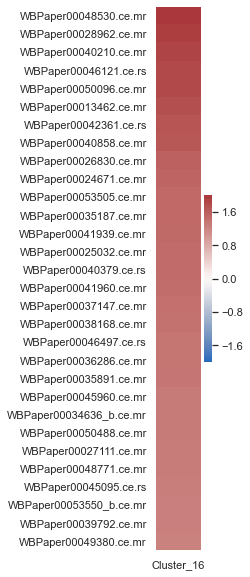

In [142]:
x=pd.read_csv("BestDatasets_Cluster_16_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("PeroxFA_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PeroxFA_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


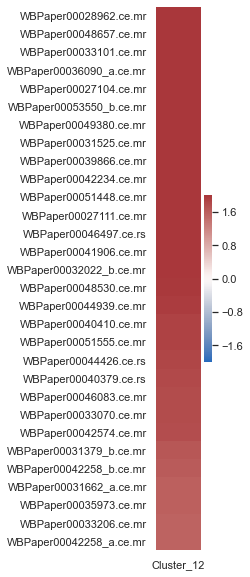

In [143]:
x=pd.read_csv("BestDatasets_Cluster_12_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("PropionateShunt_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PropionateShunt_best_datasets.svg",dpi=300,bbox_inches = 'tight')

In [144]:
BestDatasetsShunt=Pathway_mean_df.loc['Cluster_12'][x.index]

In [145]:
BestDatasetsShunt.sort_values(ascending=False,inplace=True)

In [146]:
# np.unique(Propionate_Shunt.Paper)

In [147]:
BestDatasetsShunt=pd.DataFrame(BestDatasetsShunt)

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  after removing the cwd from sys.path.


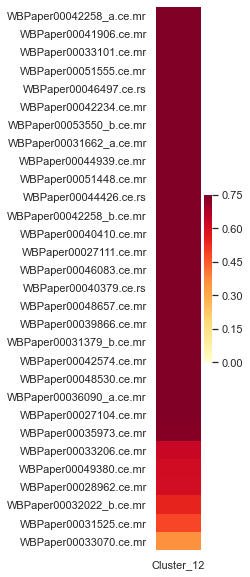

In [148]:
fig=plt.figure(figsize=(1,10))
sns.heatmap(BestDatasetsShunt,cmap='YlOrRd',vmin=0,vmax=0.75)
# x=x.transpose
plt.tight_layout()
plt.savefig("PropionateShunt_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PropionateShunt_best_datasets.svg",dpi=300,bbox_inches = 'tight')

In [149]:
Dataset42258_a=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/z_normalized_WBPaper00042258_a.ce.mr.pcl",
                          index_col=0,sep='\t'
                          )

In [150]:
genes=['acdh-1','hach-1','hphd-1','acdh-2','alh-8','gta-1']
Dataset42258_a=wb_to_gene(Dataset42258_a)
Genes_a=Dataset42258_a.loc[genes]

In [151]:
Genes_a.drop(columns=['IDENTIFIER','GWEIGHT'],inplace=True)

In [152]:
Genes_a=Genes_a.transpose()

In [153]:
Genes_a.max().max()

1.4842899999999999

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x144 with 0 Axes>

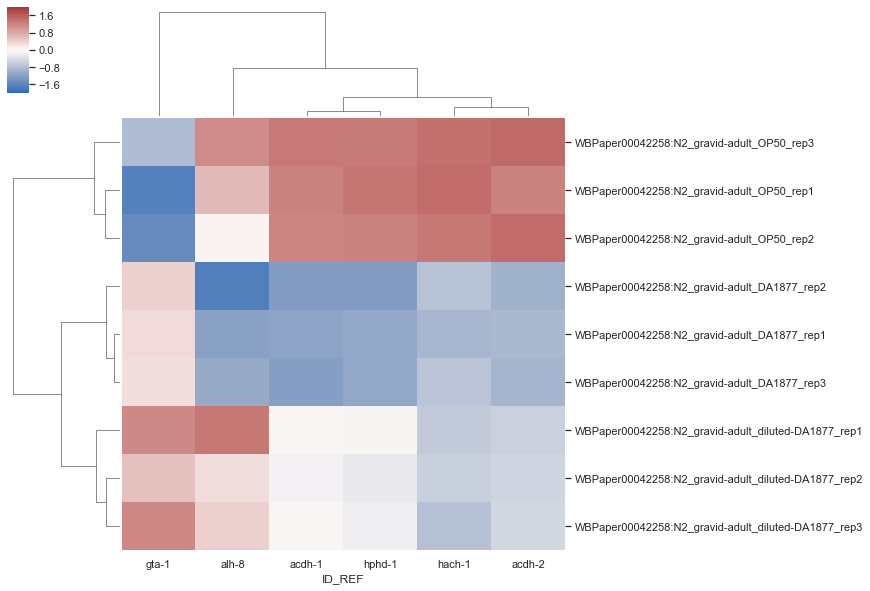

In [154]:
fig=plt.figure(figsize=(10,2))
sns.clustermap(Genes_a,vmin=-2,vmax=2,cmap='vlag')
plt.tight_layout()
plt.savefig("PropionateShunt_WBPaper00042258_alh_8.svg",dpi=300)
plt.savefig("PropionateShunt_WBPaper00042258_alh_8.png",dpi=300)

In [155]:
Dataset00046497=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/z_normalized_WBPaper00033101.ce.mr.pcl",
                          index_col=0,sep='\t'
                          )
genes=['acdh-1','hach-1','hphd-1','acdh-2']
Dataset00046497=wb_to_gene(Dataset00046497)
Genes_a=Dataset00046497.loc[genes]

In [156]:
Genes_a.drop(columns=['IDENTIFIER','GWEIGHT'],inplace=True)
Genes_a.min().min()

-1.9191099999999999

In [157]:
Genes_a.replace(np.nan,-2,inplace=True)
Genes_a=Genes_a.transpose()

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x144 with 0 Axes>

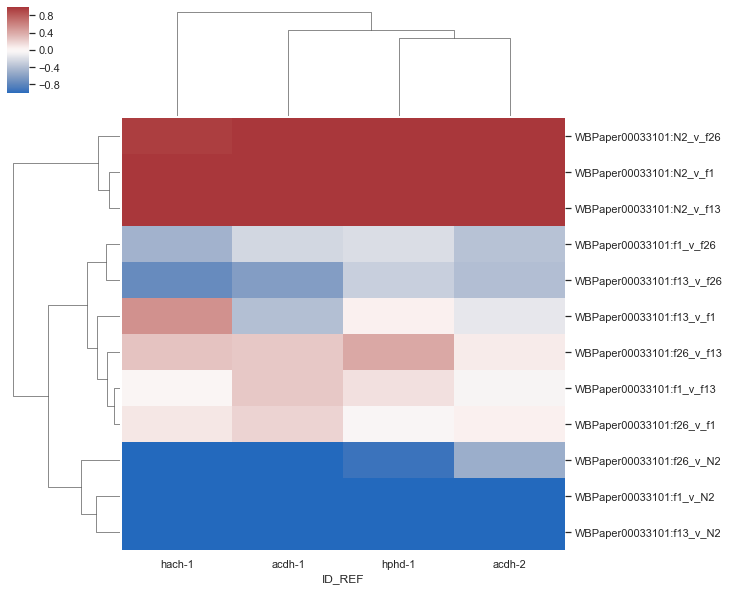

In [158]:
fig=plt.figure(figsize=(10,2))
sns.clustermap(Genes_a,vmin=-1,vmax=1,cmap='vlag',mask=Genes_a==-2)
plt.tight_layout()
plt.savefig("PropionateShunt_WBPaper00046497.svg",dpi=300)
plt.savefig("PropionateShunt_WBPaper00046497.png",dpi=300)

In [159]:
Dataset00046497=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/z_normalized_WBPaper00051448.ce.mr.pcl",
                          index_col=0,sep='\t'
                          )
genes=['acdh-1','hach-1','hphd-1','acdh-2']
Dataset00046497=wb_to_gene(Dataset00046497)
Genes_a=Dataset00046497.loc[genes]

In [160]:
Genes_a.drop(columns=['IDENTIFIER','GWEIGHT'],inplace=True)
Genes_a.min().min()

-2.38727

In [161]:
Genes_a.replace(np.nan,-4,inplace=True)
Genes_a=Genes_a.transpose()

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 720x144 with 0 Axes>

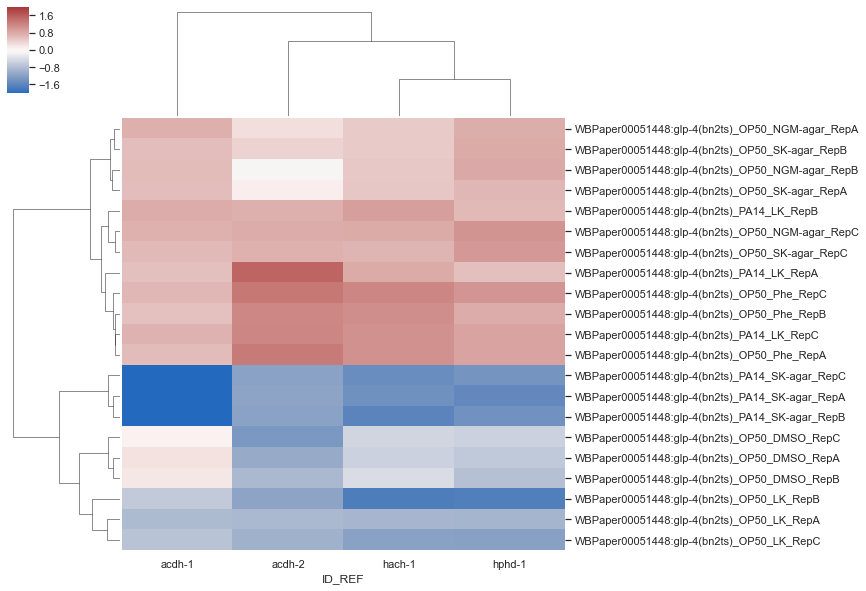

In [162]:
fig=plt.figure(figsize=(10,2))
sns.clustermap(Genes_a,vmin=-2,vmax=2,cmap='vlag',mask=Genes_a==-4)
plt.tight_layout()
plt.savefig("PropionateShunt_WBPaper00044939.svg",dpi=300)
plt.savefig("PropionateShunt_WBPaper00044939.png",dpi=300)

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


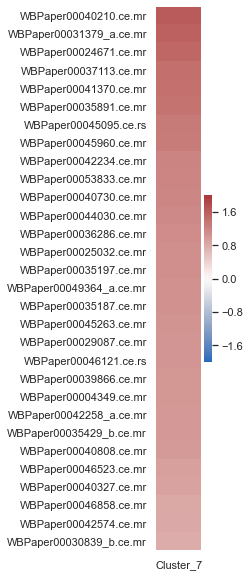

In [163]:
x=pd.read_csv("BestDatasets_Cluster_7_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("TyrDeg_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("TyrDeg_best_datasets.svg",dpi=300,bbox_inches = 'tight')

In [164]:
BestDatasetsTyrDeg=Pathway_mean_df.loc['Cluster_7'][x.index]
BestDatasetsTyrDeg.sort_values(ascending=False,inplace=True)
BestDatasetsTyrDeg=pd.DataFrame(BestDatasetsTyrDeg)

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  after removing the cwd from sys.path.


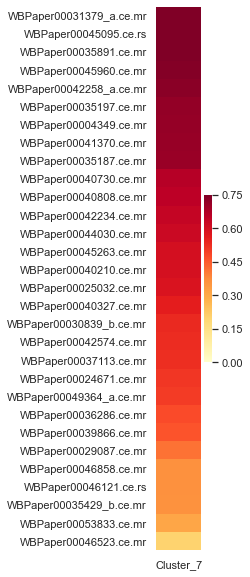

In [165]:
fig=plt.figure(figsize=(1,10))
sns.heatmap(BestDatasetsTyrDeg,cmap='YlOrRd',vmin=0,vmax=0.75)
# x=x.transpose
plt.tight_layout()
plt.savefig("TyrDeg_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("TyrDeg_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


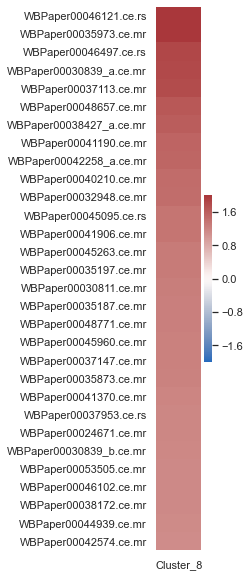

In [166]:
x=pd.read_csv("BestDatasets_Cluster_8_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("HisDeg_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("HisDeg_best_datasets.svg",dpi=300,bbox_inches = 'tight')

In [167]:
BestDatasetsHisDeg=Pathway_mean_df.loc['Cluster_8'][x.index]
BestDatasetsHisDeg.sort_values(ascending=False,inplace=True)
BestDatasetsHisDeg=pd.DataFrame(BestDatasetsHisDeg)

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  after removing the cwd from sys.path.


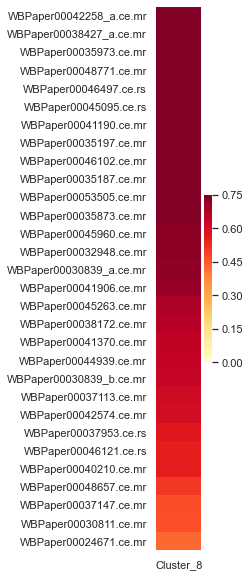

In [168]:
fig=plt.figure(figsize=(1,10))
sns.heatmap(BestDatasetsHisDeg,cmap='YlOrRd',vmin=0,vmax=0.75)
# x=x.transpose
plt.tight_layout()
plt.savefig("HisDeg_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("HisDeg_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00053505
 Gene:['cpin-1', 'haly-1', 'amdh-1', 'Y51H4A.7']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

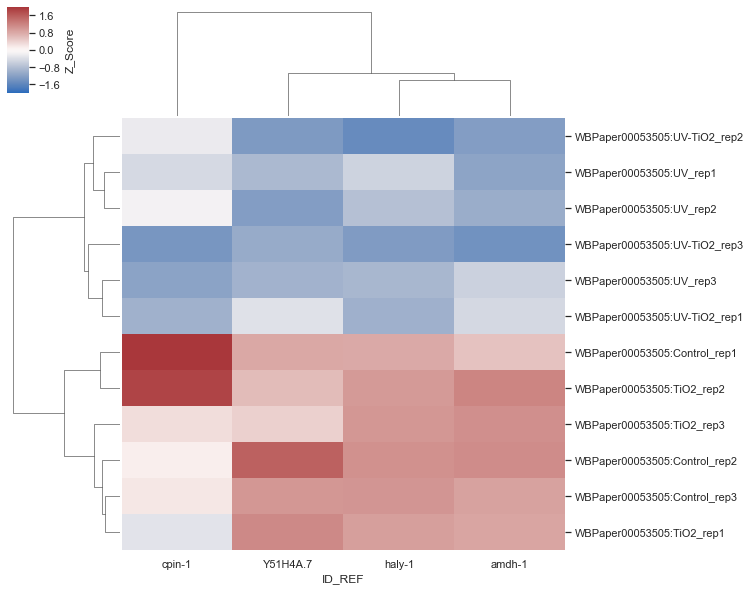

In [169]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_8')
# genes=['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00053505')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00053505
 Gene:['cpin-1', 'haly-1', 'amdh-1', 'Y51H4A.7']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

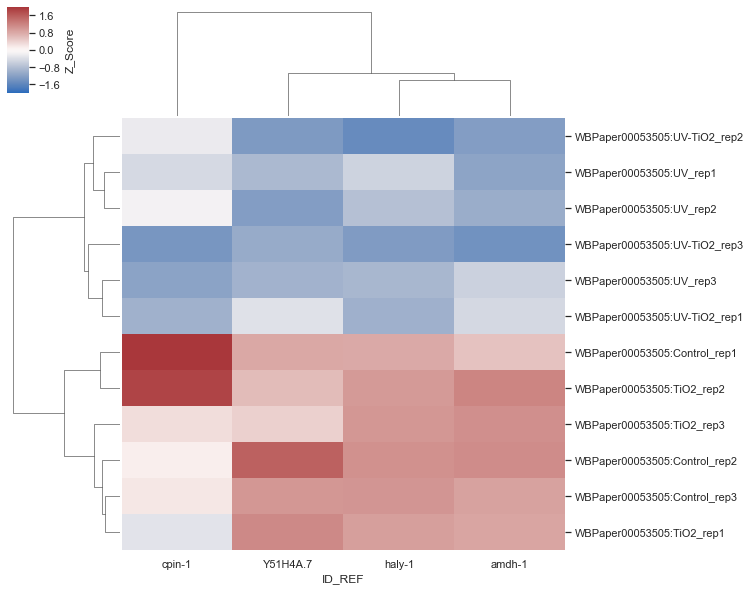

In [170]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_8')
# genes=['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00053505')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


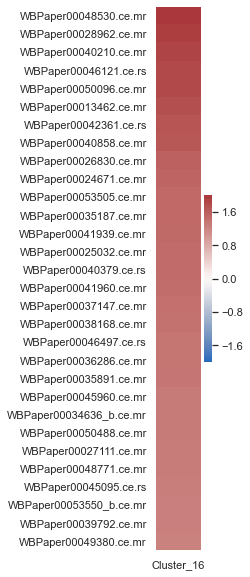

In [171]:
x=pd.read_csv("BestDatasets_Cluster_16_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("PeroxFA_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PeroxFA_best_datasets.svg",dpi=300,bbox_inches = 'tight')

In [172]:
BestDatasetsPeroxFA=Pathway_mean_df.loc['Cluster_16'][x.index]
BestDatasetsPeroxFA.sort_values(ascending=False,inplace=True)
BestDatasetsPeroxFA=pd.DataFrame(BestDatasetsPeroxFA)

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  after removing the cwd from sys.path.


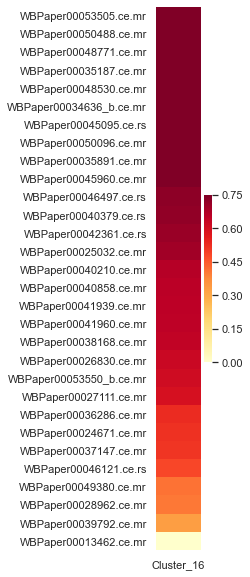

In [173]:
fig=plt.figure(figsize=(1,10))
sns.heatmap(BestDatasetsPeroxFA,cmap='YlOrRd',vmin=0,vmax=0.75)
# x=x.transpose
plt.tight_layout()
plt.savefig("PeroxFA_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PeroxFA_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  from ipykernel import kernelapp as app


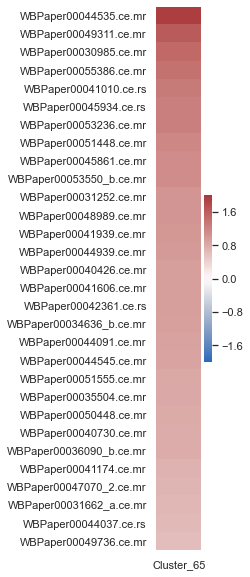

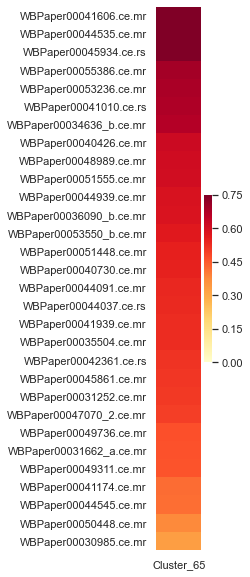

In [174]:
x=pd.read_csv("BestDatasets_Cluster_65_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("PropionateCanonical_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PropionateCanonical_best_datasets.svg",dpi=300,bbox_inches = 'tight')
BestDatasetsPropionateCanonical=Pathway_mean_df.loc['Cluster_65'][x.index]
BestDatasetsPropionateCanonical.sort_values(ascending=False,inplace=True)
BestDatasetsPropionateCanonical=pd.DataFrame(BestDatasetsPropionateCanonical)
fig=plt.figure(figsize=(1,10))
sns.heatmap(BestDatasetsPropionateCanonical,cmap='YlOrRd',vmin=0,vmax=0.75)
# x=x.transpose
plt.tight_layout()
plt.savefig("PropionateCanonical_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PropionateCanonical_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00041606
 Gene:['mmcm-1', 'mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

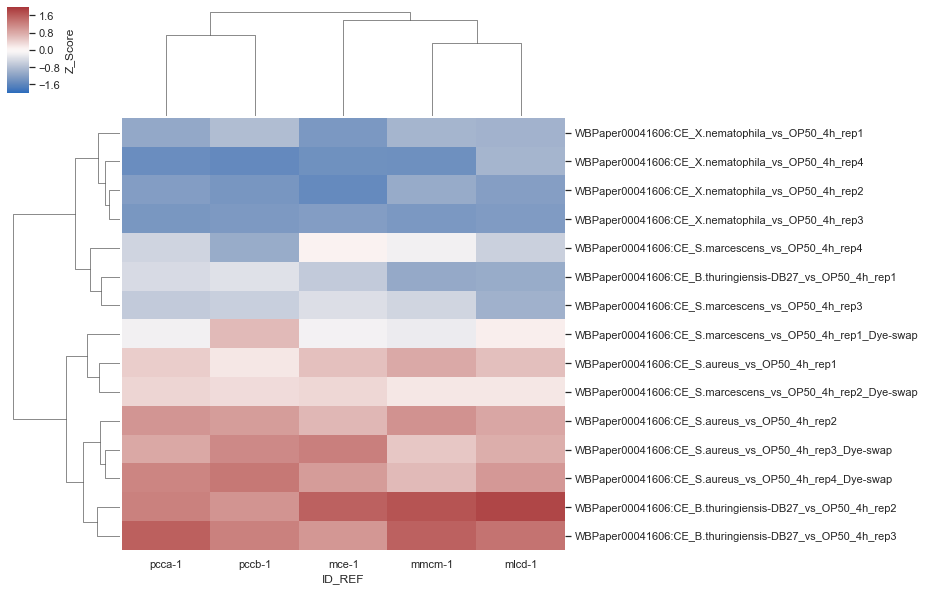

In [175]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_65')
# genes=['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00041606')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00044535
 Gene:['mmcm-1', 'mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

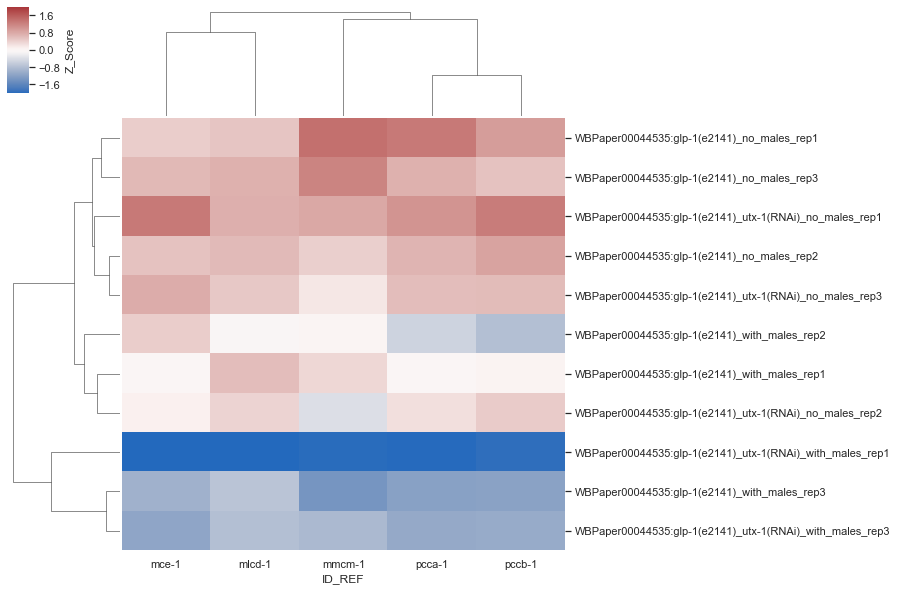

In [176]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_65')
# genes=['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00044535')

In [177]:
MetabolicExpression.columns

Index(['K04A8.10', 'poml-4', 'F26C11.1', 'hex-1', 'ugt-1', 'gcy-3', 'C37H5.13',
       'ZK669.2', 'anmt-2', 'D1054.1',
       ...
       'ptps-1', 'H14N18.4', 'K07E3.4', 'mai-2', 'pdl-1', 'mys-4', 'dhod-1',
       'elo-8', 'acbp-7', 'Paper'],
      dtype='object', name='ID_REF', length=2506)

In [178]:
d=MetabolicExpression[MetabolicExpression['Paper']=='WBPaper00048530']
# sns.clustermap(MetabolicExpression[MetabolicExpression.Paper=='WBPaper00053505'])

In [179]:
d.drop(columns=['Paper'],inplace=True)

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


<Figure size 2160x720 with 0 Axes>

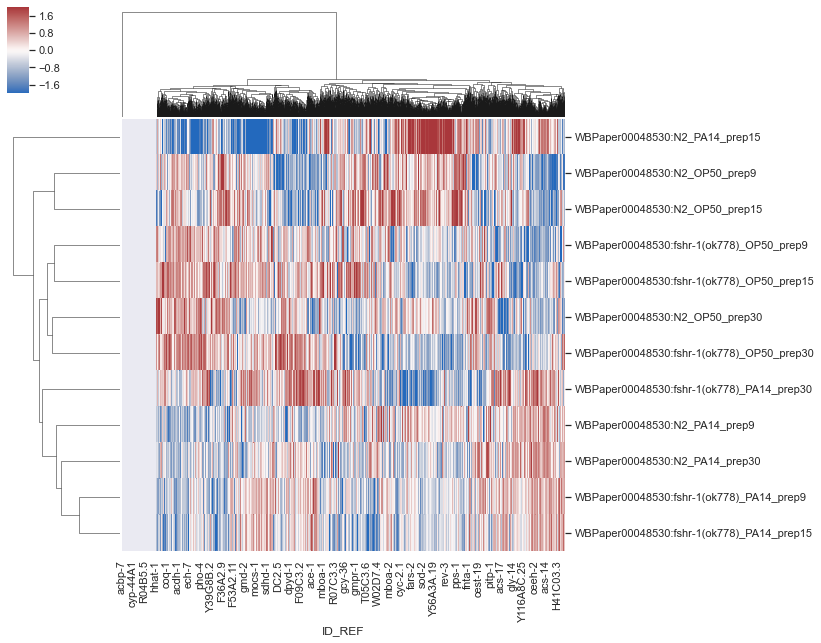

In [180]:
# d.drop(columns=['Paper'],inplace=True)
fig=plt.figure(figsize=(30,10))
d.replace(np.nan,-4,inplace=True)
d.replace(np.inf,-4,inplace=True)
sns.clustermap(d,cmap='vlag',vmin=-2,vmax=2,mask=d==-4)

In [181]:
d.min().min()

-4.0

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00035187
 Gene:['acs-3', 'daf-22', 'T20B3.1', 'acox-3', 'ech-3', 'dhs-28', 'F53C11.3', 'acox-1.1', 'maoc-1', 'B0272.4', 'F58A6.1', 'ech-8']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

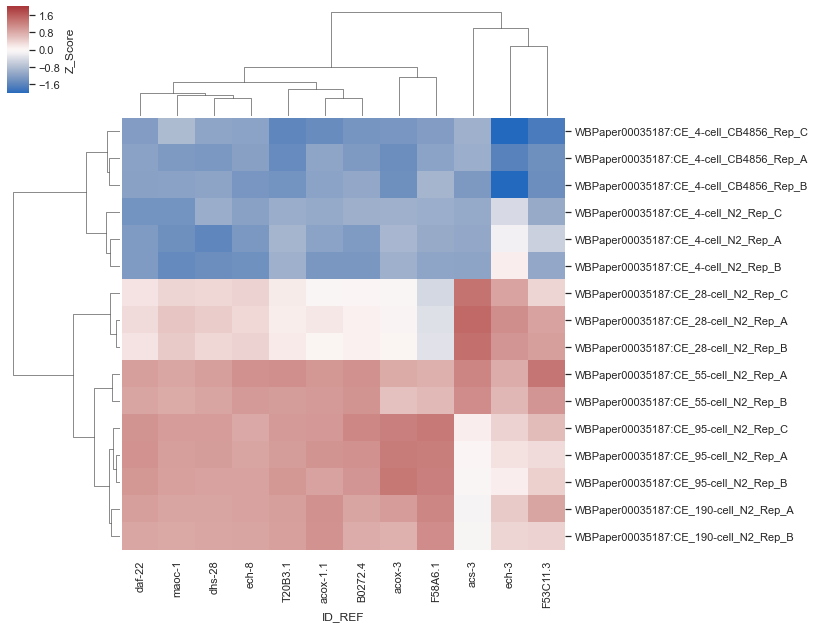

In [182]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_16')
# genes=['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00035187')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00050488
 Gene:['acs-3', 'daf-22', 'T20B3.1', 'acox-3', 'ech-3', 'dhs-28', 'F53C11.3', 'acox-1.1', 'maoc-1', 'B0272.4', 'F58A6.1', 'ech-8']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

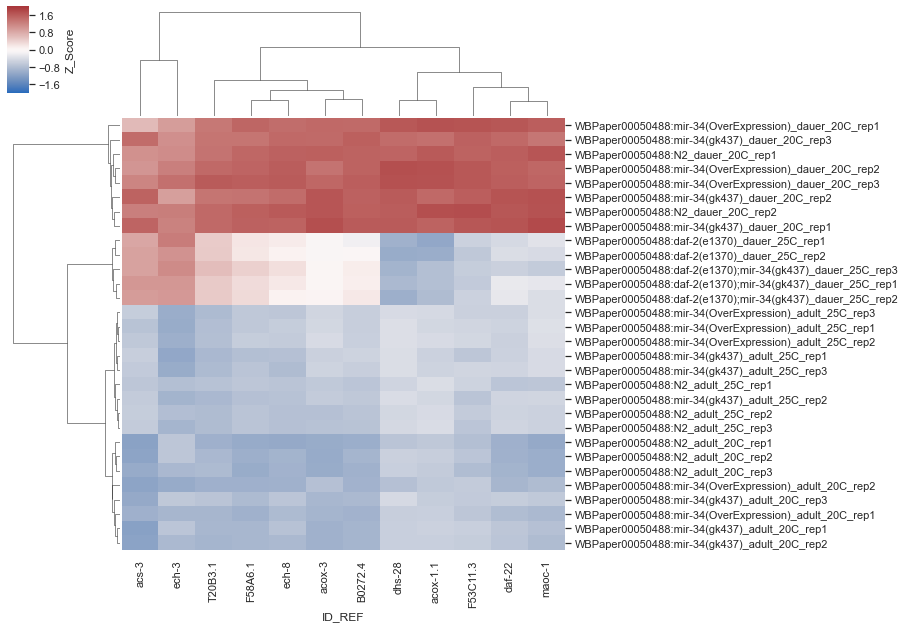

In [183]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_16')
# genes=['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00050488')

In [184]:
Dataset_35973=pd.read_csv("/data/nandas/Combined_coexp/Compendium/BatchCorrectedFiles061822/z_normalized_WBPaper00035973.ce.mr.pcl",
                          index_col=0,sep='\t')

In [185]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_8')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [186]:
Dataset_35973.drop(columns=['IDENTIFIER','GWEIGHT'],inplace=True)

In [187]:
Dataset_35973=wb_to_gene(Dataset_35973)

In [188]:
Dataset_35973.min().min()

-3.12473

In [189]:
HisdegDataset=Dataset_35973.loc[genes]

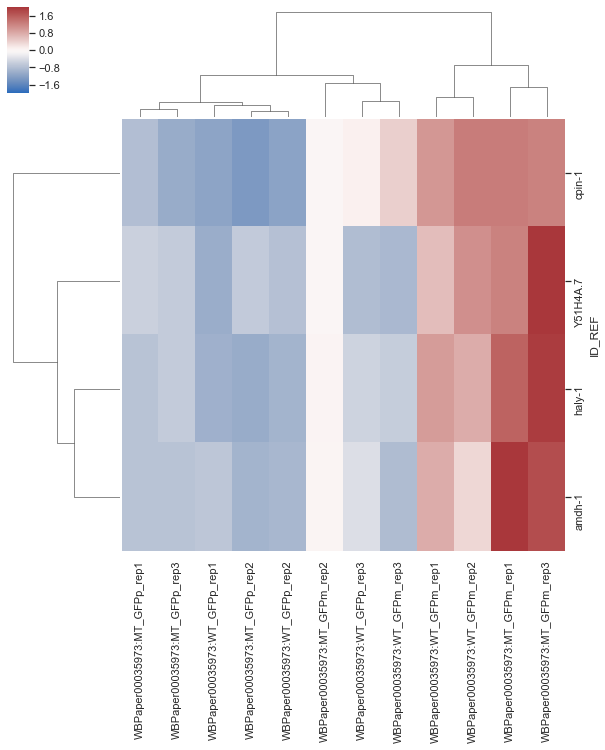

In [190]:
# Dataset_45095.replace(np.nan,-4,inplace=True)
# Dataset_45095.replace(np.inf,-4,inplace=True)
sns.clustermap(HisdegDataset,mask=HisdegDataset==-4,vmin=-2,vmax=2,cmap='vlag')

Paper:WBPaper00035891
 Gene:['cpin-1', 'haly-1', 'amdh-1', 'Y51H4A.7']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

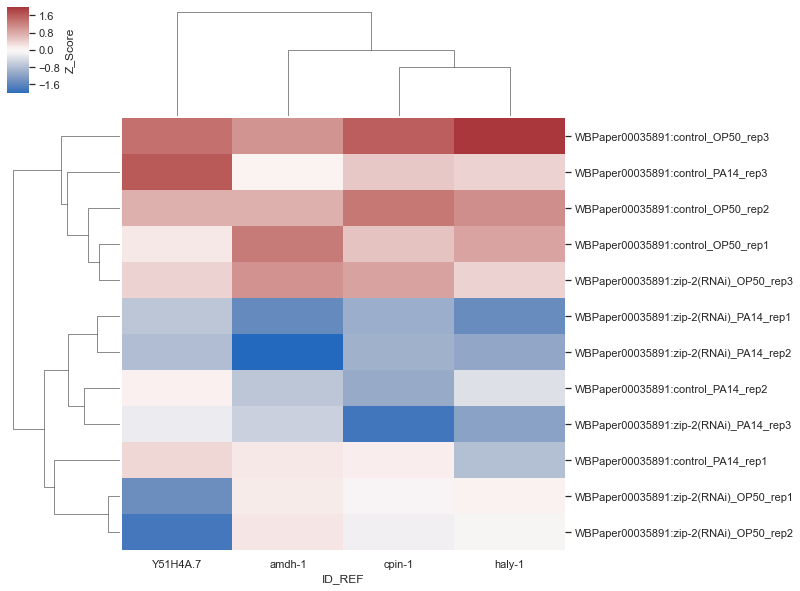

In [191]:
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00035891')

Paper:WBPaper00033101
 Gene:['acdh-1', 'hach-1', 'hphd-1', 'acdh-2', 'alh-8']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

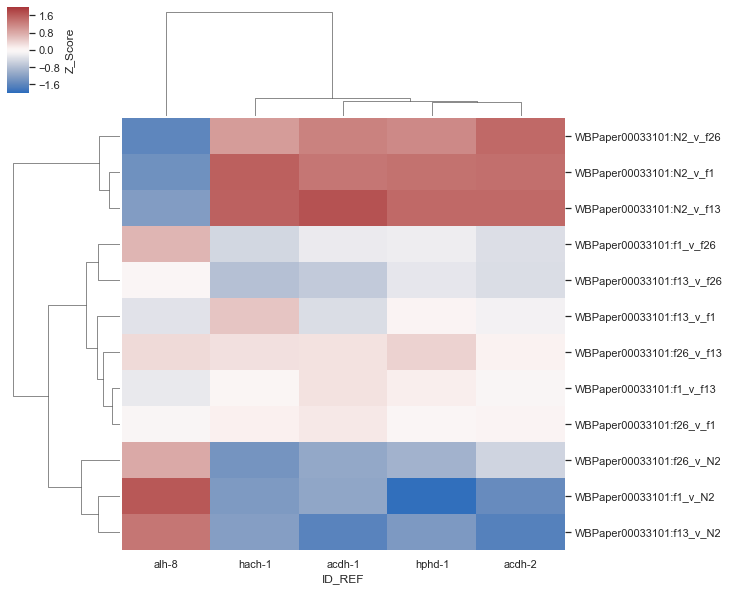

In [192]:
# genes
genes=['acdh-1','hach-1','hphd-1','acdh-2','alh-8']
# genes=['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00033101')

In [193]:
# Propionate_Shunt=pd.DataFrame([])
paper_list=[]
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_12')
Propionate_Shunt=MetabolicExpression[genes]
Propionate_Shunt['Paper']=MetabolicExpression['Paper']
for paper in x.index:
    paper=paper.split(".")[0]
    print(paper_list)
    paper_list.append(paper)
Propionate_Shunt=Propionate_Shunt[(Propionate_Shunt['Paper']).isin(paper_list)]
    

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

[]
['WBPaper00044535']
['WBPaper00044535', 'WBPaper00049311']
['WBPaper00044535', 'WBPaper00049311', 'WBPaper00030985']
['WBPaper00044535', 'WBPaper00049311', 'WBPaper00030985', 'WBPaper00055386']
['WBPaper00044535', 'WBPaper00049311', 'WBPaper00030985', 'WBPaper00055386', 'WBPaper00041010']
['WBPaper00044535', 'WBPaper00049311', 'WBPaper00030985', 'WBPaper00055386', 'WBPaper00041010', 'WBPaper00045934']
['WBPaper00044535', 'WBPaper00049311', 'WBPaper00030985', 'WBPaper00055386', 'WBPaper00041010', 'WBPaper00045934', 'WBPaper00053236']
['WBPaper00044535', 'WBPaper00049311', 'WBPaper00030985', 'WBPaper00055386', 'WBPaper00041010', 'WBPaper00045934', 'WBPaper00053236', 'WBPaper00051448']
['WBPaper00044535', 'WBPaper00049311', 'WBPaper00030985', 'WBPaper00055386', 'WBPaper00041010', 'WBPaper00045934', 'WBPaper00053236', 'WBPaper00051448', 'WBPaper00045861']
['WBPaper00044535', 'WBPaper00049311', 'WBPaper00030985', 'WBPaper00055386', 'WBPaper00041010', 'WBPaper00045934', 'WBPaper00053236',

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


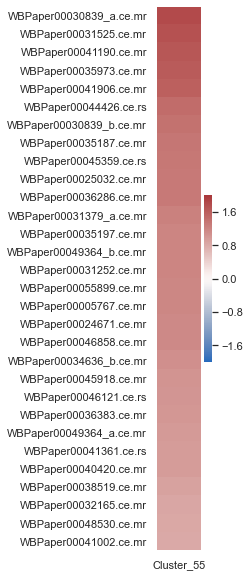

In [194]:
x=pd.read_csv("BestDatasets_Cluster_55_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("alh-8_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("alh-8_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


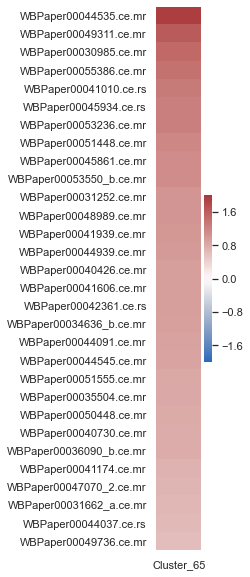

In [195]:
x=pd.read_csv("BestDatasets_Cluster_65_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Canonicalpropionate_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("Canonicalpropionate_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


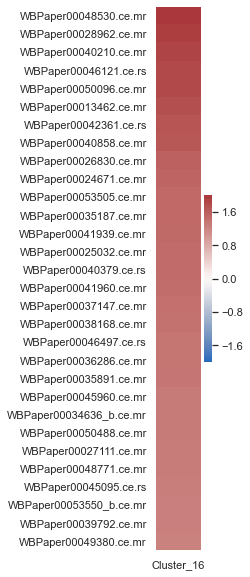

In [196]:
x=pd.read_csv("BestDatasets_Cluster_16_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("PeroxFA_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PeroxFA_best_datasets.svg",dpi=300,bbox_inches = 'tight')

Paper:WBPaper00055386
 Gene:['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

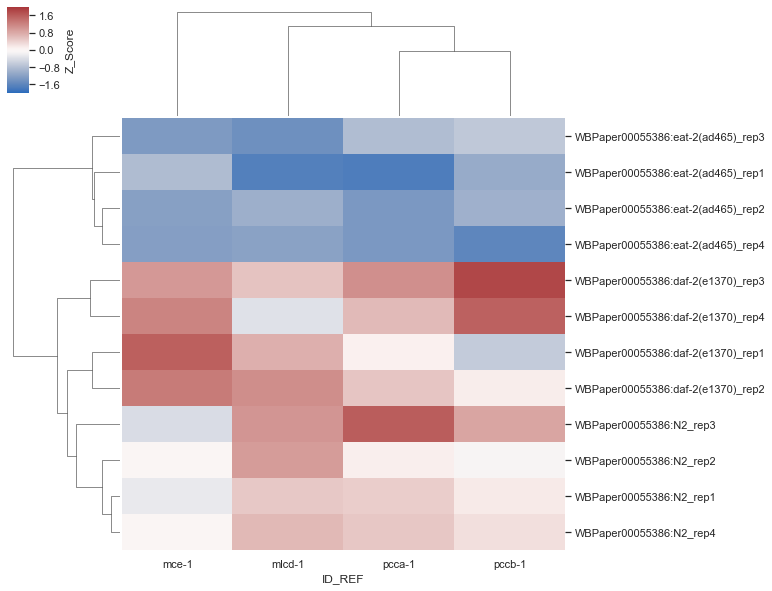

In [197]:
# genes
# genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_65')
genes=['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00055386')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00053236
 Gene:['mmcm-1', 'mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

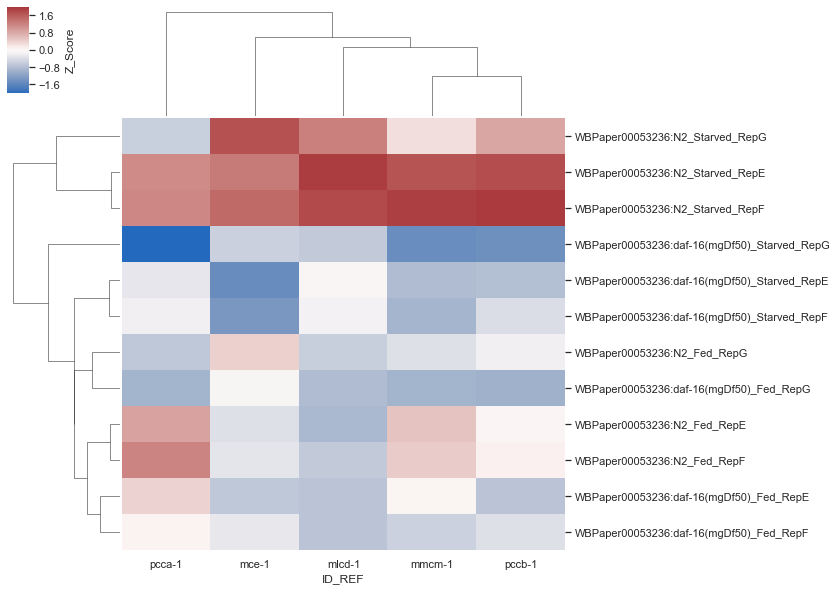

In [198]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_65')
# genes=['mce-1', 'pcca-1', 'pccb-1', 'mlcd-1']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00053236')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00040210
 Gene:['acs-3', 'daf-22', 'T20B3.1', 'acox-3', 'ech-3', 'dhs-28', 'F53C11.3', 'acox-1.1', 'maoc-1', 'B0272.4', 'F58A6.1', 'ech-8']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

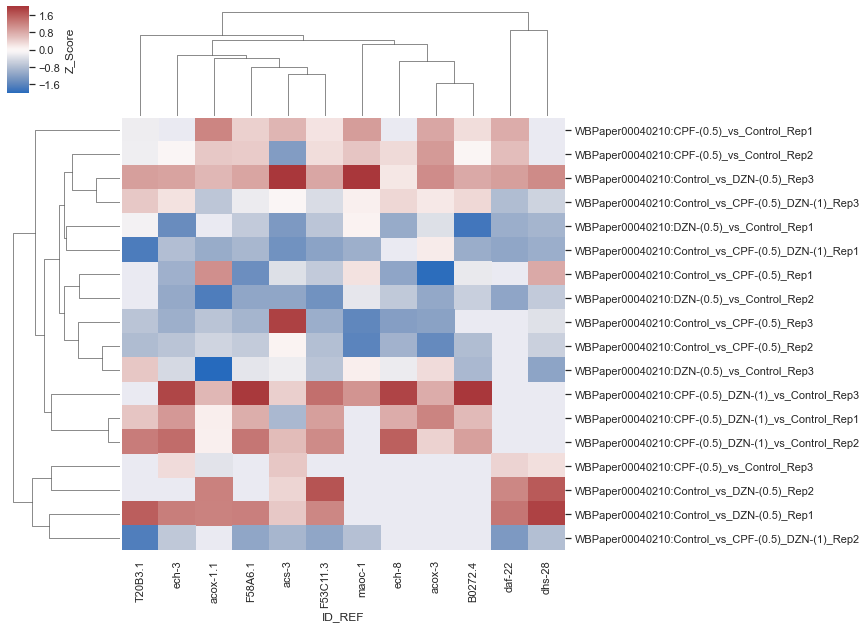

In [199]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_16')
# genes=['acdh-1','hach-1','hphd-1','acdh-2']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00040210')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


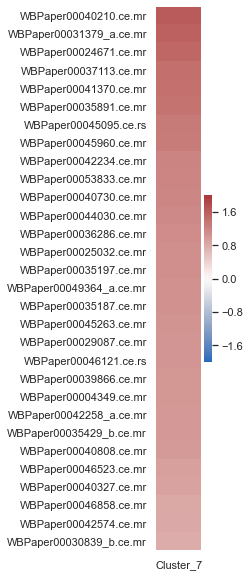

In [200]:
x=pd.read_csv("BestDatasets_Cluster_7_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Tyrosine_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("Tyrosine_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00044030
 Gene:['hgo-1', 'hpd-1', 'fah-1', 'gst-43', 'gst-42', 'Y53G8B.1', 'C31H2.4']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

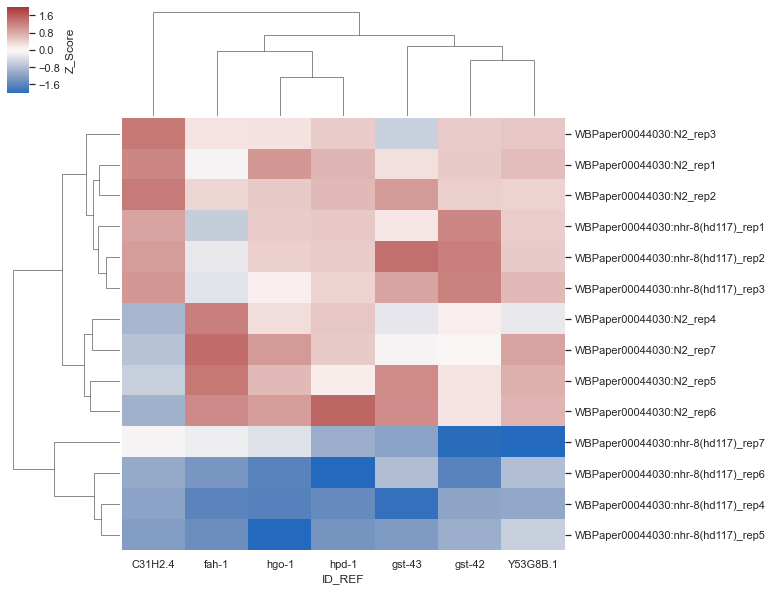

In [201]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_7')
# genes=['acdh-1','hach-1','hphd-1','acdh-2']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00044030')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


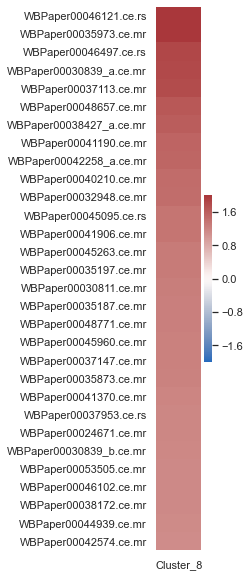

In [202]:
x=pd.read_csv("BestDatasets_Cluster_8_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Histidine_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("Histidine_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00042258
 Gene:['cpin-1', 'haly-1', 'amdh-1', 'Y51H4A.7']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

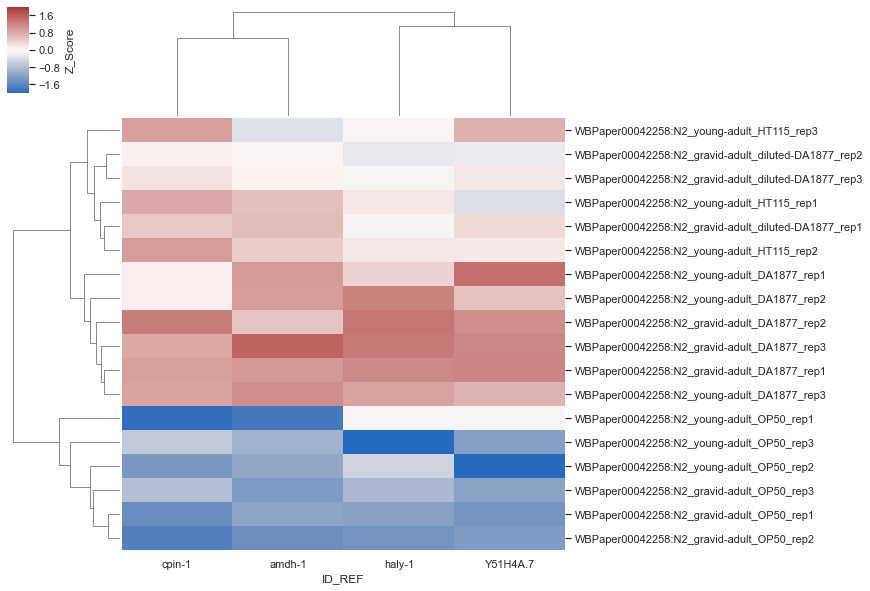

In [203]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_8')
# genes=['acdh-1','hach-1','hphd-1','acdh-2']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00042258')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


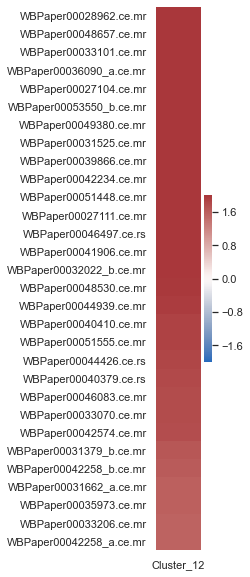

In [204]:
x=pd.read_csv("BestDatasets_Cluster_12_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("PropionateShunt_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PropionateShunt_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


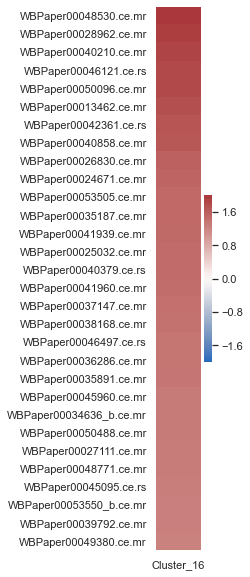

In [205]:
x=pd.read_csv("BestDatasets_Cluster_16_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("PeroxFA_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PeroxFA_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


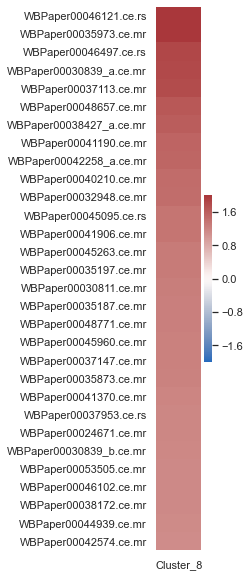

In [206]:
x=pd.read_csv("BestDatasets_Cluster_8_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Histidine_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("Histidine_best_datasets.svg",dpi=300,bbox_inches = 'tight')

In [207]:
MetabolicExpression

ID_REF                                  K04A8.10    poml-4  F26C11.1  \
IDENTIFIER                        WBGene00019379       NaN       NaN   
GWEIGHT                                        1       NaN       NaN   
[cgc4349]:fem-3_fem-1                    -3.4641       NaN       NaN   
[cgc4349]:glp-4_reference_adult         0.288675       NaN       NaN   
[cgc4349]:glp-4_reference_L2            0.288675       NaN       NaN   
...                                          ...       ...       ...   
WBPaper00055899:NQ_2667ppm_rep1        -0.747514   1.05543  -1.36521   
WBPaper00055899:NTO_187ppm_rep4        -0.544026  0.975305   1.08996   
WBPaper00055899:NTO_Control_rep2        -0.31038  0.951223   1.04917   
WBPaper00055899:NTO_750ppm_rep4         0.251027  0.490645   1.76411   
WBPaper00055899:NQ_Control_rep4          -1.0927  -0.39125 -0.599608   

ID_REF                                     hex-1     ugt-1           gcy-3  \
IDENTIFIER                        WBGene00020509       NaN  WBGene00001530   
GWEIGHT                                        1       NaN               1   
[cgc4349]:fem-3_fem-1                    1.81026       NaN          3.4641   
[cgc4349]:glp-4_reference_adult         0.274448       NaN       -0.288675   
[cgc4349]:glp-4_reference_L2           -0.745332       NaN       -0.288675   
...                                          ...       ...             ...   
WBPaper00055899:NQ_2667ppm_rep1        -0.322547   1.34042         1.93357   
WBPaper00055899:NTO_187ppm_rep4          0.38798  -1.54122       -0.385444   
WBPaper00055899:NTO_Control_rep2      -0.0796763  -1.58344       -0.435653   
WBPaper00055899:NTO_750ppm_rep4          1.82003  -1.06232        -1.42508   
WBPaper00055899:NQ_Control_rep4         0.240596  0.811083        0.495183   

ID_REF                                  C37H5.13   ZK669.2    anmt-2  \
IDENTIFIER                        WBGene00016511       NaN       NaN   
GWEIGHT                                        1       NaN       NaN   
[cgc4349]:fem-3_fem-1                   -2.42921       NaN       NaN   
[cgc4349]:glp-4_reference_adult         0.374526       NaN       NaN   
[cgc4349]:glp-4_reference_L2            0.321696       NaN       NaN   
...                                          ...       ...       ...   
WBPaper00055899:NQ_2667ppm_rep1       0.00448054  -0.62768 -0.782604   
WBPaper00055899:NTO_187ppm_rep4        0.0805716 -0.680014   1.09164   
WBPaper00055899:NTO_Control_rep2      -0.0852965 -0.482897   1.49309   
WBPaper00055899:NTO_750ppm_rep4         0.240969 -0.844458  0.904668   
WBPaper00055899:NQ_Control_rep4         0.165897 -0.470083 -0.968435   

ID_REF                             D1054.1  ...          ptps-1  \
IDENTIFIER                             NaN  ...  WBGene00015010   
GWEIGHT                                NaN  ...               1   
[cgc4349]:fem-3_fem-1                  NaN  ...      -0.0164388   
[cgc4349]:glp-4_reference_adult        NaN  ...         1.62077   
[cgc4349]:glp-4_reference_L2           NaN  ...      0.00979588   
...                                    ...  ...             ...   
WBPaper00055899:NQ_2667ppm_rep1   0.857062  ...         1.63017   
WBPaper00055899:NTO_187ppm_rep4   -1.99511  ...        0.902125   
WBPaper00055899:NTO_Control_rep2  -2.05903  ...         0.60206   
WBPaper00055899:NTO_750ppm_rep4  -0.475446  ...        0.759899   
WBPaper00055899:NQ_Control_rep4  -0.360245  ...         -1.2583   

ID_REF                                  H14N18.4         K07E3.4  \
IDENTIFIER                        WBGene00019204  WBGene00019492   
GWEIGHT                                        1               1   
[cgc4349]:fem-3_fem-1                  -0.275013        0.256079   
[cgc4349]:glp-4_reference_adult           2.2623           1.237   
[cgc4349]:glp-4_reference_L2         0.000977061        -1.78122   
...                                          ...             ...   
WBPaper00055899:NQ_2667ppm_rep1        -0.414092    

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


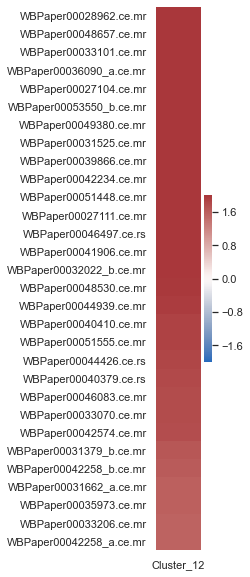

In [208]:
x=pd.read_csv("BestDatasets_Cluster_12_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("PropionateShunt_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("PropionateShunt_best_datasets.svg",dpi=300,bbox_inches = 'tight')

In [209]:
# MetabolicExpression=MetabolicExpression.transpose()

In [210]:
MetabolicExpression

ID_REF                                  K04A8.10    poml-4  F26C11.1  \
IDENTIFIER                        WBGene00019379       NaN       NaN   
GWEIGHT                                        1       NaN       NaN   
[cgc4349]:fem-3_fem-1                    -3.4641       NaN       NaN   
[cgc4349]:glp-4_reference_adult         0.288675       NaN       NaN   
[cgc4349]:glp-4_reference_L2            0.288675       NaN       NaN   
...                                          ...       ...       ...   
WBPaper00055899:NQ_2667ppm_rep1        -0.747514   1.05543  -1.36521   
WBPaper00055899:NTO_187ppm_rep4        -0.544026  0.975305   1.08996   
WBPaper00055899:NTO_Control_rep2        -0.31038  0.951223   1.04917   
WBPaper00055899:NTO_750ppm_rep4         0.251027  0.490645   1.76411   
WBPaper00055899:NQ_Control_rep4          -1.0927  -0.39125 -0.599608   

ID_REF                                     hex-1     ugt-1           gcy-3  \
IDENTIFIER                        WBGene00020509       NaN  WBGene00001530   
GWEIGHT                                        1       NaN               1   
[cgc4349]:fem-3_fem-1                    1.81026       NaN          3.4641   
[cgc4349]:glp-4_reference_adult         0.274448       NaN       -0.288675   
[cgc4349]:glp-4_reference_L2           -0.745332       NaN       -0.288675   
...                                          ...       ...             ...   
WBPaper00055899:NQ_2667ppm_rep1        -0.322547   1.34042         1.93357   
WBPaper00055899:NTO_187ppm_rep4          0.38798  -1.54122       -0.385444   
WBPaper00055899:NTO_Control_rep2      -0.0796763  -1.58344       -0.435653   
WBPaper00055899:NTO_750ppm_rep4          1.82003  -1.06232        -1.42508   
WBPaper00055899:NQ_Control_rep4         0.240596  0.811083        0.495183   

ID_REF                                  C37H5.13   ZK669.2    anmt-2  \
IDENTIFIER                        WBGene00016511       NaN       NaN   
GWEIGHT                                        1       NaN       NaN   
[cgc4349]:fem-3_fem-1                   -2.42921       NaN       NaN   
[cgc4349]:glp-4_reference_adult         0.374526       NaN       NaN   
[cgc4349]:glp-4_reference_L2            0.321696       NaN       NaN   
...                                          ...       ...       ...   
WBPaper00055899:NQ_2667ppm_rep1       0.00448054  -0.62768 -0.782604   
WBPaper00055899:NTO_187ppm_rep4        0.0805716 -0.680014   1.09164   
WBPaper00055899:NTO_Control_rep2      -0.0852965 -0.482897   1.49309   
WBPaper00055899:NTO_750ppm_rep4         0.240969 -0.844458  0.904668   
WBPaper00055899:NQ_Control_rep4         0.165897 -0.470083 -0.968435   

ID_REF                             D1054.1  ...          ptps-1  \
IDENTIFIER                             NaN  ...  WBGene00015010   
GWEIGHT                                NaN  ...               1   
[cgc4349]:fem-3_fem-1                  NaN  ...      -0.0164388   
[cgc4349]:glp-4_reference_adult        NaN  ...         1.62077   
[cgc4349]:glp-4_reference_L2           NaN  ...      0.00979588   
...                                    ...  ...             ...   
WBPaper00055899:NQ_2667ppm_rep1   0.857062  ...         1.63017   
WBPaper00055899:NTO_187ppm_rep4   -1.99511  ...        0.902125   
WBPaper00055899:NTO_Control_rep2  -2.05903  ...         0.60206   
WBPaper00055899:NTO_750ppm_rep4  -0.475446  ...        0.759899   
WBPaper00055899:NQ_Control_rep4  -0.360245  ...         -1.2583   

ID_REF                                  H14N18.4         K07E3.4  \
IDENTIFIER                        WBGene00019204  WBGene00019492   
GWEIGHT                                        1               1   
[cgc4349]:fem-3_fem-1                  -0.275013        0.256079   
[cgc4349]:glp-4_reference_adult           2.2623           1.237   
[cgc4349]:glp-4_reference_L2         0.000977061        -1.78122   
...                                          ...             ...   
WBPaper00055899:NQ_2667ppm_rep1        -0.414092    

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00048530
 Gene:['acdh-1', 'hach-1', 'hphd-1', 'acdh-2']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

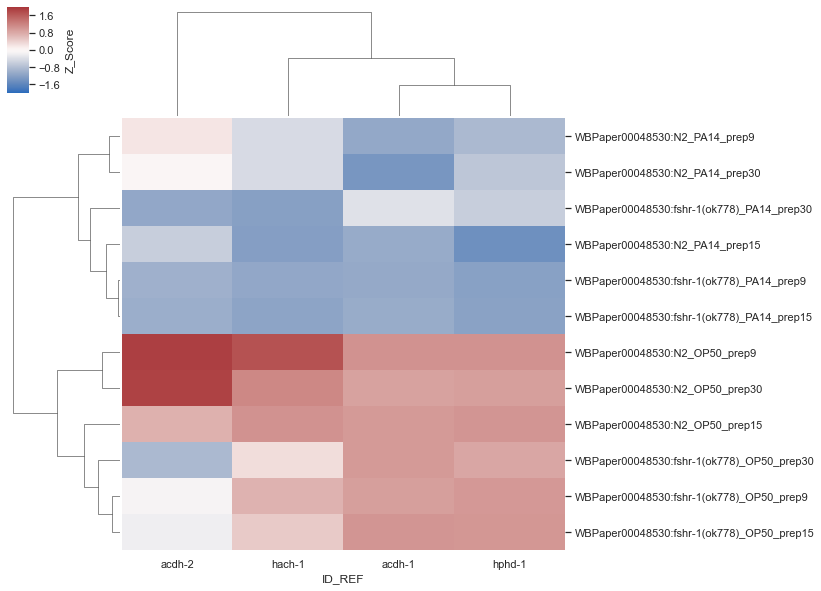

In [211]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_12')
genes=['acdh-1','hach-1','hphd-1','acdh-2']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00048530')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00013462
 Gene:['acs-3', 'daf-22', 'T20B3.1', 'acox-3', 'ech-3', 'dhs-28', 'F53C11.3', 'acox-1.1', 'maoc-1', 'B0272.4', 'F58A6.1', 'ech-8']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

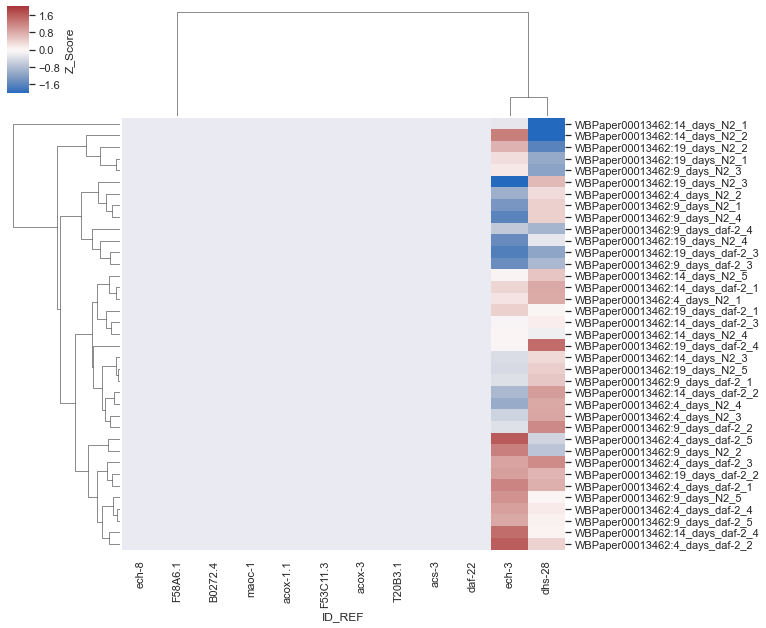

In [212]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_16')
# genes=['acdh-1','hach-1','hphd-1','acdh-2']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00013462')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


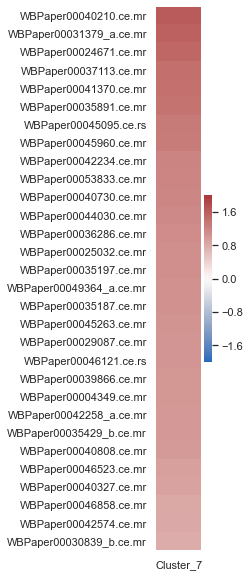

In [213]:
x=pd.read_csv("BestDatasets_Cluster_7_Z_score_of_mean.csv",index_col=0)
z=x
fig=plt.figure(figsize=(1,10))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Tyrosine_best_datasets.png",dpi=300,bbox_inches = 'tight')
plt.savefig("Tyrosine_best_datasets.svg",dpi=300,bbox_inches = 'tight')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00041370
 Gene:['hgo-1', 'hpd-1', 'fah-1', 'gst-43', 'gst-42', 'Y53G8B.1', 'C31H2.4']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

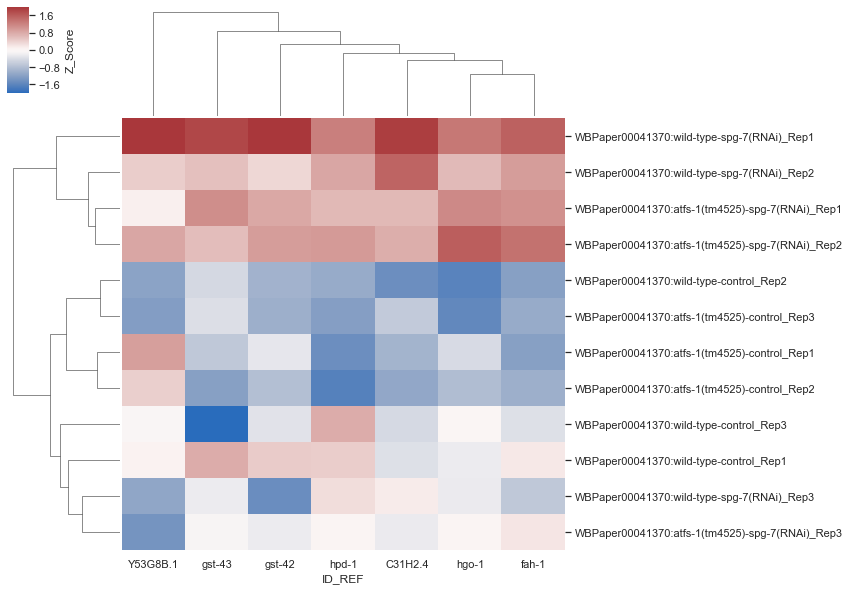

In [214]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_7')
# genes=['acdh-1','hach-1','hphd-1','acdh-2']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00041370')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00033101
 Gene:['acdh-1', 'hach-1', 'hphd-1', 'acdh-2']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

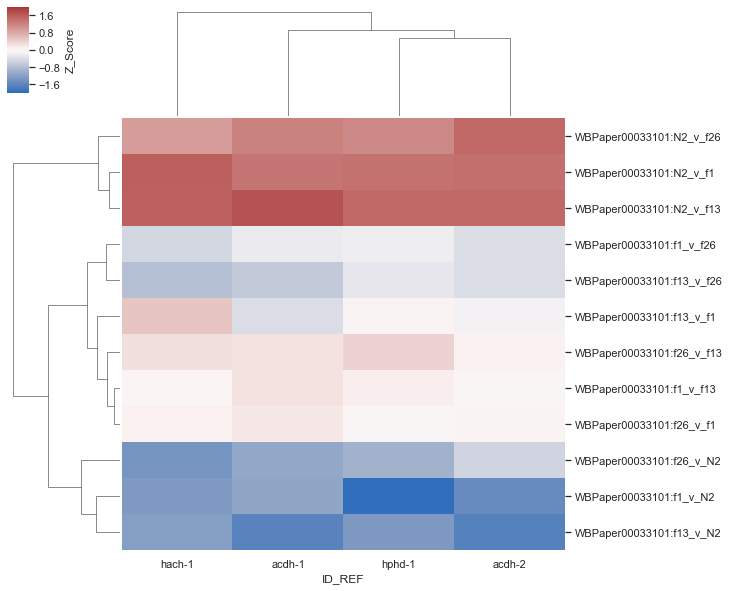

In [215]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_12')
genes=['acdh-1','hach-1','hphd-1','acdh-2']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00033101')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00036090
 Gene:['acdh-1', 'hach-1', 'hphd-1', 'acdh-2']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

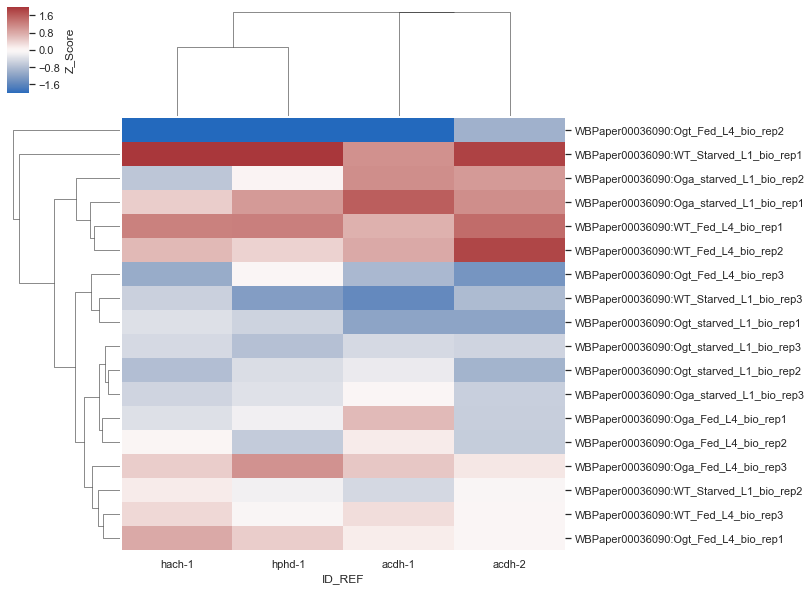

In [216]:
# genes
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_12')
genes=['acdh-1','hach-1','hphd-1','acdh-2']
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00036090')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


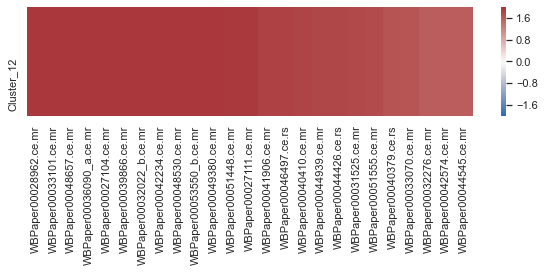

In [217]:
x=pd.read_csv("BestDatasets_Cluster_12_Z_score_of_GM.csv",index_col=0)
z=x.transpose()
fig=plt.figure(figsize=(10,2))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Propionateshunt_best_datasets.png",dpi=300)

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  


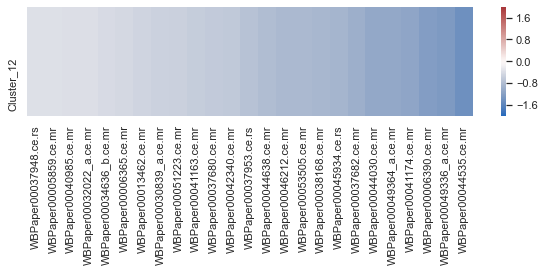

In [218]:
x=pd.read_csv("RepressingDatasets_Cluster_12_Z_score_of_GM.csv",index_col=0)
z=x.transpose()
fig=plt.figure(figsize=(10,2))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Propionateshunt_repressing_datasets.png",dpi=300)

In [219]:
MetabolicExpression['ech-6'].sort_values(ascending=False)[0:100]

RNASeq.elegans.WBStrain00000001.WBls:0000065.Hermaphrodite.WBbt:0007833.SRP037555.SRX469120     2.26105
RNASeq.elegans.WBStrain00000030.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP040269.SRX494558     1.97539
RNASeq.elegans.WBStrain00000001.WBls:0000035.Hermaphrodite.WBbt:0007833.SRP010374.SRX118128     1.96061
RNASeq.elegans.WBStrain00022571.WBls:0000002.Hermaphrodite.WBbt:0006797.SRP041461.SRX527965     1.95454
RNASeq.elegans.WBStrain00000001.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP034522.SRX392703     1.85828
                                                                                                 ...   
RNASeq.elegans.WBStrain00000001.WBls:0000010.Hermaphrodite.WBbt:0005772.SRP000401.SRX145482    0.477857
RNASeq.elegans.WBStrain00000001.WBls:0000063.Hermaphrodite.WBbt:0007833.SRP040269.SRX494547    0.475597
RNASeq.elegans.WBStrain00030950.WBls:0000038.Male.WBbt:0005062.SRP015688.SRX185680             0.468924
RNASeq.elegans.WBStrain00000031.WBls:0000063.Hermaphrodite.WBbt:

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00033101
 Gene:['acdh-2', 'hach-1', 'hphd-1', 'ech-6', 'acdh-1']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

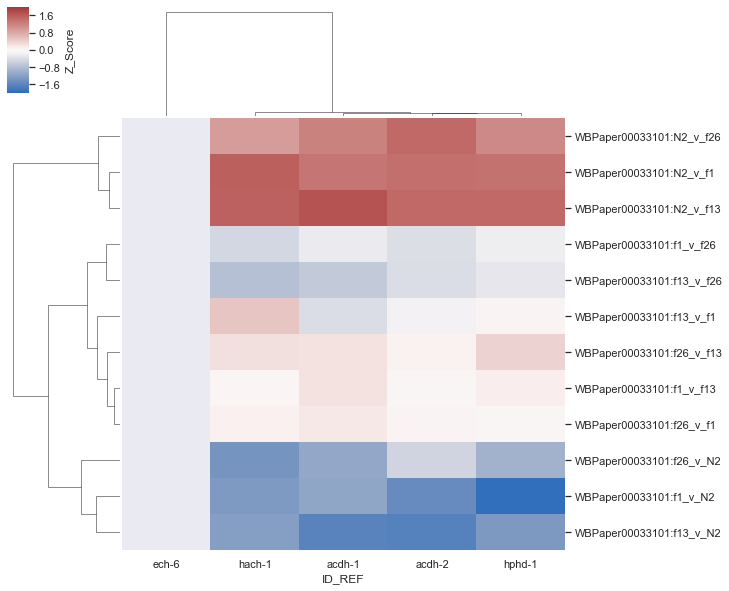

In [220]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_12')
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00033101')

In [221]:
MetabolicExpression.loc[MetabolicExpression.index.str.startswith("WBPaper00042234")][genes]

ID_REF                        acdh-2    hach-1    hphd-1 ech-6    acdh-1
WBPaper00042234:N2_rep1      1.06122     1.181   1.24127   NaN   1.62127
WBPaper00042234:N2_rep2    -0.485321   -1.1192  -1.42549   NaN -0.962072
WBPaper00042234:N2_rep3      1.82613     1.181   1.55887   NaN   1.40748
WBPaper00042234:N2_rep4    -0.650551 -0.535568 -0.790863   NaN -0.685922
WBPaper00042234:N2_rep5     -1.01789 -0.672893 -0.630672   NaN -0.623565
WBPaper00042234:xpa-1_rep1 -0.325165  0.185389 -0.251503   NaN -0.730462
WBPaper00042234:xpa-1_rep2    1.5494   1.90195    1.5083   NaN   1.50547
WBPaper00042234:xpa-1_rep3 -0.827057 -0.569898 -0.245636   NaN -0.409772
WBPaper00042234:xpa-1_rep4 -0.650569 -0.913212 -0.247154   NaN -0.498852
WBPaper00042234:xpa-1_rep5 -0.480193 -0.638561 -0.717124   NaN -0.623565

In [222]:
MetabolicExpression.loc[:][genes].sort_values(by=['ech-6'],ascending=False)[0:60]

ID_REF                                                 acdh-2     hach-1  \
RNASeq.elegans.WBStrain00000001.WBls:0000065.He...    2.11518    2.15518   
RNASeq.elegans.WBStrain00000030.WBls:0000063.He... -0.0223373  0.0452537   
RNASeq.elegans.WBStrain00000001.WBls:0000035.He...   0.560028    2.20412   
RNASeq.elegans.WBStrain00022571.WBls:0000002.He...    1.01635    1.74974   
RNASeq.elegans.WBStrain00000001.WBls:0000063.He...   0.530791    2.04789   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...   0.542256    1.38192   
RNASeq.elegans.WBStrain00030625.WBls:0000038.He...  -0.377923    1.02219   
RNASeq.elegans.WBStrain00000001.WBls:0000064.He...    1.36714   0.991378   
RNASeq.elegans.WBStrain00035559.WBls:0000038.He...   -1.11464    1.65221   
RNASeq.elegans.WBStrain00030625.WBls:0000035.He...  -0.377923     2.1286   
RNASeq.elegans.WBStrain00000001.WBls:0000064.He...     1.6801    1.56996   
RNASeq.elegans.WBStrain00000001.WBls:0000064.He...    1.56215    1.12452   
RNASeq.elegans.WBStrain00000001.WBls:0000064.He...    1.52032    1.09917   
RNASeq.elegans.WBStrain00022571.WBls:0000002.He...   0.144548    0.63002   
RNASeq.elegans.WBStrain00024162.WBls:0000024.He...  -0.156849   0.767264   
RNASeq.elegans.WBStrain00024162.WBls:0000024.He...  -0.181552   0.750568   
RNASeq.elegans.WBStrain00030625.WBls:0000038.He...  -0.377923  -0.688051   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...   0.740332    1.72233   
RNASeq.elegans.WBStrain00000001.WBls:0000064.He...    1.61039    1.50726   
RNASeq.elegans.WBStrain00000001.WBls:0000064.He...     1.6659    1.58981   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...    1.52583    1.51694   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...    1.57919   0.853132   
RNASeq.elegans.WBStrain00000001.WBls:0000002.He...   0.724526    1.66015   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...     1.7189    1.05619   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...   0.741729    1.54703   
RNASeq.elegans.WBStrain00035559.WBls:0000038.He...  -0.775321    1.49793   
RNASeq.elegans.WBStrain00000001.WBls:0000024.He...   0.523909   0.470143   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...    1.06182    1.27191   
RNASeq.elegans.WBStrain00000001.WBls:0000027.He...   0.868135    1.16643   
RNASeq.elegans.WBStrain00035559.WBls:0000038.He...   -1.36165    1.38557   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...   0.478822    1.02385   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...    1.49928   0.924974   
RNASeq.elegans.WBStrain00000001.WBls:0000002.He...    0.32065    1.27119   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...    1.32912    1.05866   
RNASeq.elegans.WBStrain00000001.WBls:0000027.He...   0.859591    1.13318   
RNASeq.elegans.WBStrain00024166.WBls:0000024.He...  -0.507141   0.585064   
RNASeq.elegans.WBStrain00000001.WBls:0000035.He...   0.318768    0.95459   
RNASeq.elegans.WBStrain00000001.WBls:0000065.He...   0.785279    1.01308   
RNASeq.elegans.WBStrain00024166.WBls:0000024.He...    1.53113   0.924427   
RNASeq.elegans.WBStrain00024166.WBls:0000024.He...  -0.569794   0.431234   
RNASeq.elegans.WBStrain00024166.WBls:0000024.He...    1.52016   0.955148   
RNASeq.elegans.WBStrain00022538.WBls:0000038.He...   0.758398   0.402955   
RNASeq.elegans.WBStrain00000001.WBls:0000024.He...   0.451843   0.438427   
RNASeq.elegans.WBStrain00024166.WBls:0000024.He...   -1.20626  -0.202462   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...   0.872053   0.598019   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...   0.907683   0.604036   
RNASeq.elegans.WBStrain00000001.WBls:0000065.He...    1.28662   0.923537   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...   0.836356    0.54192   
RNASeq.elegans.WBStrain00000001.WBls:0000038.He...   0.620464   0.528393   
RNASeq.elegans.WBStrain00000001.WBls:0000041.Ma...   0.661039    1.01057   
RNASeq.elegans.WBStrain00004602.WBls:0000041.He...   0.588541 -0.0358165   
RNASeq.elegans.WBStrain00000001.WBls:0000035.He.

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Paper:WBPaper00048530
 Gene:['acs-3', 'daf-22', 'T20B3.1', 'acox-3', 'ech-3', 'dhs-28', 'F53C11.3', 'acox-1.1', 'maoc-1', 'B0272.4', 'F58A6.1', 'ech-8']


/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 288x720 with 0 Axes>

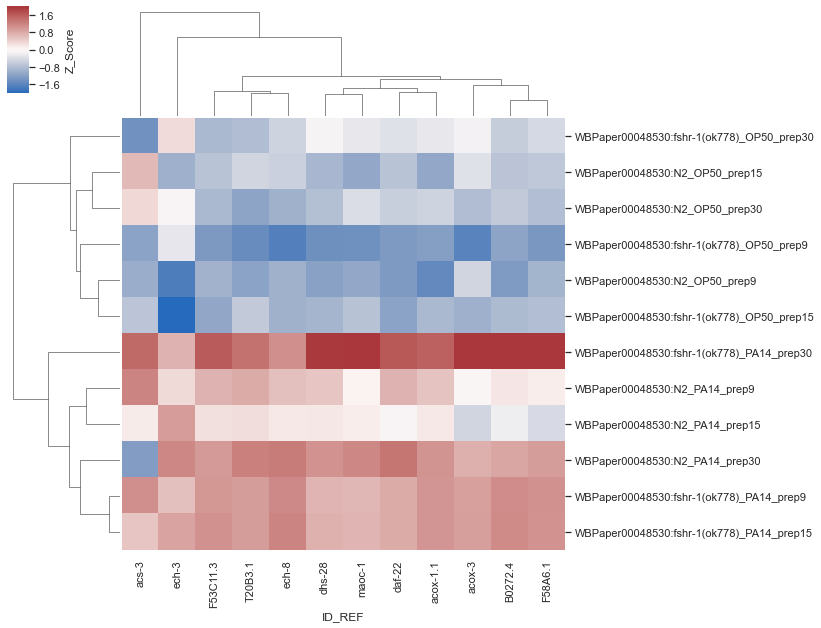

In [223]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_16')
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00048530')

In [224]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_12')
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=propionate_shunt,paper='WBPaper00051448')

/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nandas/miniconda3/envs/metabolism/lib/python3.6/site-packages/pandas/core/series.py:4504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


NameError: name 'propionate_shunt' is not defined

In [ ]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_12')
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=propionate_shunt,paper='WBPaper00051448')

In [ ]:
x=pd.read_csv("BestDatasets_Cluster_65_Z_score_of_GM.csv",index_col=0)
z=x.transpose()
fig=plt.figure(figsize=(10,2))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Propionatecanonical_best_datasets.png",dpi=300)

In [ ]:
x=pd.read_csv("BestDatasets_Cluster_65_Z_score_of_GM.csv",index_col=0)
z=x.transpose()
fig=plt.figure(figsize=(10,2))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Propionatecanonical_best_datasets.png",dpi=300)

In [ ]:
x=pd.read_csv("RepressingDatasets_Cluster_65_Z_score_of_GM.csv",index_col=0)
z=x.transpose()
fig=plt.figure(figsize=(10,2))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Propionatecanonical_repressing_datasets.png",dpi=300)

In [ ]:
genes=ExtractingGenes(ClusterFile=ClusterSets,Cluster='Cluster_65')
paper_df=ExtractPaperHeatmap(df=MetabolicExpression,gene=genes,paper='WBPaper00030985')

In [ ]:
x=pd.read_csv("BestDatasets_Cluster_16_Z_score_of_GM.csv",index_col=0)
z=x.transpose()
fig=plt.figure(figsize=(10,2))
sns.heatmap(z,cmap='vlag',vmin=-2,vmax=2)
# x=x.transpose
plt.tight_layout()
plt.savefig("Perox_best_datasets.png",dpi=300)